In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import fnmatch

from VIGOR_utils import *
from VIGOR_plotting import *
from VIGOR_MODELS_Functions import *

plt.style.use('./Figures/paper.mplstyle')

In [15]:
rat_markers = {}
brainstatus = {'RatF00': 'normal', 'RatF01': 'normal', 'RatF02': 'normal',
               'RatM00': 'normal', 'RatM01': 'normal', 'RatM02': 'normal',
            #    'RatF20': 'thcre', 'RatF21': 'thcre', 'RatF22': 'thcre',
            #    'RatM20': 'thcre', 'RatM21': 'thcre', 'RatM22': 'thcre',
               'RatF30': 'DLS', 'RatF31': 'DLS', 'RatF32': 'normal', 'RatF33': 'normal',
               'RatM30': 'DLS', 'RatM31': 'normal', 'RatM32': 'normal',
               'RatF40': 'DLS', 'RatF41': 'DMS', 'RatF42': 'normal',
               'RatM40': 'normal', 'RatM41': 'DLS', 'RatM42': 'DMS', 'RatM43': 'normal', 

                'RatF50': 'DMS', 'RatF51': 'DLS', 'RatF52': 'DLS',
               'RatM50': 'DMS', 'RatM51': 'DMS', 'RatM52': 'DLS', 'RatM53': 'normal', 'RatM54': 'normal'
               }

intact_map = plt.cm.get_cmap('winter')
lesion_map = plt.cm.get_cmap('autumn')

# markers = {'normal': 'o', 'thcre': 'd', 'lesion': 'x', 'biglesion': 'X'}
# lines = {'normal': '-', 'thcre': '--', 'lesion': ':', 'biglesion': '-.'}

markers = {'normal': 'o', 'DLS': 'X', 'DMS': 'x'}
lines = {'normal': '-', 'DLS': '-', 'DMS': '-'}
colormaps = {'normal': intact_map, 'DLS': lesion_map, 'DMS': lesion_map}

# RATS
animalList = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02', 
              'RatF30', 'RatF31', 'RatF32', 'RatF33', 'RatM30', 'RatM31', 'RatM32', 
              'RatF40', 'RatF41', 'RatF42', 'RatM40', 'RatM41', 'RatM42', 'RatM43', 
                'RatF50', 'RatF51', 'RatF52', 'RatM50', 'RatM51', 'RatM52', 'RatM53', 'RatM54'
                ]
intact = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02', 
            'RatF32', 'RatF33', 'RatM31', 'RatM32', 'RatF42', 'RatM40', 'RatM43', 'RatM53', 'RatM54']
    

for index, animal in enumerate(animalList):
    if fnmatch.fnmatch(animal, 'RatF*'):
        rat_markers[animal]=[colormaps[brainstatus[animal]](index/len(animalList)), 'd', lines[brainstatus[animal]]]
    elif fnmatch.fnmatch(animal, 'RatM*'):
        rat_markers[animal]=[colormaps[brainstatus[animal]](index/len(animalList)), 's', lines[brainstatus[animal]]]
    elif fnmatch.fnmatch(animal, 'Rat00*'):
        rat_markers[animal]=[(0.0, 0.0, 0.0), "$\u2426$",]
    else:
        print("error, this is not a rat you got here")

In [12]:
alpha, alpha_t, alpha_R, gamma, gamma_t, gamma_R, mu, mu_t, mu_R, sigma, sigma_t, sigma_R = pickle.load(open("picklejar/TESTintact_lesionFITS.p", "rb"))
vars = alpha, alpha_t, alpha_R, gamma, gamma_t, gamma_R, mu, mu_t, mu_R, sigma, sigma_t, sigma_R
names = ('alpha', 'alpha_t', 'alpha_R', 'gamma', 'gamma_t', 'gamma_R', 'mu', 'mu_t', 'mu_R', 'sigma', 'sigma_t', 'sigma_R')


In [9]:
conds = ["60", "90", "120", "20", "10", "2", "rev10", "rev20"]
def compute_ICC(var, animalList=animalList):
    conds = ["60", "90", "120", "20", "10", "2", "rev10", "rev20"]

    expected_60 = np.mean([var[animal]["60"] for animal in animalList])
    expected_90 = np.mean([var[animal]["90"] for animal in animalList])
    expected_120 = np.mean([var[animal]["120"] for animal in animalList])
    expected_20 = np.mean([var[animal]["20"] for animal in animalList])
    expected_10 = np.mean([var[animal]["10"] for animal in animalList])
    expected_2 = np.mean([var[animal]["2"] for animal in animalList])
    expected_rev10 = np.mean([var[animal]["rev10"] for animal in animalList])
    expected_rev20 = np.mean([var[animal]["rev20"] for animal in animalList])

    individual_intercepts = {}
    remaining_residuals = {}
    x = np.arange(len(conds))
    ymax = 0

    for animal in animalList:
        y = np.array([
            var[animal]["60"], 
                        var[animal]["90"], 
                        var[animal]["120"],
                        var[animal]["rev20"], 
                        var[animal]["rev10"], 
                        var[animal]["2"], 
                        var[animal]["10"], 
                        var[animal]["20"]])

        y_expected = np.array([
                                var[animal]["60"] - expected_60,
                                var[animal]["90"] - expected_90,
                                var[animal]["120"] - expected_120,
                                var[animal]["rev20"] - expected_rev20,
                                var[animal]["rev10"] - expected_rev10,
                                var[animal]["2"] - expected_2,
                                var[animal]["10"] - expected_10,
                                var[animal]["20"] - expected_20])


        #find intercept
        X = np.ones((len(x), 1))
        Y = y_expected.reshape(-1, 1)
        coefficients = np.linalg.lstsq(X, Y, rcond=None)[0]
        intercept = coefficients[0][0]
        individual_intercepts[animal] = intercept

        ######################################

        y_corrected = np.array([
                                var[animal]["60"] - expected_60 - individual_intercepts[animal],
                                var[animal]["90"] - expected_90 - individual_intercepts[animal],
                                var[animal]["120"] - expected_120 - individual_intercepts[animal],
                                var[animal]["rev20"] - expected_rev20 - individual_intercepts[animal],
                                var[animal]["rev10"] - expected_rev10 - individual_intercepts[animal],
                                var[animal]["2"] - expected_2 - individual_intercepts[animal],
                                var[animal]["10"] - expected_10 - individual_intercepts[animal],
                                var[animal]["20"] - expected_20 - individual_intercepts[animal]])
        
        
        remaining_residuals[animal] = np.var(y_corrected)

    alp = np.var(list(individual_intercepts.values()))
    eps = np.mean(list(remaining_residuals.values()))
    # print(alp, eps)
    ICC_pop = alp / (alp + eps)


    # individual ICC
    ICC_indiv = {}
    for animal in animalList:
        ICC_indiv[animal] = alp / (alp + remaining_residuals[animal])

    return ICC_pop, ICC_indiv

compute_ICC(alpha, animalList=animalList)


(0.5690626450839706,
 {'RatF00': 0.8898989242480664,
  'RatF01': 0.8724085521395968,
  'RatF02': 0.8696418475571208,
  'RatM00': 0.9735553456847772,
  'RatM01': 0.935056781884978,
  'RatM02': 0.7686577476826122,
  'RatF30': 0.44316790026248887,
  'RatF31': 0.620451132053941,
  'RatF32': 0.7073770552127372,
  'RatF33': 0.9238556252011393,
  'RatM30': 0.6551671918773655,
  'RatM31': 0.7786057759478314,
  'RatM32': 0.7841175240572265,
  'RatF40': 0.7214678335700475,
  'RatF41': 0.44113339004844127,
  'RatF42': 0.7002027986308803,
  'RatM40': 0.4133977396791057,
  'RatM41': 0.791955650060427,
  'RatM42': 0.42289870875560803,
  'RatM43': 0.4422543352281722,
  'RatF50': 0.33006396944530464,
  'RatF51': 0.5890568373604737,
  'RatF52': 0.18766813706868005,
  'RatM50': 0.7876992253822636,
  'RatM51': 0.4958798265657298,
  'RatM52': 0.5614357871863753,
  'RatM53': 0.48947831044368373,
  'RatM54': 0.7239934734393116})

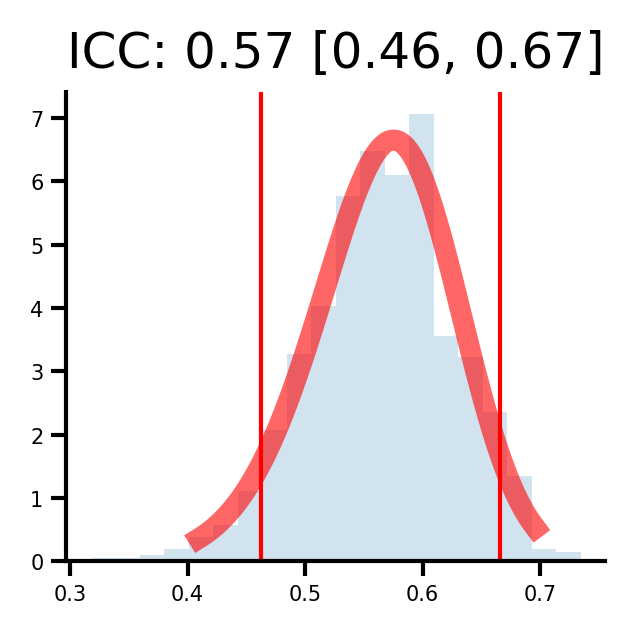

In [10]:
def bootstrap_ICC(var, animalList=animalList, num_bootstrap=1000, plot=False):
    icc_values = np.zeros(num_bootstrap)
    bootstrap_samples = []

    for _ in range(num_bootstrap):
        bootstrap_animals = np.random.choice(animalList, size=len(animalList), replace=True)
        bootstrap_sample = {animal: {} for animal in bootstrap_animals}
        
        for animal in bootstrap_animals:
            for cond, value in var[animal].items():
                bootstrap_sample[animal][cond] = value

        icc_values[_] = compute_ICC(bootstrap_sample, animalList=bootstrap_animals)[0]
        bootstrap_samples.append(bootstrap_sample)

    #fit skew normal
    a, loc, scale = stats.skewnorm.fit(icc_values)
    x = np.linspace(stats.skewnorm.ppf(0.01, a, loc, scale),
                    stats.skewnorm.ppf(0.99, a, loc, scale), 100)
    y = stats.skewnorm.pdf(x, a, loc, scale)

    lower_bound = np.percentile(icc_values, 5)
    upper_bound = np.percentile(icc_values, 95)

    if plot:
        fig, ax = plt.subplots(1, 1, figsize=(2, 2))
        ax.plot(x, y, 'r-', lw=5, alpha=0.6, label='skewnorm pdf')
        ax.hist(icc_values, bins=20, density=True, histtype='stepfilled', alpha=0.2)
        ax.axvline(lower_bound, color='red')
        ax.axvline(upper_bound, color='red')
        ax.set_title('ICC: {:.2f} [{:.2f}, {:.2f}]'.format(np.mean(icc_values), lower_bound, upper_bound))

    return icc_values


_ = bootstrap_ICC(alpha, animalList=animalList, num_bootstrap=1000, plot=True)

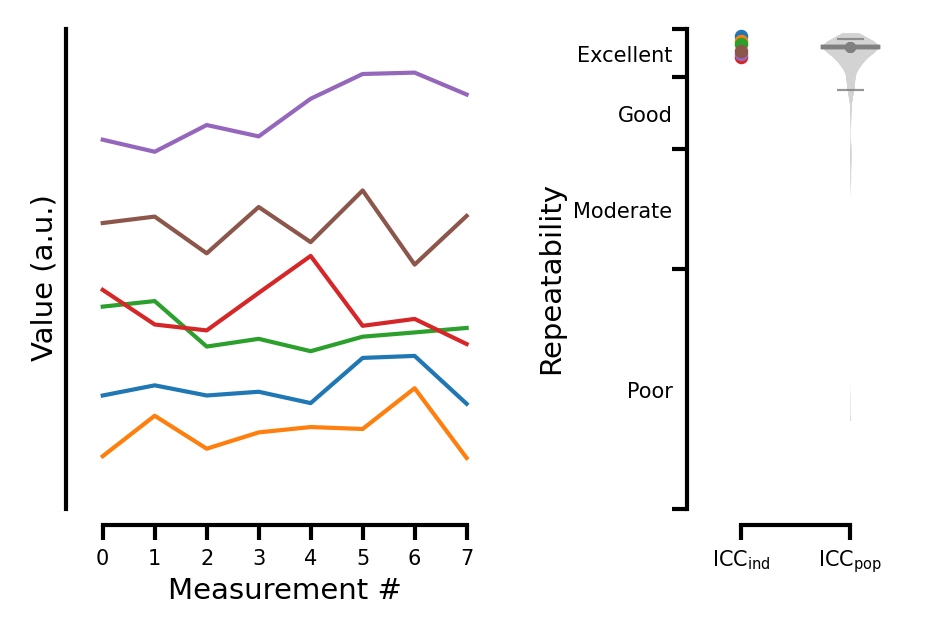

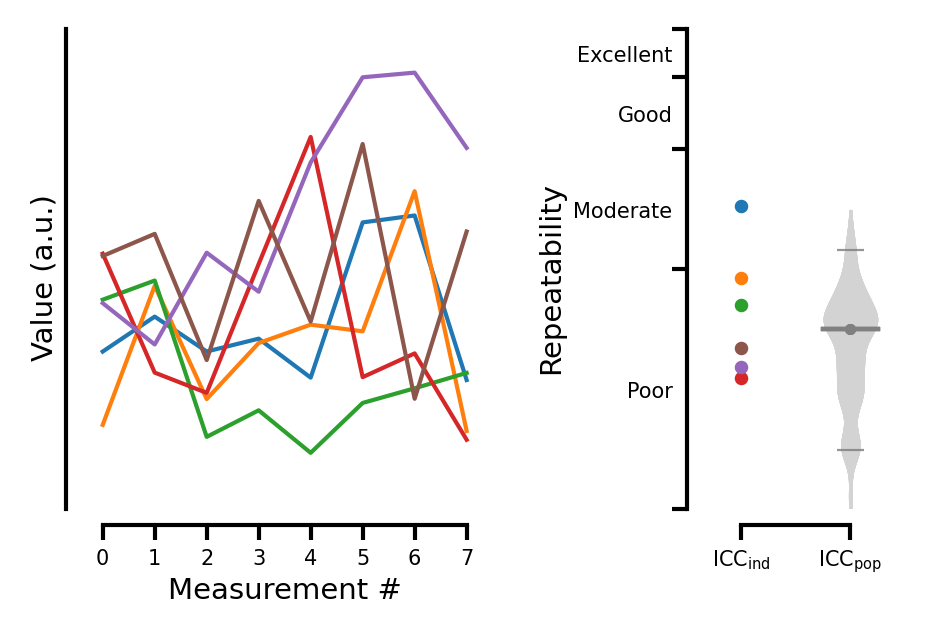

In [50]:
def mock_dataset(n_subjects=animalList, n_measurements=["60", "90", "120", "rev20", "rev10", "2", "10", "20"], noise=0):
    np.random.seed(2007)
    data = {}
    expected_value = np.arange(len(n_measurements))/10+ np.random.rand(len(n_measurements))/5
    expected_value *= 0
    individual_intercept = np.random.rand(len(n_subjects))

    for i, animal in enumerate(n_subjects):
        data[animal] = {}
        # for j in range(len(n_measurements)):
        for j, cond in enumerate(n_measurements):
            data[animal][cond] = expected_value[j] + individual_intercept[i] + np.random.rand() * noise
    return data

def explain_ICC(noise=0, ax=None):
    if ax is None:
        fig, axs = plt.subplots(1, 2, figsize=(3, 2), gridspec_kw={'width_ratios': [2, 1]})

    explanation_animals = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02']

    data = mock_dataset(noise=noise, n_subjects=explanation_animals)
    pop_ICC, indiv_ICC = compute_ICC(data, animalList=explanation_animals)
    ICC_bootstrap = bootstrap_ICC(data, num_bootstrap=1000, animalList=explanation_animals)
    conf_bottom = np.percentile(ICC_bootstrap, 5)
    conf_top = np.percentile(ICC_bootstrap, 95)
    ymax = 0
    for animal in explanation_animals:

        axs[0].plot(np.arange(len(conds)), [data[animal][cond] for cond in conds],)
        temp_ymax = np.max([data[animal][cond] for cond in conds])
        if temp_ymax > ymax:
            ymax = temp_ymax
        
        axs[1].scatter(0, indiv_ICC[animal], s=5)

        axs[1].plot([.075, .125], [pop_ICC, pop_ICC], color='gray', lw=1, zorder=1)
        axs[1].scatter(0.1, pop_ICC, color='gray', s=2.5, zorder=1)

        violin_parts = axs[1].violinplot(positions=[.1], 
                        dataset=[ICC_bootstrap],
                        widths=.05, showextrema=False, 
                        quantiles=[0.05, 0.95])
        
        for vp in violin_parts['bodies']:
            vp.set_facecolor('lightgray')
            vp.set_edgecolor('lightgray')
            vp.set_linewidth(0)
            vp.set_alpha(1)
            vp.set_zorder(0)
        # for vp in violin_parts['cquantiles']:
        violin_parts['cquantiles'].set_facecolor('gray')
        violin_parts['cquantiles'].set_edgecolor('gray')
        violin_parts['cquantiles'].set_linewidth(.5)
        violin_parts['cquantiles'].set_alpha(.25)
        violin_parts['cquantiles'].set_zorder(1)
        
        for partname in ('cbars','cmins','cmaxes','cmeans','cmedians'):
            try:
                vp = violin_parts[partname]
                vp.set_edgecolor('gray')
                vp.set_linewidth(0)
                vp.set_alpha(0)
            except:
                pass

    axs[0].set_ylabel("Value (a.u.)")
    axs[0].set_xticks(np.arange(len(conds)))
    axs[0].set_xlabel("Measurement #")
    axs[0].set_xlim(0, 7)
    axs[0].set_ylim(0, 1.1*ymax)
    space_axes(axs[0], x_ratio_left=.1, x_ratio_right=.1)
    axs[0].set_yticks([])
    axs[0].set_yticklabels([])

    


    axs[1].set_ylim(0, 1)
    axs[1].set_xlim(0, 0.1)
    axs[1].set_xticks([0, 0.1])
    axs[1].set_xticklabels([r"$\mathrm{ICC_{ind}}$", r"$\mathrm{ICC_{pop}}$"])
    axs[1].set_ylabel("Repeatability")
    space_axes(axs[1], x_ratio_left=.5, x_ratio_right=.5)


    axs[1].set_yticklabels('')
    axs[1].set_yticks([0, 0.5, 0.75, .9, 1])
    axs[1].set_yticks([0.25, 0.625, 0.825, .95], minor=True)
    axs[1].set_yticklabels(["Poor", "Moderate", "Good", "Excellent"], minor=True)
    axs[1].tick_params(which='minor', length=0)

explain_ICC(noise=.25)
explain_ICC(noise=2.5)

alpha M vs F p = 0.1188
alpha M vs F p = MannwhitneyuResult(statistic=16.0, pvalue=0.22377622377622375)
alpha_t M vs F p = 0.4811
alpha_t M vs F p = MannwhitneyuResult(statistic=34.0, pvalue=0.45594405594405585)
alpha_R M vs F p = 0.0303
alpha_R M vs F p = MannwhitneyuResult(statistic=9.0, pvalue=0.03596403596403597)
gamma M vs F p = 0.1932
gamma M vs F p = MannwhitneyuResult(statistic=16.0, pvalue=0.22377622377622375)
gamma_t M vs F p = 0.5016
gamma_t M vs F p = MannwhitneyuResult(statistic=19.0, pvalue=0.38841158841158835)
gamma_R M vs F p = 0.0558
gamma_R M vs F p = MannwhitneyuResult(statistic=9.0, pvalue=0.03596403596403597)
mu M vs F p = 0.7362
mu M vs F p = MannwhitneyuResult(statistic=27.0, pvalue=1.0)
mu_t M vs F p = 0.2649
mu_t M vs F p = MannwhitneyuResult(statistic=36.0, pvalue=0.3276723276723276)
mu_R M vs F p = 0.4365
mu_R M vs F p = MannwhitneyuResult(statistic=20.0, pvalue=0.45594405594405585)
sigma M vs F p = 0.8462
sigma M vs F p = MannwhitneyuResult(statistic=28.0, p

(0.0, 1.0)

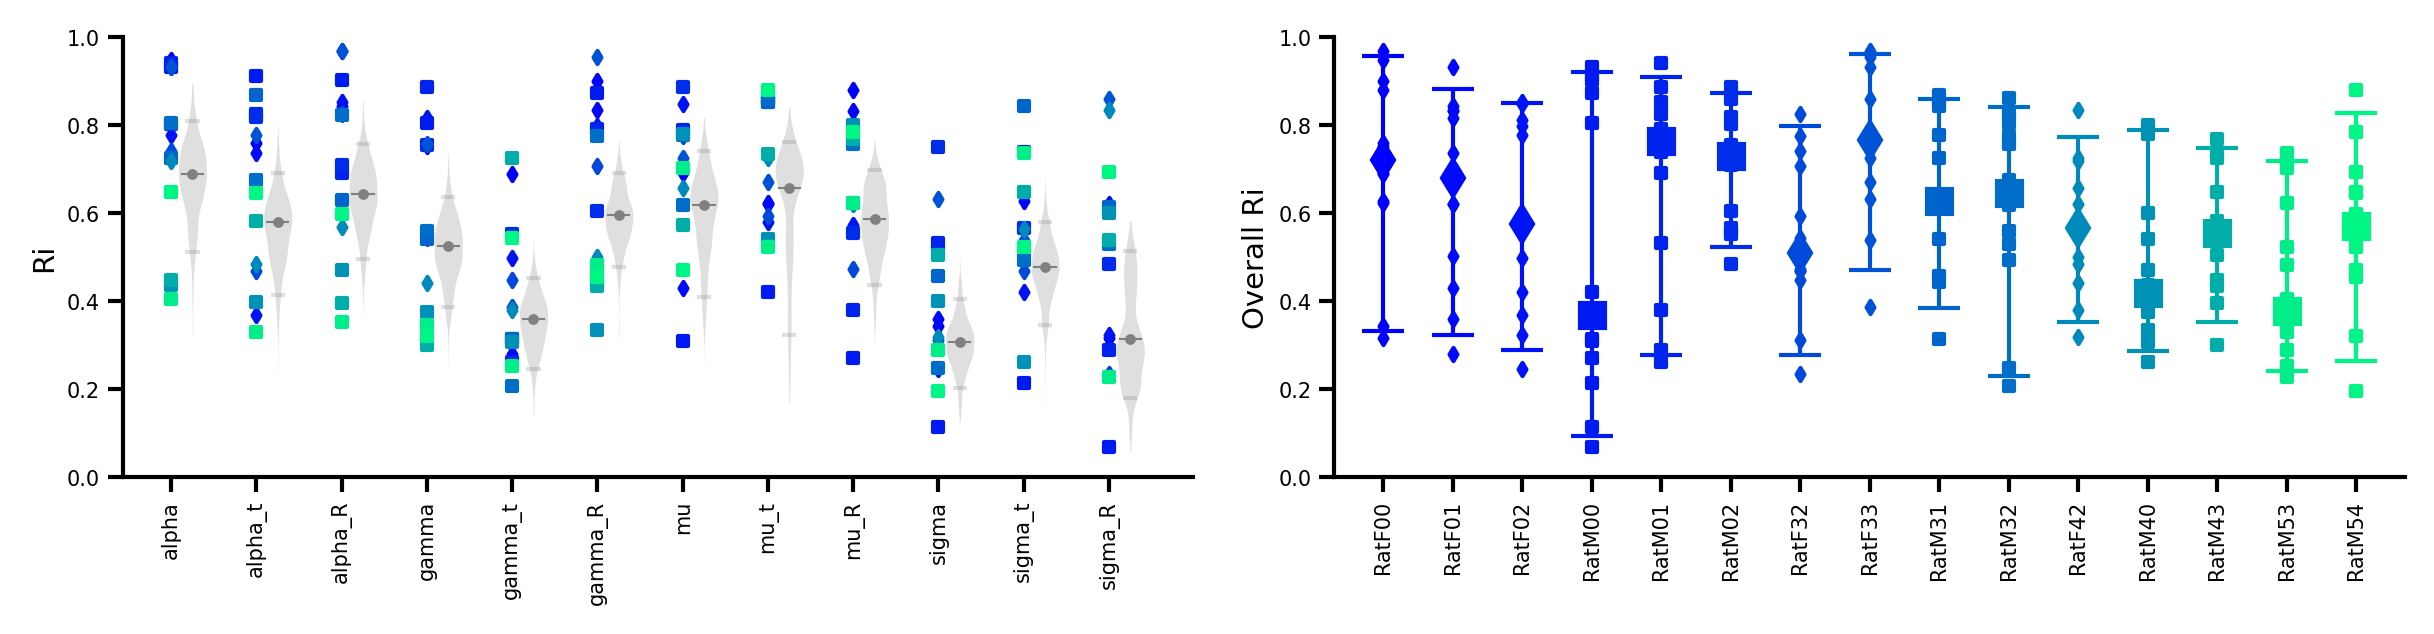

In [17]:


fig, axs = plt.subplots(1, 2, figsize=(8, 2))
aaa = intact
populationRi = {}
conf_bottom = {}
conf_top = {}
indivRi = {}
ICC_bootstrap = {}

for i, (var, name) in enumerate(zip(vars, names)):
    populationRi[name], indivRi[name] = compute_ICC(var, animalList=aaa)
    ICC_bootstrap[name] = bootstrap_ICC(var, animalList=aaa)
    conf_bottom[name], conf_top[name] = np.percentile(ICC_bootstrap[name], 5), np.percentile(ICC_bootstrap[name], 95)

for i, (var, name) in enumerate(zip(vars, names)):
    femalesRi = [indivRi[name][animal] for animal in aaa if 'F' in animal]
    malesRi = [indivRi[name][animal] for animal in aaa if 'M' in animal]

    print(f'{name} M vs F p = {exact_mc_perm_test(malesRi, femalesRi)}')
    print(f'{name} M vs F p = {stats.mannwhitneyu(malesRi, femalesRi)}')

    for animal in aaa:
        axs[0].scatter(i, indivRi[name][animal], color=rat_markers[animal][0], marker=rat_markers[animal][1], s=5)

    line = 0.25/2
    axs[0].plot([i+.25-line, i+.25+line], [populationRi[name], populationRi[name]], color='gray', lw=0.5, zorder=1)
    axs[0].scatter(i+.25, populationRi[name], color='gray', s=2.5)

    violin_parts = axs[0].violinplot(positions=[i+.25], 
                    dataset=[ICC_bootstrap[name]],
                    widths=.33, showextrema=False, 
                    quantiles=[0.05, 0.95])
    
    for vp in violin_parts['bodies']:
        vp.set_facecolor('gray')
        vp.set_edgecolor('gray')
        vp.set_linewidth(0)
        vp.set_alpha(.25)
        vp.set_zorder(0)
    # for vp in violin_parts['cquantiles']:
    violin_parts['cquantiles'].set_facecolor('gray')
    violin_parts['cquantiles'].set_edgecolor('gray')
    violin_parts['cquantiles'].set_linewidth(1)
    violin_parts['cquantiles'].set_alpha(.25)
    violin_parts['cquantiles'].set_zorder(1)
    
    for partname in ('cbars','cmins','cmaxes','cmeans','cmedians'):
        try:
            vp = violin_parts[partname]
            vp.set_edgecolor('gray')
            vp.set_linewidth(0)
            vp.set_alpha(0)
        except:
            pass

for i, animal in enumerate(aaa):

    axs[1].scatter([i] * len([indivRi[name][animal] for name in names]),
                    [indivRi[name][animal] for name in names],
                    color=rat_markers[animal][0], marker=rat_markers[animal][1], s=5)
                    
    lower = np.percentile([indivRi[name][animal] for name in names], 5)
    upper = np.percentile([indivRi[name][animal] for name in names], 95)

    axs[1].errorbar(i, np.median([indivRi[name][animal] for name in names]), 
                    yerr=[[np.median([indivRi[name][animal] for name in names]) - lower], 
                            [upper - np.median([indivRi[name][animal] for name in names])]],
                    color=rat_markers[animal][0], marker=rat_markers[animal][1], 
                    capsize=5, capthick=1, elinewidth=1)


axs[0].set_xticks(range(len(vars)))
axs[0].set_xticklabels(names, rotation=90)
axs[0].set_ylabel('Ri')
axs[0].set_ylim(0, 1)
# axs[0].set_yticklabels('')
# axs[0].set_yticks([0, 0.5, 0.75, .9, 1])
# axs[0].set_yticks([0.25, 0.625, 0.825, .95], minor=True)
# axs[0].set_yticklabels(["Poor", "Moderate", "Good", "Excellent"], minor=True)
# axs[0].tick_params(which='minor', length=0)



axs[1].set_xticks(range(len(aaa)))
axs[1].set_xticklabels(aaa, rotation=90)
axs[1].set_ylabel('Overall Ri')
axs[1].set_ylim(0, 1)
# axs[1].set_yticklabels('')
# axs[1].set_yticks([0, 0.5, 0.75, .9, 1])
# axs[1].set_yticks([0.25, 0.625, 0.825, .95], minor=True)
# axs[1].set_yticklabels(["Poor", "Moderate", "Good", "Excellent"], minor=True)
# axs[1].tick_params(which='minor', length=0)

In [ ]:
# overall Ri differences between animals?
values = []
for key, rat_data in indivRi.items():
    values.append(list(rat_data.values()))

res = stats.kruskal(*values)
print(res)

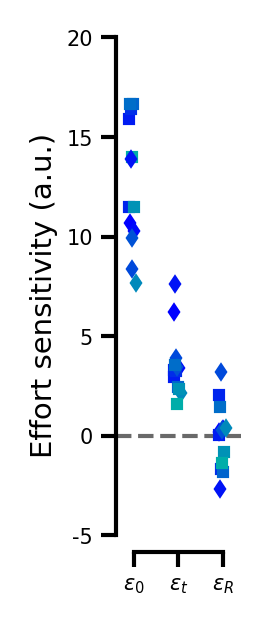

In [86]:
# epsilons distribution
# in fig 5

weights = {'RatF00': 212.02, 'RatF01': 205.85, 'RatF02': 193.75,
            'RatM00': 259.37, 'RatM01': 278.12, 'RatM02': 253.19,
            'RatF30': 217.32, 'RatF31': 228.95, 'RatF32': 216.80, 'RatF33': 222.77,
            'RatM30': 261.38, 'RatM31': 300.55, 'RatM32': 279.23, 
            'RatF40': 196.85, 'RatF41': 199.24, 'RatF42': 206.02,
            'RatM40': 238.70, 'RatM41': 238.19, 'RatM42': 242.87, 'RatM43': 262.23}



def Figure3X(ax=None):

    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(2, 2))

    for animal in intact:
        zorder=2
        if animal == 'RatF02':
            zorder = 10

        x = np.random.normal(0, 0.05)
        ax.plot(np.arange(3)+x,  [epsilon_0[animal], epsilon_t[animal], epsilon_R[animal]], 
                    color=rat_markers[animal][0], label=animal, 
                    marker=rat_markers[animal][1], markersize=2, lw=0, zorder=zorder)
    ax.set_xticks(np.arange(3))
    ax.set_xticklabels([r'$\epsilon_0$', r"$\epsilon_t$", r"$\epsilon_R$"])
    ax.set_xlim(0, 2)
    ax.set_ylim(-5, 20)
    ax.set_ylabel(f'Effort sensitivity (a.u.)')
    ax.axhline(0, color='dimgray', linestyle='--', linewidth=1, zorder=0)
    space_axes(ax, x_ratio_left=.2, x_ratio_right=.2)


fig, axs = plt.subplots(1, 1, figsize=(cm2inch(2), cm2inch(5)))
Figure3X(axs)

In [19]:
epsilon_0, epsilon_t, epsilon_R = pickle.load(open("picklejar/effort_fit.p", "rb"))

epsilon_0_Males = [epsilon_0[animal] for animal in animalList if animal.startswith('RatM')]
epsilon_0_Females = [epsilon_0[animal] for animal in animalList if animal.startswith('RatF')]

epsilon_t_Males = [epsilon_t[animal] for animal in animalList if animal.startswith('RatM')]
epsilon_t_Females = [epsilon_t[animal] for animal in animalList if animal.startswith('RatF')]

epsilon_R_Males = [epsilon_R[animal] for animal in animalList if animal.startswith('RatM')]
epsilon_R_Females = [epsilon_R[animal] for animal in animalList if animal.startswith('RatF')]


perm_0 = exact_mc_perm_test(epsilon_0_Males, epsilon_0_Females, 10000)
perm_t = exact_mc_perm_test(epsilon_t_Males, epsilon_t_Females, 10000)
perm_R = exact_mc_perm_test(epsilon_R_Males, epsilon_R_Females, 10000)

alpha = 0.05 / 3

print("Permutation test results:")
print("p-value (permutation test) 0:", perm_0, perm_0 < alpha)
print("p-value (permutation test) t:", perm_t, perm_t < alpha)
print("p-value (permutation test) R:", perm_R, perm_R < alpha)





epsilon_0_Males = [epsilon_0[animal]/weights[animal] for animal in animalList if animal.startswith('RatM')]
epsilon_0_Females = [epsilon_0[animal]/weights[animal] for animal in animalList if animal.startswith('RatF')]

epsilon_t_Males = [epsilon_t[animal]/weights[animal] for animal in animalList if animal.startswith('RatM')]
epsilon_t_Females = [epsilon_t[animal]/weights[animal] for animal in animalList if animal.startswith('RatF')]

epsilon_R_Males = [epsilon_R[animal]/weights[animal] for animal in animalList if animal.startswith('RatM')]
epsilon_R_Females = [epsilon_R[animal]/weights[animal] for animal in animalList if animal.startswith('RatF')]


perm_0 = exact_mc_perm_test(epsilon_0_Males, epsilon_0_Females, 10000)
perm_t = exact_mc_perm_test(epsilon_t_Males, epsilon_t_Females, 10000)
perm_R = exact_mc_perm_test(epsilon_R_Males, epsilon_R_Females, 10000)

alpha = 0.05 / 3

print("Permutation test results, controling weight:")
print("p-value (permutation test) 0:", perm_0, perm_0 < alpha)
print("p-value (permutation test) t:", perm_t, perm_t < alpha)
print("p-value (permutation test) R:", perm_R, perm_R < alpha)

print(alpha)


KeyError: 'RatM50'

# PCA

In [77]:
intact = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02', 
            'RatF32', 'RatF33', 'RatM31', 'RatM32', 'RatF42', 'RatM40', 'RatM43', 
            #'RatM53', 'RatM54'
            ]
            
animalList = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02', 
              'RatF30', 'RatF31', 'RatF32', 'RatF33', 'RatM30', 'RatM31', 'RatM32', 
              'RatF40', 'RatF41', 'RatF42', 'RatM40', 'RatM41', 'RatM42', 'RatM43', 
                'RatF50', 'RatF51', 'RatF52', 'RatM50', 'RatM51', 'RatM52', 'RatM53', 'RatM54'
                ]
            
alpha, alpha_t, alpha_R, gamma, gamma_t, gamma_R, mu, mu_t, mu_R, sigma, sigma_t, sigma_R = pickle.load(open("picklejar/TESTintact_lesionFITS.p", "rb"))
vars = alpha, alpha_t, alpha_R, gamma, gamma_t, gamma_R, mu, mu_t, mu_R, sigma, sigma_t, sigma_R
names = 'alpha', 'alpha_t', 'alpha_R', 'gamma', 'gamma_t', 'gamma_R', 'mu', 'mu_t', 'mu_R', 'sigma', 'sigma_t', 'sigma_R'

vars = alpha, alpha_t, gamma, gamma_t, gamma_R, mu, mu_t, sigma,
names = 'alpha', 'alpha_t', 'gamma', 'gamma_t', 'gamma_R', 'mu', 'mu_t', 'sigma'

In [78]:
def compute_intercept(var, animalList=animalList):


    conds = ["60", "90", "120", "20", "10", "2", "rev10", "rev20"]

    expected_60 = np.mean([var[animal]["60"] for animal in animalList])
    expected_90 = np.mean([var[animal]["90"] for animal in animalList])
    expected_120 = np.mean([var[animal]["120"] for animal in animalList])
    expected_20 = np.mean([var[animal]["20"] for animal in animalList])
    expected_10 = np.mean([var[animal]["10"] for animal in animalList])
    expected_2 = np.mean([var[animal]["2"] for animal in animalList])
    expected_rev10 = np.mean([var[animal]["rev10"] for animal in animalList])
    expected_rev20 = np.mean([var[animal]["rev20"] for animal in animalList])

    individual_intercepts = {}
    x = np.arange(len(conds))


    for animal in animalList:

        y = np.array([
            var[animal]["60"], 
                        var[animal]["90"], 
                        var[animal]["120"],
                        var[animal]["rev20"], 
                        var[animal]["rev10"], 
                        var[animal]["2"], 
                        var[animal]["10"], 
                        var[animal]["20"]])

        #############################""
        y_expected = np.array([
                                var[animal]["60"] - expected_60,
                                var[animal]["90"] - expected_90,
                                var[animal]["120"] - expected_120,
                                var[animal]["rev20"] - expected_rev20,
                                var[animal]["rev10"] - expected_rev10,
                                var[animal]["2"] - expected_2,
                                var[animal]["10"] - expected_10,
                                var[animal]["20"] - expected_20])


        #find intercept
        X = np.ones((len(x), 1))
        Y = y_expected.reshape(-1, 1)
        coefficients = np.linalg.lstsq(X, Y, rcond=None)[0]
        intercept = coefficients[0][0]
        individual_intercepts[animal] = intercept
    return individual_intercepts

compute_intercept(mu)
# do_stuff(sigma)
# do_stuff(alpha, 'alpha')

{'RatF00': -0.10450672399125893,
 'RatF01': -0.1243085991053571,
 'RatF02': -0.05574701614002346,
 'RatM00': -0.02957552401451387,
 'RatM01': -0.1096449376108816,
 'RatM02': 0.0005137743002029381,
 'RatF30': 0.03082810047354827,
 'RatF31': -0.1321449786367784,
 'RatF32': -0.16481601849418454,
 'RatF33': -0.12615440725072943,
 'RatM30': 0.13536691079800436,
 'RatM31': 0.0008222950487000161,
 'RatM32': 0.03430522414176353,
 'RatF40': 0.12376039062847619,
 'RatF41': 0.3702226444390667,
 'RatF42': -0.22572018979999517,
 'RatM40': -0.13233168859988886,
 'RatM41': -0.13851304754465318,
 'RatM42': 0.0006248822713828567,
 'RatM43': -0.08916254492734434,
 'RatF50': 0.20830746125754937,
 'RatF51': 0.11414694171899493,
 'RatF52': 0.23035562670833531,
 'RatM50': -0.1427786591531257,
 'RatM51': 0.11052953942231017,
 'RatM52': 0.03176779565435367,
 'RatM53': 0.14471451361934332,
 'RatM54': 0.039138234786705556}

In [79]:
df = pd.DataFrame(index=intact)

for var, name in zip(vars, names):
    l = np.array(list(compute_intercept(var, intact).values()))
    df[name] = l / np.std(l)  # normalize by std to have a mean of 0 and std of 1
    print(name, np.mean(l), np.std(l), np.std(l / np.std(l)))

print(df.head())

# df to array
data = df.to_numpy()
labels = df.index.to_numpy()
variables = df.columns.to_numpy()
print(labels)

alpha -6.405132834375903e-17 0.31174909593546596 0.9999999999999999
alpha_t -7.472654973438553e-18 0.06650813813761745 1.0
gamma -2.5620531337503614e-17 0.19960591232412353 0.9999999999999999
gamma_t 3.06912614980512e-18 0.015400971962735318 0.9999999999999999
gamma_R -1.3877787807814457e-17 0.07107281600738262 0.9999999999999999
mu 5.404330829004668e-17 0.07096128574134539 1.0
mu_t 1.0675221390626506e-18 0.023415114793338954 1.0
sigma 7.6728153745128e-19 0.014463891253295603 1.0000000000000002
           alpha   alpha_t     gamma   gamma_t   gamma_R        mu      mu_t  \
RatF00 -1.764440  0.298358 -1.472160  0.313484  1.031537 -0.251774  1.526349   
RatF01 -0.619709  1.121058 -0.905154 -0.235868  0.884648 -0.530826  0.068454   
RatF02 -0.161935  2.015993 -0.753127  0.573260  0.538827  0.435357  2.633820   
RatM00  2.039080  0.077608  0.688665  1.553043 -1.012910  0.804170 -0.546146   
RatM01  0.796704 -0.233339  0.682480  0.583313 -0.810099 -0.324183 -0.328949   

           sigma  


In [80]:
# https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(data) # project the original data into the PCA space

In [81]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def confidence_ellipse(x, y, ax=None, n_std=2.0, color='k'):
    '''This is from https://matplotlib.org/devdocs/gallery/statistics/confidence_ellipse.html'''
    if ax is None:
        fig, ax = plt.subplots(figsize=(2, 2))

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)

    # contour
    ellipse_contour = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                        linewidth=1, edgecolor=color, color=color, fill=False, alpha=.8, zorder=1)
    # fill
    ellipse_fill = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                        linewidth=1, edgecolor=color, color=color, fill=True, alpha=0.1, zorder=0)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
                        .rotate_deg(45) \
                        .scale(scale_x, scale_y) \
                        .translate(mean_x, mean_y)

    ellipse_contour.set_transform(transf + ax.transData)
    ellipse_fill.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse_contour), ax.add_patch(ellipse_fill)


/home/david/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  app.launch_new_instance()
/home/david/.local/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


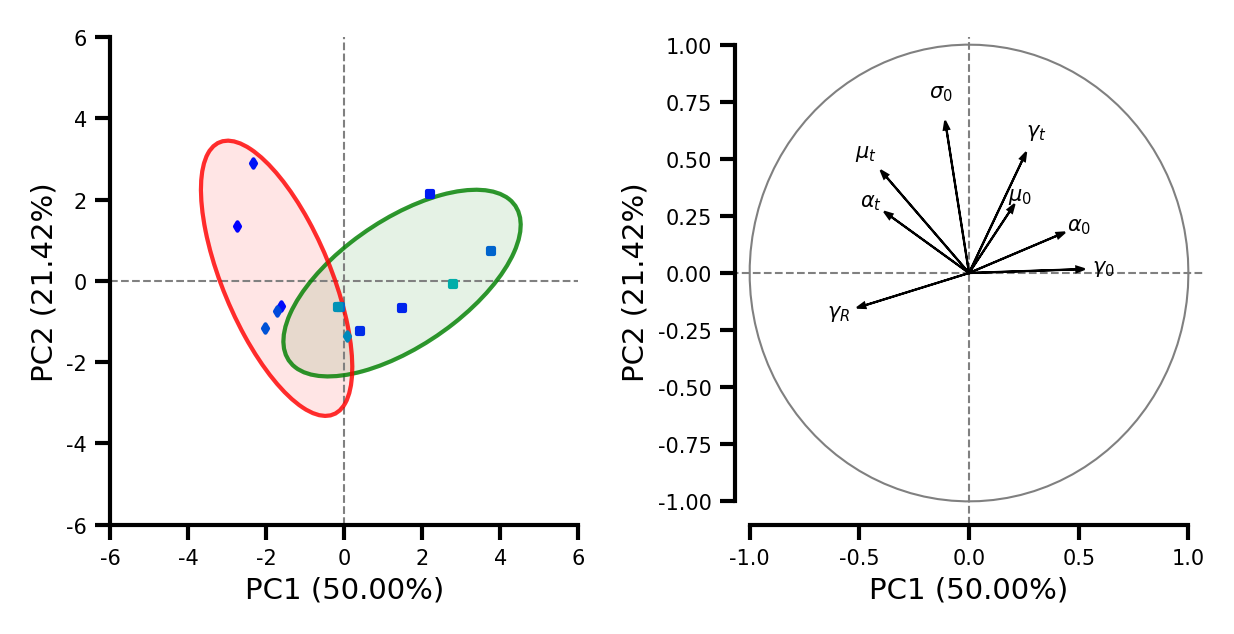

In [82]:
def PCA_individuals_plot(score, labels, pca=pca, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(2, 2))

    x = score[:,0]  # PC1
    y = score[:,1]  # PC2

    x_males, y_males = [], []
    x_females, y_females = [], []

    for animal in labels:
        ax.scatter(x[labels==animal], y[labels==animal], 
                    c=[rat_markers[animal][0] for _ in range(len(x[labels==animal]))], 
                    marker=rat_markers[animal][1], s=2, zorder=10)

        if 'M' in animal:
            x_males.append(x[labels==animal])
            y_males.append(y[labels==animal])
        else:
            x_females.append(x[labels==animal])
            y_females.append(y[labels==animal])


    ax.axhline(0, color='gray', linestyle='--', linewidth=.5, zorder=0)
    ax.axvline(0, color='gray', linestyle='--', linewidth=.5, zorder=0)

    ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
    ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')


    confidence_ellipse(np.array(x_males).flatten(), np.array(y_males).flatten(), color='g', ax=ax)
    confidence_ellipse(np.array(x_females).flatten(), np.array(y_females).flatten(), color='r', ax=ax)    

    ax.set_xlim(-6, 6)
    ax.set_ylim(-6, 6)

def PCA_variables_plot(coeff, variables=variables, pca=pca, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(2, 2))

    assert len(coeff) == len(variables)

    for i, var in enumerate(variables):
        ax.arrow(0, 0, coeff[i, 0], coeff[i, 1], 
                color='k', linestyle='-', linewidth=.5, width=0.001, head_width=0.025, zorder=1)

        offset = 1.25
        x_offset, y_offset = 0, 0

        # # if two variables are close to each other, we don't want their names to overlap
        # for j in range(i+1, len(variables)):

        #         if np.abs(coeff[i, 0] - coeff[j, 0]) < 0.1 and np.abs(coeff[i, 1] - coeff[j, 1]) < 0.01:
        #             print(i, j , np.abs(coeff[i, 0] - coeff[j, 0]) , np.abs(coeff[i, 1] - coeff[j, 1]))
        #             if np.abs(coeff[i, 0] - coeff[j, 0]) < np.abs(coeff[i, 1] - coeff[j, 1]):
        #                 x_offset = .1
        #             else:
        #                 y_offset = .1

        # heck it, just do it manually
        # if i == 0:
        #     y_offset = .05
        # elif i == 3:
        #     y_offset = -.05
        # elif i == 6:
        #     x_offset = .025
        #     y_offset = .025
        # elif i == 8:
        #     x_offset = -.05
        # elif i == 11:
        #     x_offset = .05

        ax.text(coeff[i, 0]*offset+x_offset, coeff[i, 1]*offset+y_offset, var, 
                color='k', ha='center', va='center', fontsize=5)

    # plot circle
    theta = np.linspace(0, 2*np.pi, 100)
    radius = 1
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)
    ax.plot(x, y, color='gray', linewidth=.5, zorder=0)

    ax.axhline(0, xmin=-1, xmax=1, color='gray', linestyle='--', linewidth=.5, zorder=0)
    ax.axvline(0, ymin=-1, ymax=1, color='gray', linestyle='--', linewidth=.5, zorder=0)

    ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
    ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1-1/30, 1+1/30)
    space_axes(ax)
    ax.spines['left'].set_bounds(-1, 1)

v = [r'$\alpha_0$', r"$\alpha_t$", r"$\alpha_R$", r'$\gamma_0$', r"$\gamma_t$", r"$\gamma_R$", 
        r'$\mu_0$', r"$\mu_t$", r"$\mu_R$", r'$\sigma_0$', r"$\sigma_t$", r"$\sigma_R$"]

v = [r'$\alpha_0$', r"$\alpha_t$", r'$\gamma_0$', r"$\gamma_t$", r"$\gamma_R$", 
        r'$\mu_0$', r"$\mu_t$", r'$\sigma_0$']

fig, axs = plt.subplots(1, 2, figsize=(4, 2), constrained_layout=True)
PCA_individuals_plot(X_new, labels, pca=pca, ax=axs[0])
PCA_variables_plot(np.transpose(pca.components_[0:2, :]), variables=v, pca=pca, ax=axs[1])


              PC1       PC2
alpha    0.402398  0.163971
alpha_t -0.355839  0.247251
gamma    0.489052  0.015973
gamma_t  0.243722  0.495194
gamma_R -0.474394 -0.141455
mu       0.186068  0.270427
mu_t    -0.377695  0.421812
sigma   -0.102742  0.628842


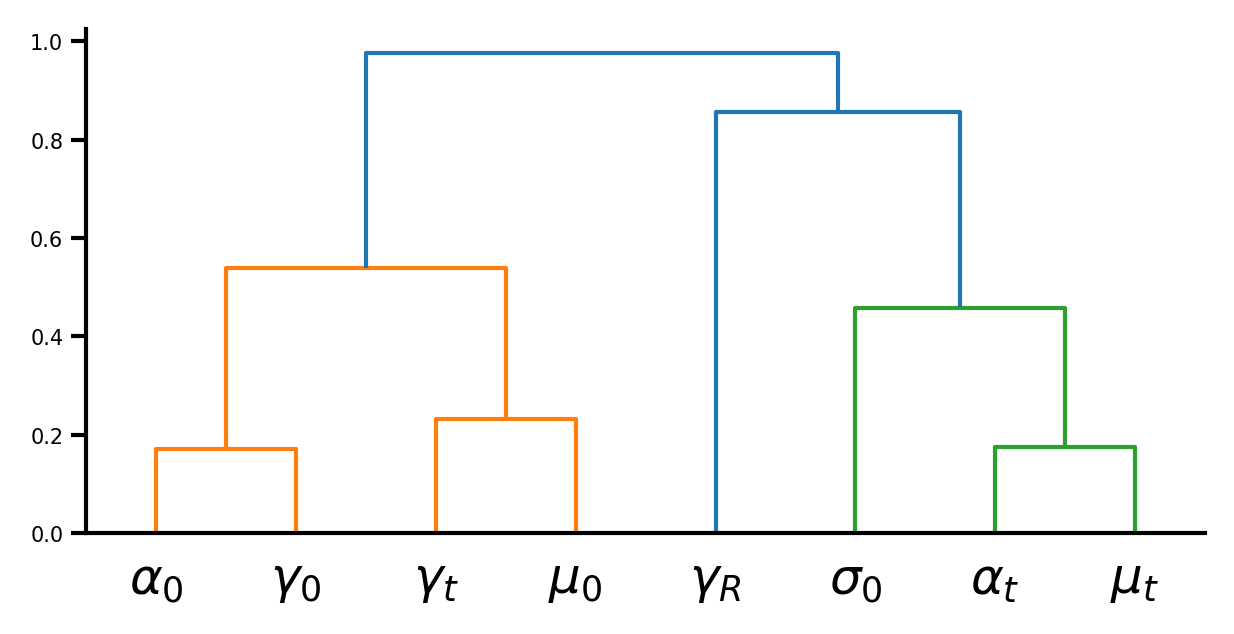

In [83]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=df.columns)
print(loadings)

fig, ax = plt.subplots(1, 1, figsize=(4, 2))
cl_mergings = linkage(loadings, method="complete", metric='euclidean')
dendrogram(cl_mergings, labels=v);

[0 1 0 2 1 1 1 1 2 1 1 1 2]


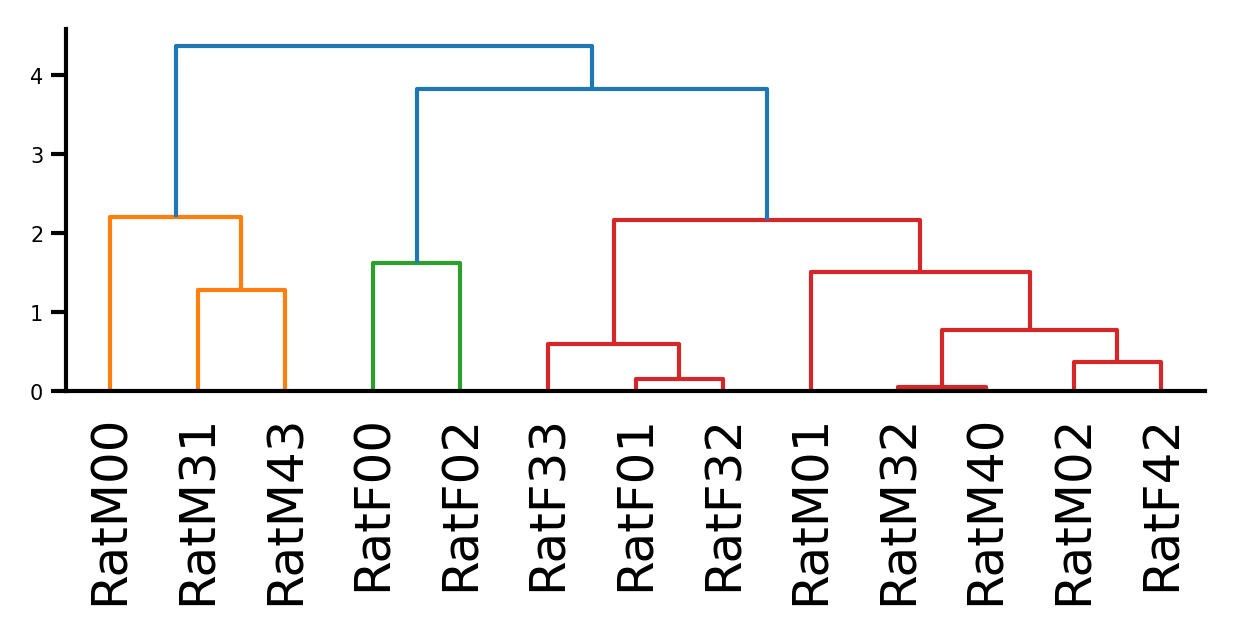

In [84]:
df_ = pd.DataFrame(X_new, index=intact, columns=['PC1', 'PC2'])

fig = plt.figure(figsize=(4, 2))
cl_mergings = linkage(df_, method="average", metric='euclidean')
# cl_mergings = linkage(df_, method='ward', metric='euclidean')
dendrogram(cl_mergings, labels=intact, #orientation='left');
                orientation='top', leaf_rotation=90)

cl_cluster_labels = cut_tree(cl_mergings, n_clusters=3).reshape(-1, )
print(cl_cluster_labels)


plt.show()

/home/david/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  app.launch_new_instance()
/home/david/.local/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


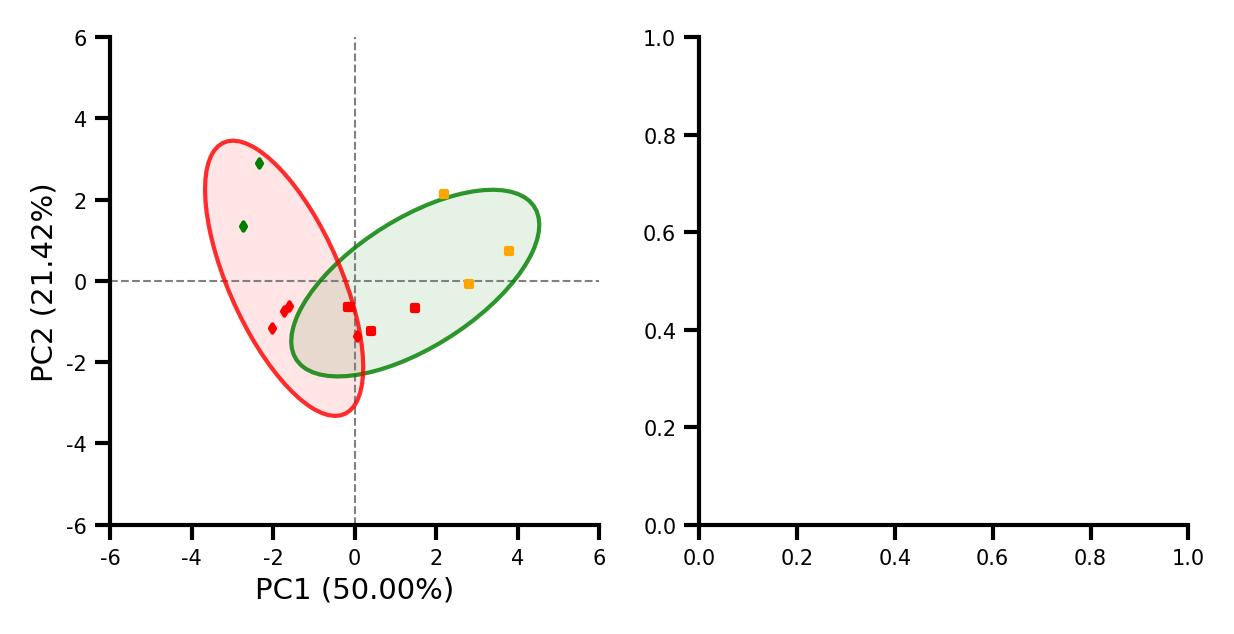

In [89]:
def PCA_hierachical_plot(score, labels, groups, pca=pca, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(2, 2))

    x = score[:,0]  # PC1
    y = score[:,1]  # PC2

    x_males, y_males = [], []
    x_females, y_females = [], []

    group_colors = ['g', 'r', 'orange']

    for animal, group in zip(labels, groups):
        ax.scatter(x[labels==animal], y[labels==animal],
                    c=group_colors[group], 
                    marker=rat_markers[animal][1], s=2, zorder=10)


    # for animal in labels:
    #     ax.scatter(x[labels==animal], y[labels==animal], 
    #                 c=[rat_markers[animal][0] for _ in range(len(x[labels==animal]))], 
    #                 marker=rat_markers[animal][1], s=2, zorder=10)

        if 'M' in animal:
            x_males.append(x[labels==animal])
            y_males.append(y[labels==animal])
        else:
            x_females.append(x[labels==animal])
            y_females.append(y[labels==animal])


    ax.axhline(0, color='gray', linestyle='--', linewidth=.5, zorder=0)
    ax.axvline(0, color='gray', linestyle='--', linewidth=.5, zorder=0)

    ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
    ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')


    confidence_ellipse(np.array(x_males).flatten(), np.array(y_males).flatten(), color='g', ax=ax)
    confidence_ellipse(np.array(x_females).flatten(), np.array(y_females).flatten(), color='r', ax=ax)    

    ax.set_xlim(-6, 6)
    ax.set_ylim(-6, 6)

fig, axs = plt.subplots(1, 2, figsize=(4, 2), constrained_layout=True)
PCA_hierachical_plot(X_new, labels, cl_cluster_labels, pca=pca, ax=axs[0])

$\alpha_0$: 0.010
$\alpha_t$: 0.003
$\alpha_R$: 0.630
$\gamma_0$: 0.390
$\gamma_t$: 0.829
$\gamma_R$: 0.574
$\mu_0$: 0.0
$\mu_t$: 0.5154
$\mu_R$: 0.158
$\sigma_0$: 0.0005
$\sigma_t$: 0.3248
$\sigma_R$: 0.3281


(-6.0, 6.0)

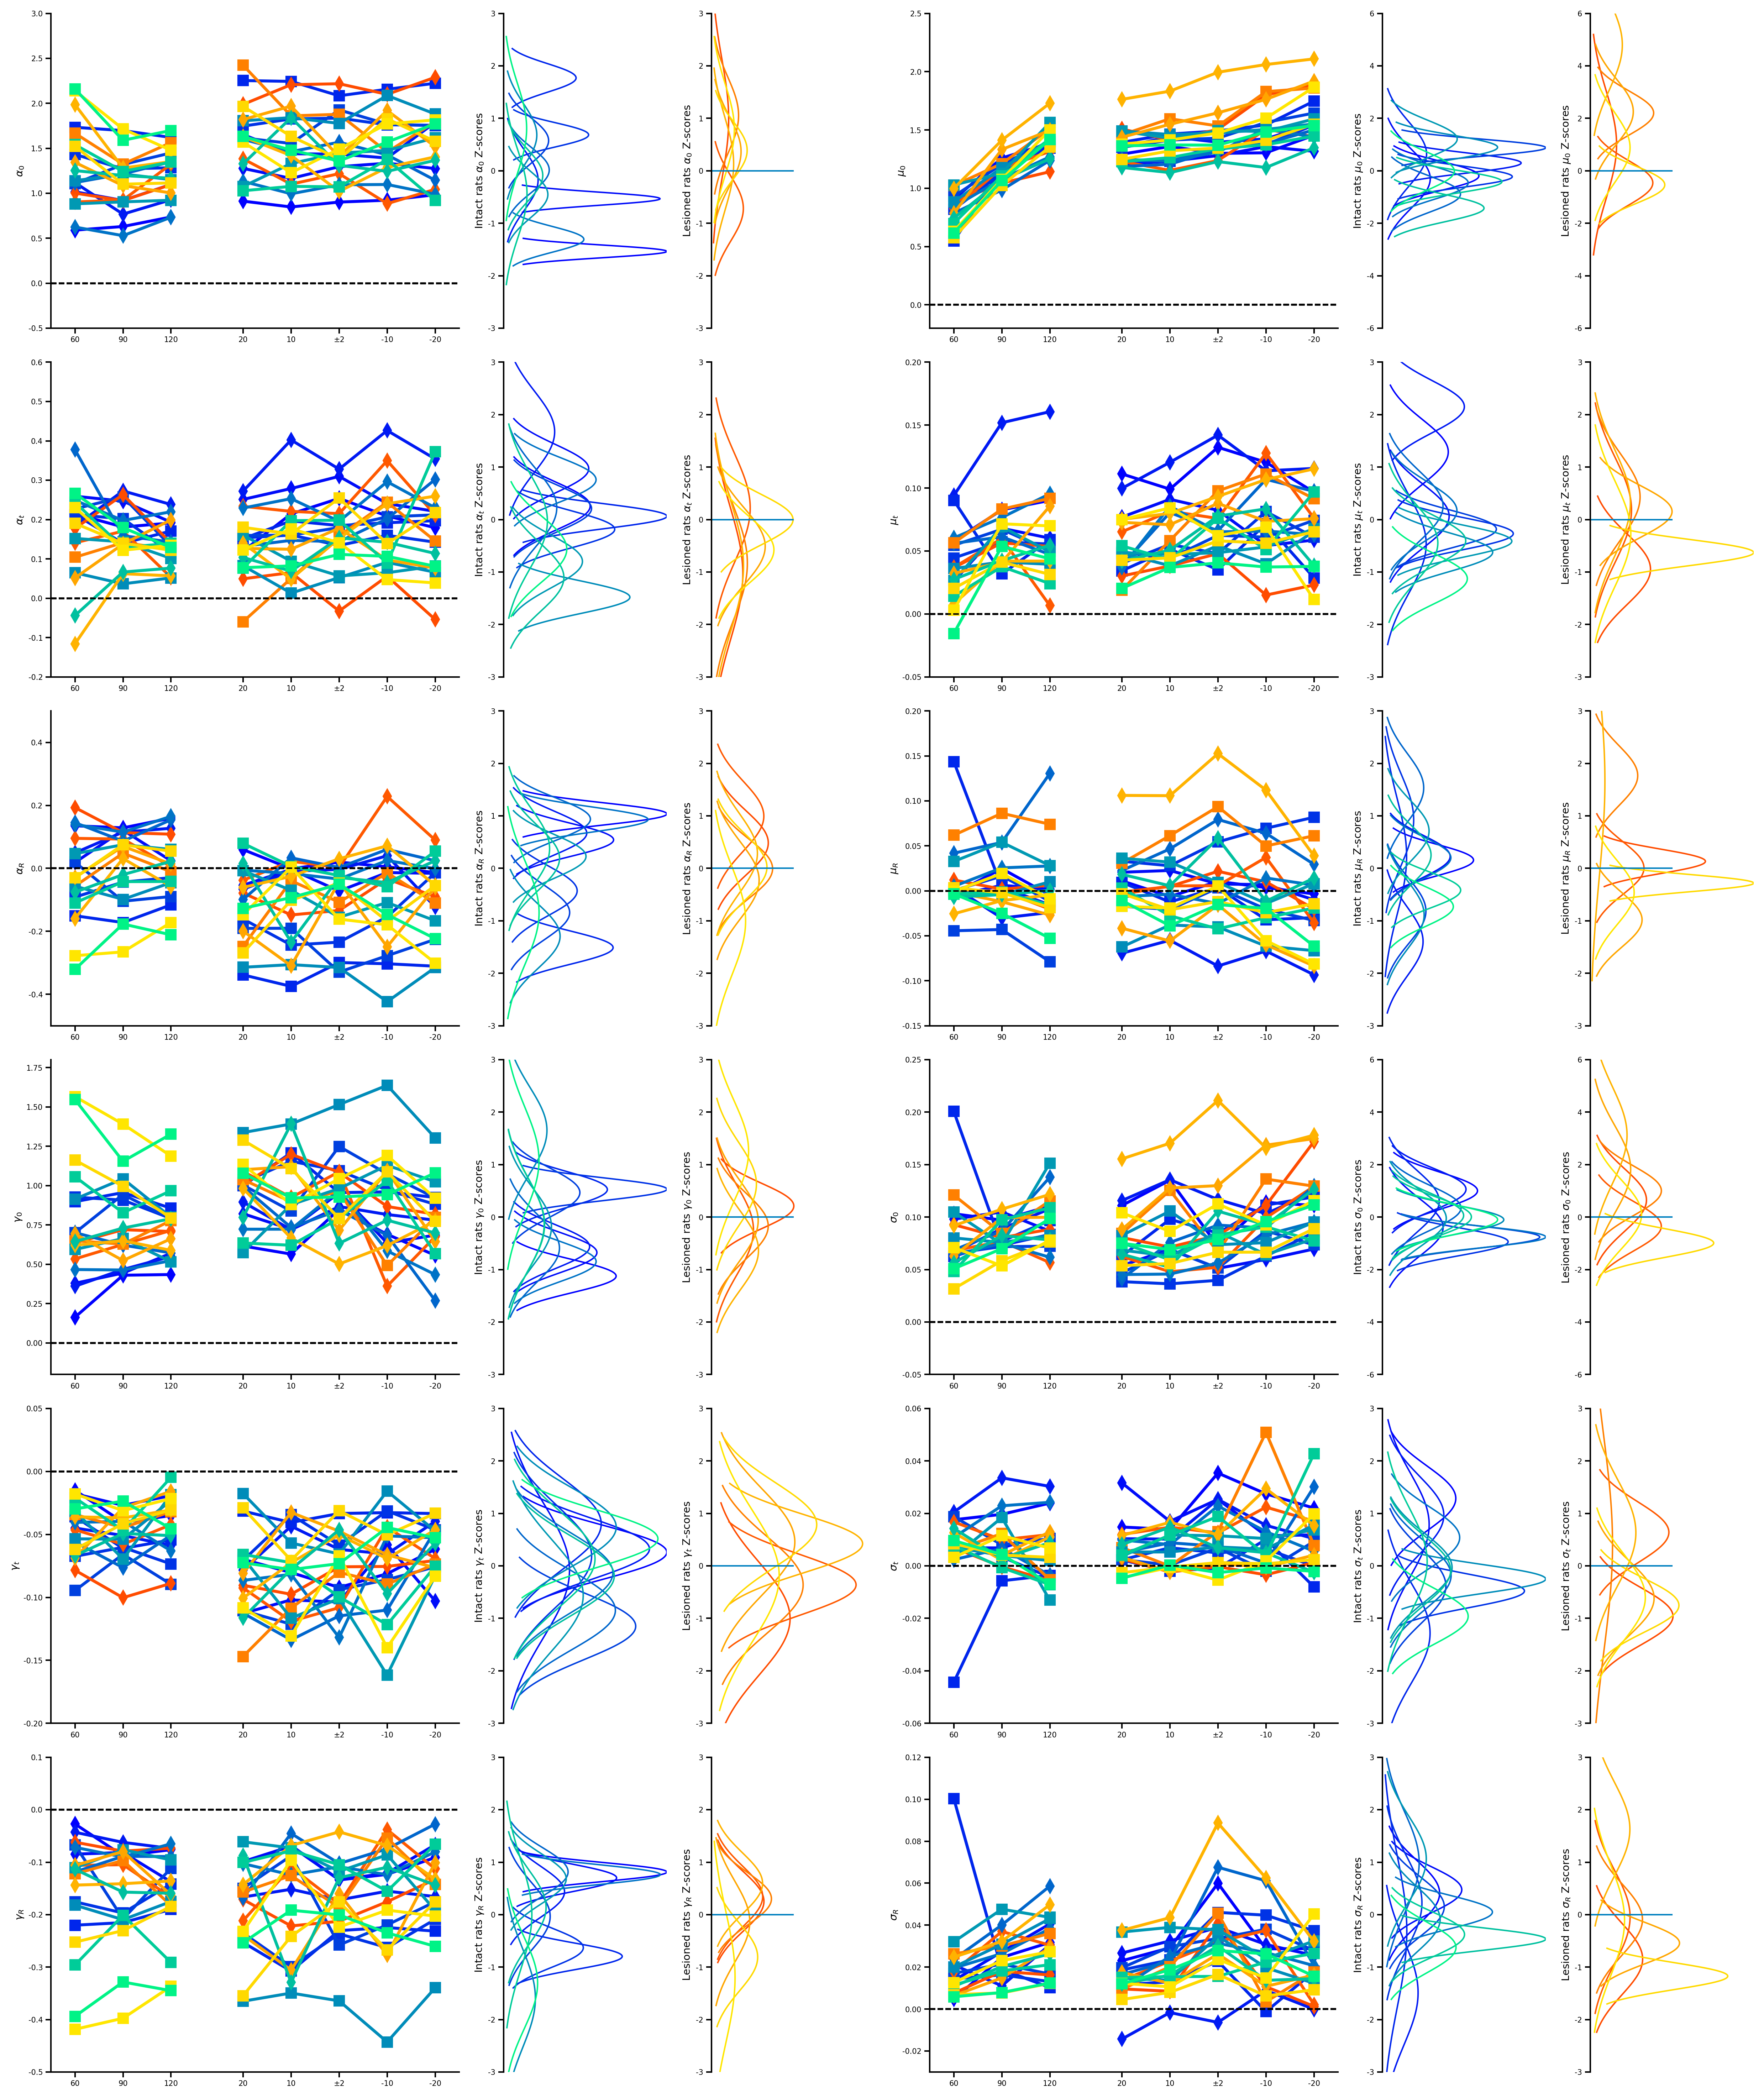

In [89]:
fig, axs = plt.subplots(6, 6, figsize=(42/2.56, 50/2.56), gridspec_kw={'width_ratios': [5, 2, 2, 5, 2, 2]}, constrained_layout=True)
ylabelsIDLE = [r'$\alpha_0$', r"$\alpha_t$", r"$\alpha_R$", r'$\gamma_0$', r"$\gamma_t$", r"$\gamma_R$"]
ylimsIDLE = [[-.5, 3], [-.2, .6], [-.5, .5], [-.2, 1.8], [-.2, .05], [-.5, .1]]
ylabelsRUN = [r'$\mu_0$', r"$\mu_t$", r"$\mu_R$", r'$\sigma_0$', r"$\sigma_t$", r"$\sigma_R$"]
ylimsRUN = [[-.2, 2.5], [-.05, .2], [-.15, .2], [-.05, .25], [-.06, .06], [-.03, .12], ]

varsIDLE = [alpha, alpha_t, alpha_R, gamma, gamma_t, gamma_R]
varsRUN = [mu, mu_t, mu_R, sigma, sigma_t, sigma_R, ]

for animal in animalList:
    for i, (var, ylabel, ylim) in enumerate(zip(varsIDLE, ylabelsIDLE, ylimsIDLE)):
        # x, y = np.arange(8), [var[animal]["60"], var[animal]["90"], var[animal]["120"], var[animal]["20"], var[animal]["10"], var[animal]["2"], var[animal]["rev10"], var[animal]["rev20"]]
        axs[i, 0].plot([0, 1, 2], [var[animal]["60"], var[animal]["90"], var[animal]["120"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], 
                        markersize=6.5, lw=2, linestyle=lines[brainstatus[animal]])
        axs[i, 0].plot([3.5, 4.5, 5.5, 6.5, 7.5], [var[animal]["20"], var[animal]["10"], var[animal]["2"], var[animal]["rev10"], var[animal]["rev20"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1],
                        markersize=6.5, lw=2, linestyle=lines[brainstatus[animal]])
        axs[i, 0].set_title(f"")
        axs[i, 0].set_xticks([0, 1, 2, 3.5, 4.5, 5.5, 6.5, 7.5])
        axs[i, 0].set_xticklabels(["60", "90", "120", "20", "10", "±2", "-10", "-20"])
        axs[i, 0].set_ylabel(ylabel)
        axs[i, 0].set_xlim(-.5, 8)
        axs[i, 0].set_ylim(ylim)
        axs[i, 0].axhline(0, color='black', linestyle='--', linewidth=1)

    for i, (var, ylabel, ylim) in enumerate(zip(varsRUN, ylabelsRUN, ylimsRUN)):
        axs[i, 3].plot([0, 1, 2], [var[animal]["60"], var[animal]["90"], var[animal]["120"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], 
                        markersize=6.5, lw=2, linestyle=lines[brainstatus[animal]])
        axs[i, 3].plot([3.5, 4.5, 5.5, 6.5, 7.5], [var[animal]["20"], var[animal]["10"], var[animal]["2"], var[animal]["rev10"], var[animal]["rev20"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1],
                        markersize=6.5, lw=2, linestyle=lines[brainstatus[animal]])
        axs[i, 3].set_title(f"")
        axs[i, 3].set_xticks([0, 1, 2, 3.5, 4.5, 5.5, 6.5, 7.5])
        axs[i, 3].set_xticklabels(["60", "90", "120", "20", "10", "±2", "-10", "-20"])
        axs[i, 3].set_ylabel(ylabel)
        axs[i, 3].set_xlim(-.5, 8)
        axs[i, 3].set_ylim(ylim)
        axs[i, 3].axhline(0, color='black', linestyle='--', linewidth=1)
    




Zalpha = {animal: {key: (alpha[animal][key] - np.mean([alpha[animal][key] for animal in intact]))/np.std([alpha[animal][key] for animal in intact]) for key in alpha[animal]} for animal in animalList}
Zalpha_t = {animal: {key: (alpha_t[animal][key] - np.mean([alpha_t[animal][key] for animal in intact]))/np.std([alpha_t[animal][key] for animal in intact]) for key in alpha_t[animal]} for animal in animalList}
Zalpha_R = {animal: {key: (alpha_R[animal][key] - np.mean([alpha_R[animal][key] for animal in intact]))/np.std([alpha_R[animal][key] for animal in intact]) for key in alpha_R[animal]} for animal in animalList}
Zgamma = {animal: {key: (gamma[animal][key] - np.mean([gamma[animal][key] for animal in intact]))/np.std([gamma[animal][key] for animal in intact]) for key in gamma[animal]} for animal in animalList}
Zgamma_t = {animal: {key: (gamma_t[animal][key] - np.mean([gamma_t[animal][key] for animal in intact]))/np.std([gamma_t[animal][key] for animal in intact]) for key in gamma_t[animal]} for animal in animalList}
Zgamma_R = {animal: {key: (gamma_R[animal][key] - np.mean([gamma_R[animal][key] for animal in intact]))/np.std([gamma_R[animal][key] for animal in intact]) for key in gamma_R[animal]} for animal in animalList}

traitsIDLE = {animal: [] for animal in animalList}
ZvarsIDLE = [Zalpha, Zalpha_t, Zalpha_R, Zgamma, Zgamma_t, Zgamma_R]
for j, zvar in enumerate(ZvarsIDLE):
    xmin, xmax = 0, 0
    ymax = 0
    allIntact = []
    allLesion = []
    for animal in animalList:
        zscores = [zvar[animal][cond] for cond in ["60", "90", "120", "20", "10", "2", "rev10", "rev20"]]
        xx = np.linspace(stats.norm.ppf(0.02, loc=np.mean(zscores), scale=np.std(zscores)), stats.norm.ppf(.98, loc=np.mean(zscores), scale=np.std(zscores)), 100)
        if min(xx) < xmin:
            xmin = min(xx)
        if max(xx) > xmax:
            xmax = max(xx)
        pdf = stats.norm.pdf(xx, np.mean(zscores), np.std(zscores))
        if max(pdf) > ymax:
            ymax = max(pdf)
        traitsIDLE[animal].append(np.mean(zscores))
        if brainstatus[animal] == "normal":
            axs[j, 1].plot(pdf, xx, color=rat_markers[animal][0], linestyle=lines[brainstatus[animal]])
            allIntact.extend(zscores)
        else:
            axs[j, 2].plot(pdf, xx, color=rat_markers[animal][0], linestyle=lines[brainstatus[animal]])
            allLesion.extend(zscores)
    
    allIntact = np.array(allIntact).flatten()
    allLesion = np.array(allLesion).flatten()
    perm = exact_mc_perm_test(allIntact, allLesion)
    print(f"{ylabelsIDLE[j]}: {perm:.3f}")

    # axs[j, 1].set_ylim(xmin, xmax)
    axs[j, 1].set_ylim(-3, 3)
    axs[j, 1].set_xlim(0, ymax)
    axs[j, 1].set_ylabel(f"Intact rats {ylabelsIDLE[j]} Z-scores")
    axs[j, 1].set_xlabel("")
    axs[j, 1].set_xticks([])
    axs[j, 1].spines['bottom'].set_visible(False)
    axs[j, 2].set_ylim(xmin, xmax)
    axs[j, 2].plot([0, ymax/2], [0, 0], c=plt.cm.get_cmap('winter')(.5))
    axs[j, 2].set_ylim(-3, 3)
    axs[j, 2].set_xlim(0, ymax)
    axs[j, 2].set_ylabel(f"Lesioned rats {ylabelsIDLE[j]} Z-scores")
    axs[j, 2].set_xlabel("")
    axs[j, 2].set_xticks([])
    axs[j, 2].spines['bottom'].set_visible(False)



Zmu = {animal: {key: (mu[animal][key] - np.mean([mu[animal][key] for animal in intact]))/np.std([mu[animal][key] for animal in intact]) for key in mu[animal]} for animal in animalList}
Zmu_t = {animal: {key: (mu_t[animal][key] - np.mean([mu_t[animal][key] for animal in intact]))/np.std([mu_t[animal][key] for animal in intact]) for key in mu_t[animal]} for animal in animalList}
Zmu_R = {animal: {key: (mu_R[animal][key] - np.mean([mu_R[animal][key] for animal in intact]))/np.std([mu_R[animal][key] for animal in intact]) for key in mu_R[animal]} for animal in animalList}
Zsigma = {animal: {key: (sigma[animal][key] - np.mean([sigma[animal][key] for animal in intact]))/np.std([sigma[animal][key] for animal in intact]) for key in sigma[animal]} for animal in animalList}
Zsigma_t = {animal: {key: (sigma_t[animal][key] - np.mean([sigma_t[animal][key] for animal in intact]))/np.std([sigma_t[animal][key] for animal in intact]) for key in sigma_t[animal]} for animal in animalList}
Zsigma_R = {animal: {key: (sigma_R[animal][key] - np.mean([sigma_R[animal][key] for animal in intact]))/np.std([sigma_R[animal][key] for animal in intact]) for key in sigma_R[animal]} for animal in animalList}

traitsRUN = {animal: [] for animal in animalList}
ZvarsRUN = [Zmu, Zmu_t, Zmu_R, Zsigma, Zsigma_t, Zsigma_R]
for j, zvar in enumerate(ZvarsRUN):
    xmin, xmax = 0, 0
    ymax = 0
    allIntact = []
    allLesion = []
    for animal in animalList:
        zscores = [zvar[animal][cond] for cond in ["60", "90", "120", "20", "10", "2", "rev10", "rev20"]]
        xx = np.linspace(stats.norm.ppf(0.02, loc=np.mean(zscores), scale=np.std(zscores)), stats.norm.ppf(.98, loc=np.mean(zscores), scale=np.std(zscores)), 100)
        if min(xx) < xmin:
            xmin = min(xx)
        if max(xx) > xmax:
            xmax = max(xx)
        pdf = stats.norm.pdf(xx, np.mean(zscores), np.std(zscores))
        if max(pdf) > ymax:
            ymax = max(pdf)
        traitsRUN[animal].append(np.mean(zscores))

        if brainstatus[animal] == "normal":
            axs[j, 4].plot(pdf, xx, color=rat_markers[animal][0], linestyle=lines[brainstatus[animal]])
            allIntact.extend(zscores)
        else:
            axs[j, 5].plot(pdf, xx, color=rat_markers[animal][0], linestyle=lines[brainstatus[animal]])
            allLesion.extend(zscores)
    

    allIntact = np.array(allIntact).flatten()
    allLesion = np.array(allLesion).flatten()
    perm = exact_mc_perm_test(allIntact, allLesion)
    print(f"{ylabelsRUN[j]}: {perm}")


    # axs[j, 4].set_ylim(xmin, xmax)
    axs[j, 4].set_ylim(-3, 3)
    axs[j, 4].set_xlim(0, ymax)

    axs[j, 4].set_ylabel(f"Intact rats {ylabelsRUN[j]} Z-scores")
    axs[j, 4].set_xlabel("")
    axs[j, 4].set_xticks([])
    axs[j, 4].spines['bottom'].set_visible(False)
    # axs[j, 5].set_ylim(xmin, xmax)
    axs[j, 5].set_ylim(-3, 3)
    axs[j, 5].set_xlim(0, ymax)
    axs[j, 5].plot([0, ymax/2], [0, 0], c=plt.cm.get_cmap('winter')(.5))
    axs[j, 5].set_ylabel(f"Lesioned rats {ylabelsRUN[j]} Z-scores")
    axs[j, 5].set_xlabel("")
    axs[j, 5].set_xticks([])
    axs[j, 5].spines['bottom'].set_visible(False)


axs[0, 4].set_ylim(-6, 6)
axs[0, 5].set_ylim(-6, 6)

axs[3, 4].set_ylim(-6, 6)
axs[3, 5].set_ylim(-6, 6)

# save_plot_as_png('/media/david/DAA6-6D9D/iBAGS/FitVariaComp.png', dpi=300, transparent=True, background='auto')

In [96]:
Zalpha = {animal: {key: (alpha[animal][key] - np.mean([alpha[animal][key] for animal in intact]))/np.std([alpha[animal][key] for animal in intact]) for key in alpha[animal]} for animal in animalList}
Zalpha

{'RatF00': {'60': -1.490459456268476,
  '90': -1.4491152599033246,
  '120': -1.539441794443443,
  '20': -1.5152529872694895,
  '10': -1.6302483033668145,
  '2': -1.6622523614645415,
  'rev10': -1.701050012321876,
  'rev20': -1.3014366755507374},
 'RatF01': {'60': -0.4637431109034192,
  '90': -0.5834838616240835,
  '120': -0.3156242268962187,
  '20': -0.5184798733030279,
  '10': -0.7984512420927088,
  '2': -0.5095976045545327,
  'rev10': -0.5053529592695138,
  'rev20': -0.5643094759602403},
 'RatF02': {'60': -0.21890746178623022,
  '90': -1.037820744572484,
  '120': -0.8910207707280836,
  '20': 0.5131591450741833,
  '10': -0.0784999130644697,
  '2': -0.10187043435759277,
  'rev10': -0.33957284887829237,
  'rev20': 0.7384058534235355},
 'RatM00': {'60': 1.2636593707333692,
  '90': 1.7393700115786799,
  '120': 1.4531866042409363,
  '20': 2.1554726340480754,
  '10': 2.0321681824183977,
  '2': 1.7989725329702677,
  'rev10': 1.881180358126058,
  'rev20': 1.8376970861996063},
 'RatM01': {'60'

In [95]:
l = []
for animal in intact:
    l.append(Zalpha[animal]["60"])

print(np.mean(l), np.std(l))

-3.75767792950053e-16 1.0


In [ ]:
fig, axs = plt.subplots(6, 6, figsize=(42/2.56, 50/2.56), gridspec_kw={'width_ratios': [5, 2, 2, 5, 2, 2]}, constrained_layout=True)
ylabelsIDLE = [r'$\alpha_0$', r"$\alpha_t$", r"$\alpha_R$", r'$\gamma_0$', r"$\gamma_t$", r"$\gamma_R$"]
ylimsIDLE = [[-.5, 3], [-.2, .6], [-.5, .5], [-.2, 1.8], [-.2, .05], [-.5, .1]]
ylabelsRUN = [r'$\mu_0$', r"$\mu_t$", r"$\mu_R$", r'$\sigma_0$', r"$\sigma_t$", r"$\sigma_R$"]
ylimsRUN = [[-.2, 2.5], [-.05, .2], [-.15, .2], [-.05, .25], [-.06, .06], [-.03, .12], ]

varsIDLE = [alpha, alpha_t, alpha_R, gamma, gamma_t, gamma_R]
varsRUN = [mu, mu_t, mu_R, sigma, sigma_t, sigma_R, ]

for animal in intact:
    for i, (var, ylabel, ylim) in enumerate(zip(varsIDLE, ylabelsIDLE, ylimsIDLE)):
        # x, y = np.arange(8), [var[animal]["60"], var[animal]["90"], var[animal]["120"], var[animal]["20"], var[animal]["10"], var[animal]["2"], var[animal]["rev10"], var[animal]["rev20"]]
        axs[i, 0].plot([0, 1, 2], [var[animal]["60"], var[animal]["90"], var[animal]["120"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], 
                        markersize=6.5, lw=2, linestyle=lines[brainstatus[animal]])
        axs[i, 0].plot([3.5, 4.5, 5.5, 6.5, 7.5], [var[animal]["20"], var[animal]["10"], var[animal]["2"], var[animal]["rev10"], var[animal]["rev20"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1],
                        markersize=6.5, lw=2, linestyle=lines[brainstatus[animal]])
        axs[i, 0].set_title(f"")
        axs[i, 0].set_xticks([0, 1, 2, 3.5, 4.5, 5.5, 6.5, 7.5])
        axs[i, 0].set_xticklabels(["60", "90", "120", "20", "10", "±2", "-10", "-20"])
        axs[i, 0].set_ylabel(ylabel)
        axs[i, 0].set_xlim(-.5, 8)
        axs[i, 0].set_ylim(ylim)
        axs[i, 0].axhline(0, color='black', linestyle='--', linewidth=1)

    for i, (var, ylabel, ylim) in enumerate(zip(varsRUN, ylabelsRUN, ylimsRUN)):
        axs[i, 3].plot([0, 1, 2], [var[animal]["60"], var[animal]["90"], var[animal]["120"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], 
                        markersize=6.5, lw=2, linestyle=lines[brainstatus[animal]])
        axs[i, 3].plot([3.5, 4.5, 5.5, 6.5, 7.5], [var[animal]["20"], var[animal]["10"], var[animal]["2"], var[animal]["rev10"], var[animal]["rev20"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1],
                        markersize=6.5, lw=2, linestyle=lines[brainstatus[animal]])
        axs[i, 3].set_title(f"")
        axs[i, 3].set_xticks([0, 1, 2, 3.5, 4.5, 5.5, 6.5, 7.5])
        axs[i, 3].set_xticklabels(["60", "90", "120", "20", "10", "±2", "-10", "-20"])
        axs[i, 3].set_ylabel(ylabel)
        axs[i, 3].set_xlim(-.5, 8)
        axs[i, 3].set_ylim(ylim)
        axs[i, 3].axhline(0, color='black', linestyle='--', linewidth=1)
    

animalList = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02', 
              'RatF30', 'RatF31', 'RatF32', 'RatF33', 'RatM30', 'RatM31', 'RatM32', 
              'RatF40', 'RatF41', 'RatF42', 'RatM40', 'RatM41', 'RatM42', 'RatM43']

intact = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02', 
            'RatF32', 'RatF33', 'RatM31', 'RatM32', 'RatF42', 'RatM40', 'RatM43']



Zalpha = {animal: {key: (alpha[animal][key] - np.mean([alpha[animal][key] for animal in intact]))/np.std([alpha[animal][key] for animal in intact]) for key in alpha[animal]} for animal in animalList}
Zalpha_t = {animal: {key: (alpha_t[animal][key] - np.mean([alpha_t[animal][key] for animal in intact]))/np.std([alpha_t[animal][key] for animal in intact]) for key in alpha_t[animal]} for animal in animalList}
Zalpha_R = {animal: {key: (alpha_R[animal][key] - np.mean([alpha_R[animal][key] for animal in intact]))/np.std([alpha_R[animal][key] for animal in intact]) for key in alpha_R[animal]} for animal in animalList}
Zgamma = {animal: {key: (gamma[animal][key] - np.mean([gamma[animal][key] for animal in intact]))/np.std([gamma[animal][key] for animal in intact]) for key in gamma[animal]} for animal in animalList}
Zgamma_t = {animal: {key: (gamma_t[animal][key] - np.mean([gamma_t[animal][key] for animal in intact]))/np.std([gamma_t[animal][key] for animal in intact]) for key in gamma_t[animal]} for animal in animalList}
Zgamma_R = {animal: {key: (gamma_R[animal][key] - np.mean([gamma_R[animal][key] for animal in intact]))/np.std([gamma_R[animal][key] for animal in intact]) for key in gamma_R[animal]} for animal in animalList}

traitsIDLE = {animal: [] for animal in animalList}
ZvarsIDLE = [Zalpha, Zalpha_t, Zalpha_R, Zgamma, Zgamma_t, Zgamma_R]
for j, zvar in enumerate(ZvarsIDLE):
    xmin, xmax = 0, 0
    ymax = 0
    allIntact = []
    allLesion = []
    for animal in animalList:
        zscores = [zvar[animal][cond] for cond in ["60", "90", "120", "20", "10", "2", "rev10", "rev20"]]
        xx = np.linspace(stats.norm.ppf(0.02, loc=np.mean(zscores), scale=np.std(zscores)), stats.norm.ppf(.98, loc=np.mean(zscores), scale=np.std(zscores)), 100)
        if min(xx) < xmin:
            xmin = min(xx)
        if max(xx) > xmax:
            xmax = max(xx)
        pdf = stats.norm.pdf(xx, np.mean(zscores), np.std(zscores))
        if max(pdf) > ymax:
            ymax = max(pdf)
        traitsIDLE[animal].append(np.mean(zscores))
        if brainstatus[animal] == "normal":
            axs[j, 1].plot(pdf, xx, color=rat_markers[animal][0], linestyle=lines[brainstatus[animal]])
            allIntact.extend(zscores)
        else:
            axs[j, 2].plot(pdf, xx, color=rat_markers[animal][0], linestyle=lines[brainstatus[animal]])
            allLesion.extend(zscores)
    
    Ri = compute_Ri(zvar, intact)
    axs[j, 1].annotate(f'Ri = {Ri:.2f}', xy=(0.125, 0.9), xycoords='axes fraction', color=Ri_color(Ri), fontsize=14, )

    allIntact = np.array(allIntact).flatten()
    allLesion = np.array(allLesion).flatten()
    perm = exact_mc_perm_test(allIntact, allLesion)
    print(f"{ylabelsIDLE[j]}: {perm:.3f}")
    if perm < 0.05:
        intact_vs_lesion_Zscore(axs[j, 2], 0, 1, perm, 
                                    [0, np.mean([traitsIDLE[animal][j] for animal in animalList if brainstatus[animal] != 'normal'])], 
                                    [ymax/2, ymax/2], yerr=None, dh=ymax/10, barh=ymax/20, fs=14, maxasterix=1)

    # axs[j, 1].set_ylim(xmin, xmax)
    axs[j, 1].set_ylim(-3, 3)
    axs[j, 1].set_xlim(0, ymax)
    axs[j, 1].set_ylabel(f"Intact rats {ylabelsIDLE[j]} Z-scores")
    axs[j, 1].set_xlabel("")
    axs[j, 1].set_xticks([])
    axs[j, 1].spines['bottom'].set_visible(False)
    axs[j, 2].set_ylim(xmin, xmax)
    axs[j, 2].plot([0, ymax/2], [0, 0], c=plt.cm.get_cmap('winter')(.5))
    axs[j, 2].set_ylim(-3, 3)
    axs[j, 2].set_xlim(0, ymax)
    axs[j, 2].set_ylabel(f"Lesioned rats {ylabelsIDLE[j]} Z-scores")
    axs[j, 2].set_xlabel("")
    axs[j, 2].set_xticks([])
    axs[j, 2].spines['bottom'].set_visible(False)



Zmu = {animal: {key: (mu[animal][key] - np.mean([mu[animal][key] for animal in intact]))/np.std([mu[animal][key] for animal in intact]) for key in mu[animal]} for animal in animalList}
Zmu_t = {animal: {key: (mu_t[animal][key] - np.mean([mu_t[animal][key] for animal in intact]))/np.std([mu_t[animal][key] for animal in intact]) for key in mu_t[animal]} for animal in animalList}
Zmu_R = {animal: {key: (mu_R[animal][key] - np.mean([mu_R[animal][key] for animal in intact]))/np.std([mu_R[animal][key] for animal in intact]) for key in mu_R[animal]} for animal in animalList}
Zsigma = {animal: {key: (sigma[animal][key] - np.mean([sigma[animal][key] for animal in intact]))/np.std([sigma[animal][key] for animal in intact]) for key in sigma[animal]} for animal in animalList}
Zsigma_t = {animal: {key: (sigma_t[animal][key] - np.mean([sigma_t[animal][key] for animal in intact]))/np.std([sigma_t[animal][key] for animal in intact]) for key in sigma_t[animal]} for animal in animalList}
Zsigma_R = {animal: {key: (sigma_R[animal][key] - np.mean([sigma_R[animal][key] for animal in intact]))/np.std([sigma_R[animal][key] for animal in intact]) for key in sigma_R[animal]} for animal in animalList}

traitsRUN = {animal: [] for animal in animalList}
ZvarsRUN = [Zmu, Zmu_t, Zmu_R, Zsigma, Zsigma_t, Zsigma_R]
for j, zvar in enumerate(ZvarsRUN):
    xmin, xmax = 0, 0
    ymax = 0
    allIntact = []
    allLesion = []
    for animal in animalList:
        zscores = [zvar[animal][cond] for cond in ["60", "90", "120", "20", "10", "2", "rev10", "rev20"]]
        xx = np.linspace(stats.norm.ppf(0.02, loc=np.mean(zscores), scale=np.std(zscores)), stats.norm.ppf(.98, loc=np.mean(zscores), scale=np.std(zscores)), 100)
        if min(xx) < xmin:
            xmin = min(xx)
        if max(xx) > xmax:
            xmax = max(xx)
        pdf = stats.norm.pdf(xx, np.mean(zscores), np.std(zscores))
        if max(pdf) > ymax:
            ymax = max(pdf)
        traitsRUN[animal].append(np.mean(zscores))

        if brainstatus[animal] == "normal":
            axs[j, 4].plot(pdf, xx, color=rat_markers[animal][0], linestyle=lines[brainstatus[animal]])
            allIntact.extend(zscores)
        else:
            axs[j, 5].plot(pdf, xx, color=rat_markers[animal][0], linestyle=lines[brainstatus[animal]])
            allLesion.extend(zscores)
    
    Ri = compute_Ri(zvar, intact)
    axs[j, 4].annotate(f'Ri = {Ri:.2f}', xy=(0.125, 0.9), xycoords='axes fraction', color=Ri_color(Ri), fontsize=14, )

    allIntact = np.array(allIntact).flatten()
    allLesion = np.array(allLesion).flatten()
    perm = exact_mc_perm_test(allIntact, allLesion)
    print(f"{ylabelsRUN[j]}: {perm}")
    if perm < 0.05:
        intact_vs_lesion_Zscore(axs[j, 5], 0, 1, perm, 
                                    [0, np.mean([traitsRUN[animal][j] for animal in animalList if brainstatus[animal] != 'normal'])], 
                                    [ymax/2, ymax/2], yerr=None, dh=ymax/10, barh=ymax/20, fs=14, maxasterix=1)



    # axs[j, 4].set_ylim(xmin, xmax)
    axs[j, 4].set_ylim(-3, 3)
    axs[j, 4].set_xlim(0, ymax)

    axs[j, 4].set_ylabel(f"Intact rats {ylabelsRUN[j]} Z-scores")
    axs[j, 4].set_xlabel("")
    axs[j, 4].set_xticks([])
    axs[j, 4].spines['bottom'].set_visible(False)
    # axs[j, 5].set_ylim(xmin, xmax)
    axs[j, 5].set_ylim(-3, 3)
    axs[j, 5].set_xlim(0, ymax)
    axs[j, 5].plot([0, ymax/2], [0, 0], c=plt.cm.get_cmap('winter')(.5))
    axs[j, 5].set_ylabel(f"Lesioned rats {ylabelsRUN[j]} Z-scores")
    axs[j, 5].set_xlabel("")
    axs[j, 5].set_xticks([])
    axs[j, 5].spines['bottom'].set_visible(False)


axs[0, 4].set_ylim(-6, 6)
axs[0, 5].set_ylim(-6, 6)

axs[3, 4].set_ylim(-6, 6)
axs[3, 5].set_ylim(-6, 6)

# save_plot_as_png('/media/david/DAA6-6D9D/iBAGS/FitVariaComp.png', dpi=300, transparent=True, background='auto')

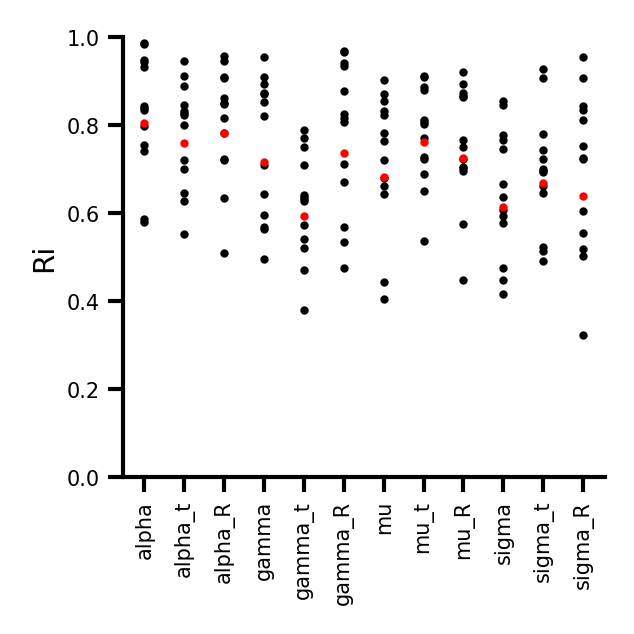

In [21]:
vars = alpha, alpha_t, alpha_R, gamma, gamma_t, gamma_R, mu, mu_t, mu_R, sigma, sigma_t, sigma_R
names = ('alpha', 'alpha_t', 'alpha_R', 'gamma', 'gamma_t', 'gamma_R', 'mu', 'mu_t', 'mu_R', 'sigma', 'sigma_t', 'sigma_R')

fig, ax = plt.subplots(1, 1, figsize=(2, 2))

for i, (var, name) in enumerate(zip(vars, names)):
    normalized = {animal: {key: (var[animal][key] - np.mean([var[animal][key] for animal in intact]))/np.std([var[animal][key] for animal in intact]) for key in var[animal]} for animal in animalList}
    df = pd.DataFrame(normalized)

    # only keep animals that are in intact list
    df = df[intact]


    intra_var = df.var(ddof=0).mean()
    inter_var = df.apply(lambda row: row.var(ddof=0), axis=1).mean()
    indiv_var = {animal: np.var(df[animal].values) for animal in intact}

    populationRi = inter_var/(intra_var+inter_var)
    indivRi = {animal: inter_var/(indiv_var[animal]+inter_var) for animal in intact}

    ax.scatter([i]*len(indivRi), list(indivRi.values()), color='k', s=1)
    ax.scatter(i, populationRi, color='r', s=1)
    # ax.bar(i, populationRi, color='k')
    ax.set_xticks(range(len(vars)))
    ax.set_xticklabels(names, rotation=90)
    ax.set_ylabel('Ri')
    ax.set_ylim(0, 1)
    
    


In [22]:
all_traits = { key:traitsRUN.get(key,[])+traitsIDLE.get(key,[]) for key in set(list(traitsRUN.keys())+list(traitsIDLE.keys())) }
indices = ['mu_0', 'mu_t', 'mu_R', 'sigma_0', 'sigma_t', 'sigma_R', 'alpha_0', 'alpha_t', 'alpha_R', 'gamma_0', 'gamma_t', 'gamma_R']
df = pd.DataFrame(all_traits, columns=intact, index=indices).T

'remove the traits that are not in the figure'
df = df.drop(columns = [ 'sigma_t','sigma_R', 'mu_R', 'alpha_R',])
df

mu_0      mu_t   sigma_0   alpha_0   alpha_t   gamma_0   gamma_t  \
RatF00 -0.194985  1.289294  1.005045 -1.536157  0.256408 -1.124285  0.259550   
RatF01 -0.300359  0.065846 -0.392920 -0.532380  0.970217 -0.675849 -0.085422   
RatF02  0.297565  2.151373  1.060804 -0.177016  1.673750 -0.562656  0.324636   
RatM00  0.637030 -0.468898  0.602340  1.770213  0.063794  0.525760  0.801078   
RatM01 -0.223730 -0.268046 -0.938948  0.685439 -0.185844  0.531768  0.190412   
RatM02  0.879926 -0.182877 -0.761152  0.576246  0.211393  0.467791 -1.150566   
RatF32 -0.888769  0.255257  0.351774  0.015553  0.225211 -0.589979 -0.847570   
RatF33 -0.460363  0.168644 -0.756600 -1.306486  0.759660 -0.846209 -0.131406   
RatM31  0.895374 -0.622519 -0.099680  0.681264 -1.479751  1.653984  0.738433   
RatM32  1.211098 -0.411732 -0.046863 -0.452633 -0.798659 -0.185834 -0.560169   
RatF42 -1.423501 -0.404379  0.062506 -0.088384 -1.104188 -0.134605 -0.190248   
RatM40 -0.414843 -0.445293  0.007734 -0.442043 -0.028955 -0.139411  0.133405   
RatM43 -0.014442 -1.126671 -0.094040  0.806385 -0.563037  1.079527  0.517868   

         gamma_R  
RatF00  0.812557  
RatF01  0.700687  
RatF02  0.436068  
RatM00 -0.795479  
RatM01 -0.629510  
RatM02 -0.032863  
RatF32  0.814835  
RatF33  0.763046  
RatM31 -1.593366  
RatM32  0.684196  
RatF42  0.140543  
RatM40  0.003121  
RatM43 -1.303835

# correlation matrix

/home/david/.local/lib/python3.7/site-packages/IPython/core/pylabtools.py:137: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  fig.canvas.print_figure(bytes_io, **kw)


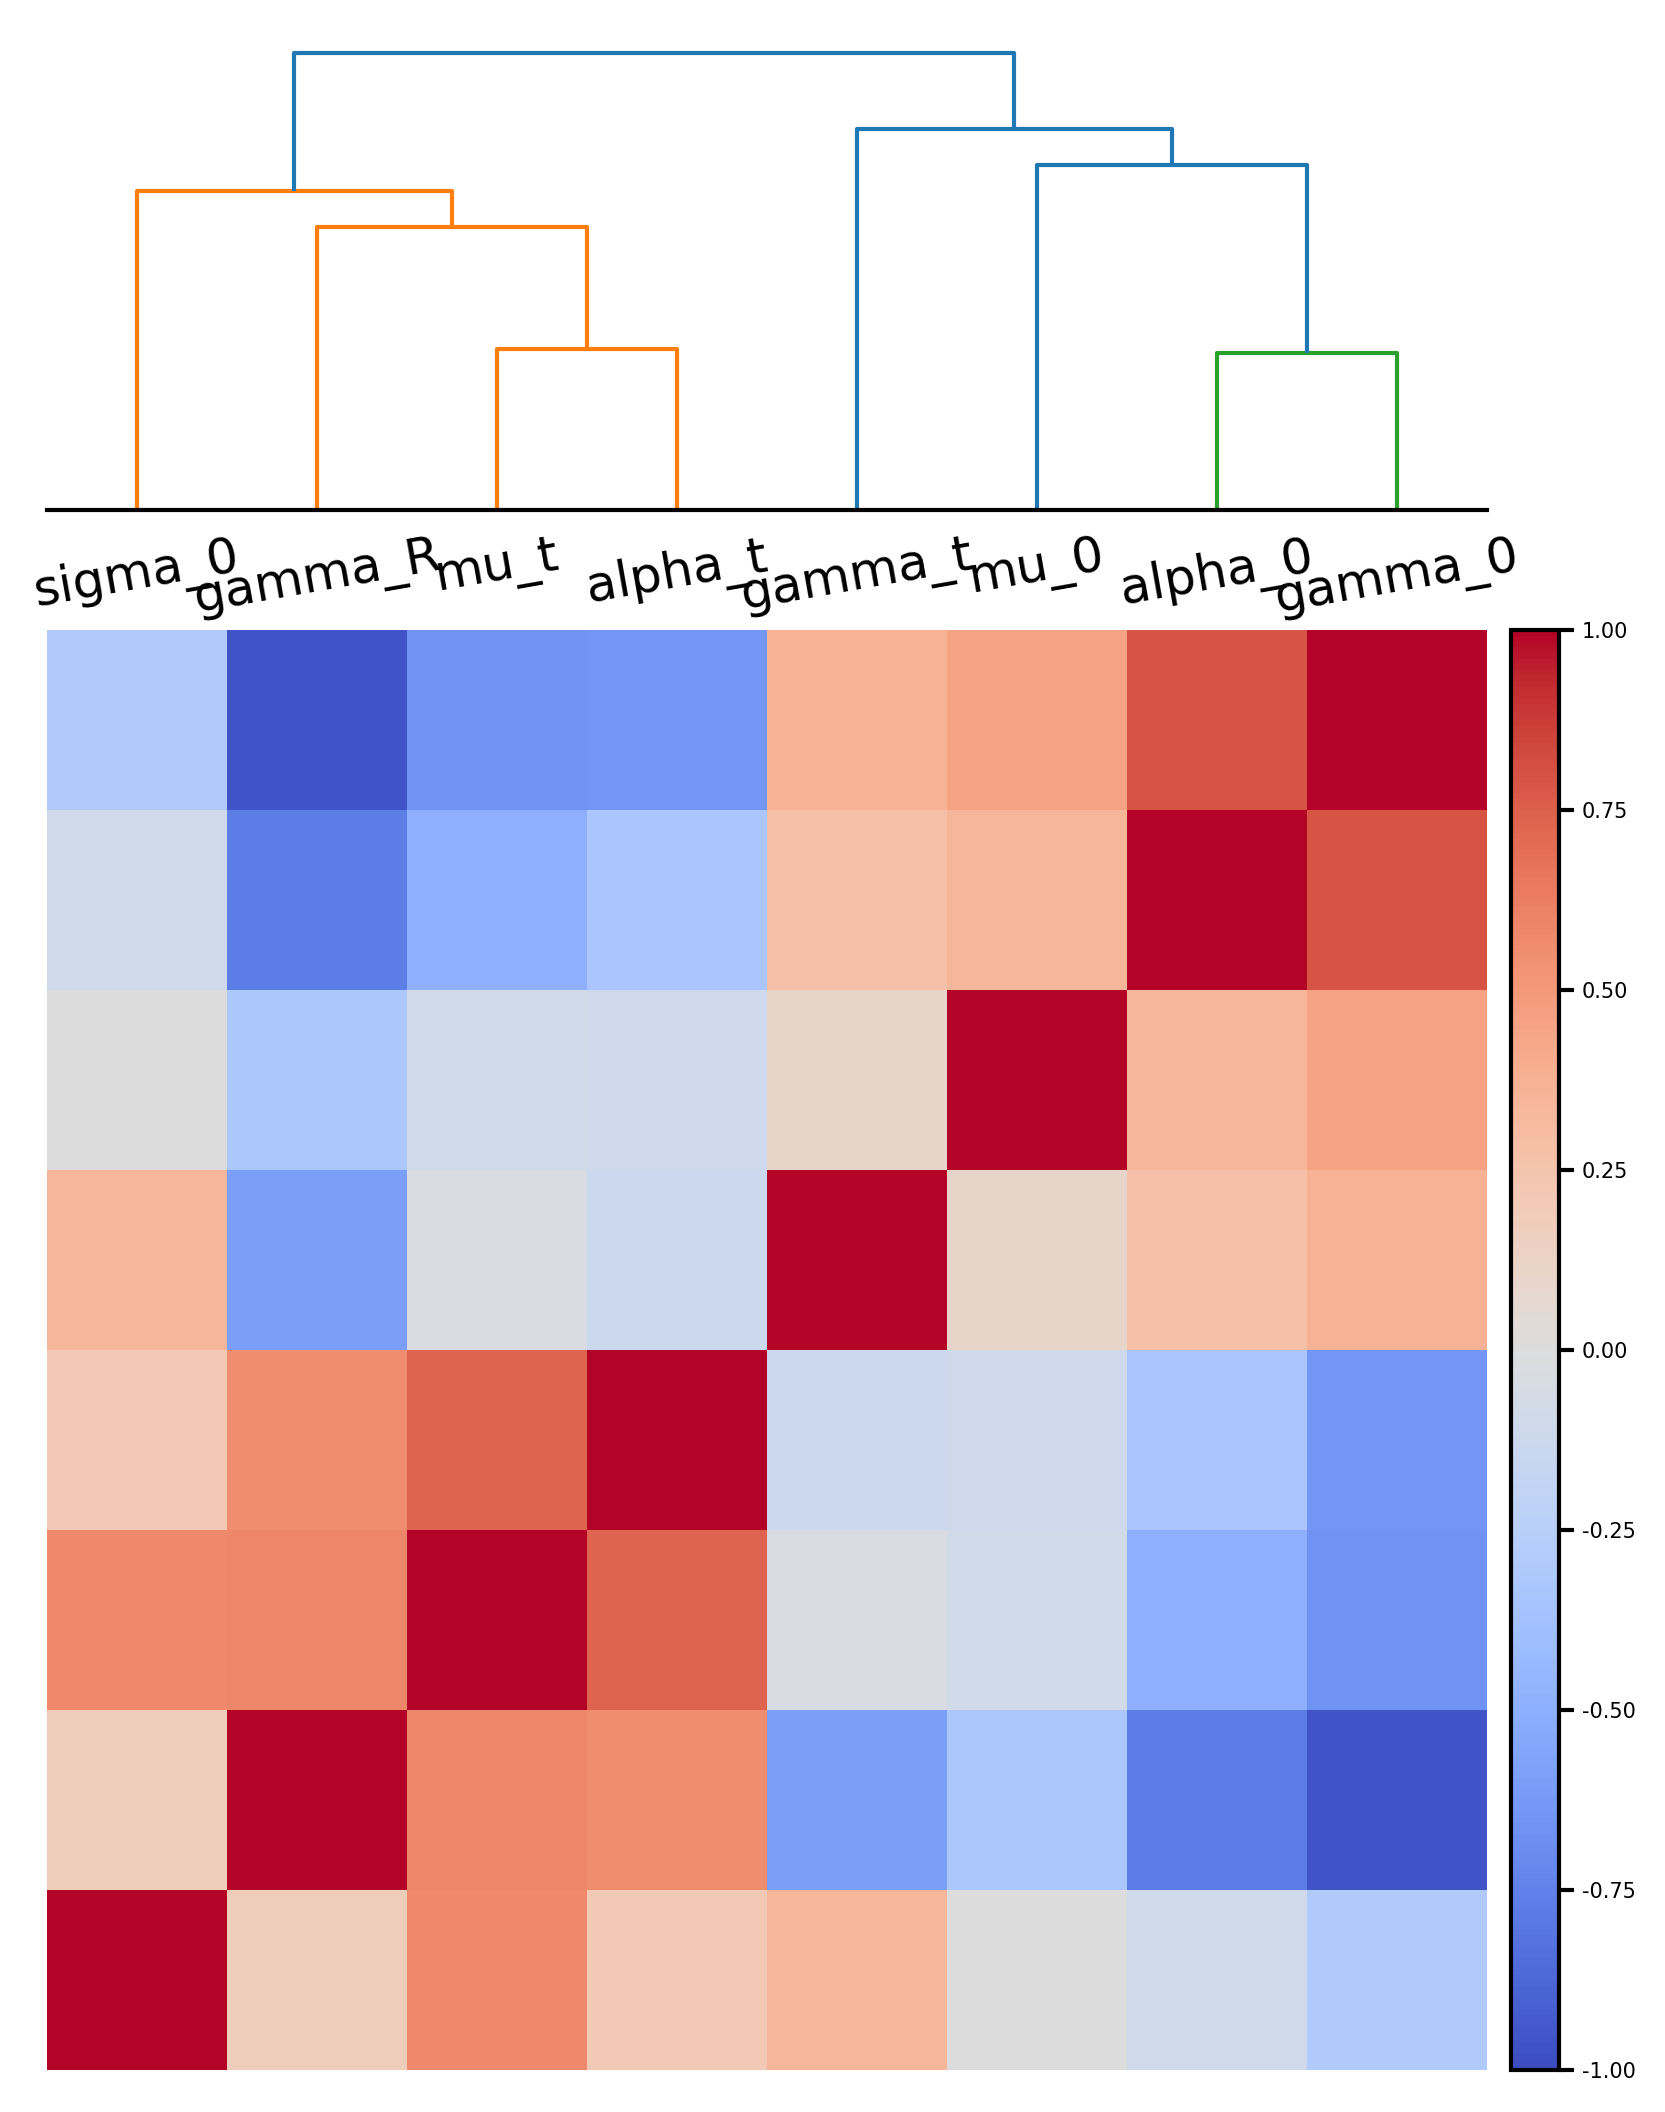

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Compute and plot first dendrogram.
fig = plt.figure(figsize=(8, 8))


# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3, 0.75, 0.6, 0.2])
correlations = df.corr()


Y = linkage(correlations)
# Y = linkage(df, method='ward')
Z2 = dendrogram(Y, labels=df.columns, orientation='top', leaf_rotation=10)
# ax2.set_xticks([])
# ax2.spines['bottom'].set_visible(False)
ax2.set_yticks([])
ax2.spines['left'].set_visible(False)

# Plot distance matrix.
axmatrix = fig.add_axes([0.3, 0.1, 0.6, 0.6])
correlations = correlations.to_numpy()
correlations = correlations[Z2['leaves'], :]
correlations = correlations[:, Z2['leaves']]
im = axmatrix.matshow(correlations, aspect='auto', origin='lower', cmap='coolwarm', vmin=-1, vmax=1)
axmatrix.set_xticks([])
axmatrix.spines['bottom'].set_visible(False)
axmatrix.set_yticks([])
axmatrix.spines['left'].set_visible(False)

# Plot colorbar.
axcolor = fig.add_axes([0.91, 0.1, 0.02, 0.6])
plt.colorbar(im, cax=axcolor)
plt.show()


# plt.savefig('/home/david/Desktop/code/Figures/correlation_matrix.png', dpi=300, transparent=True, background='auto')

# dissimilarity matrix

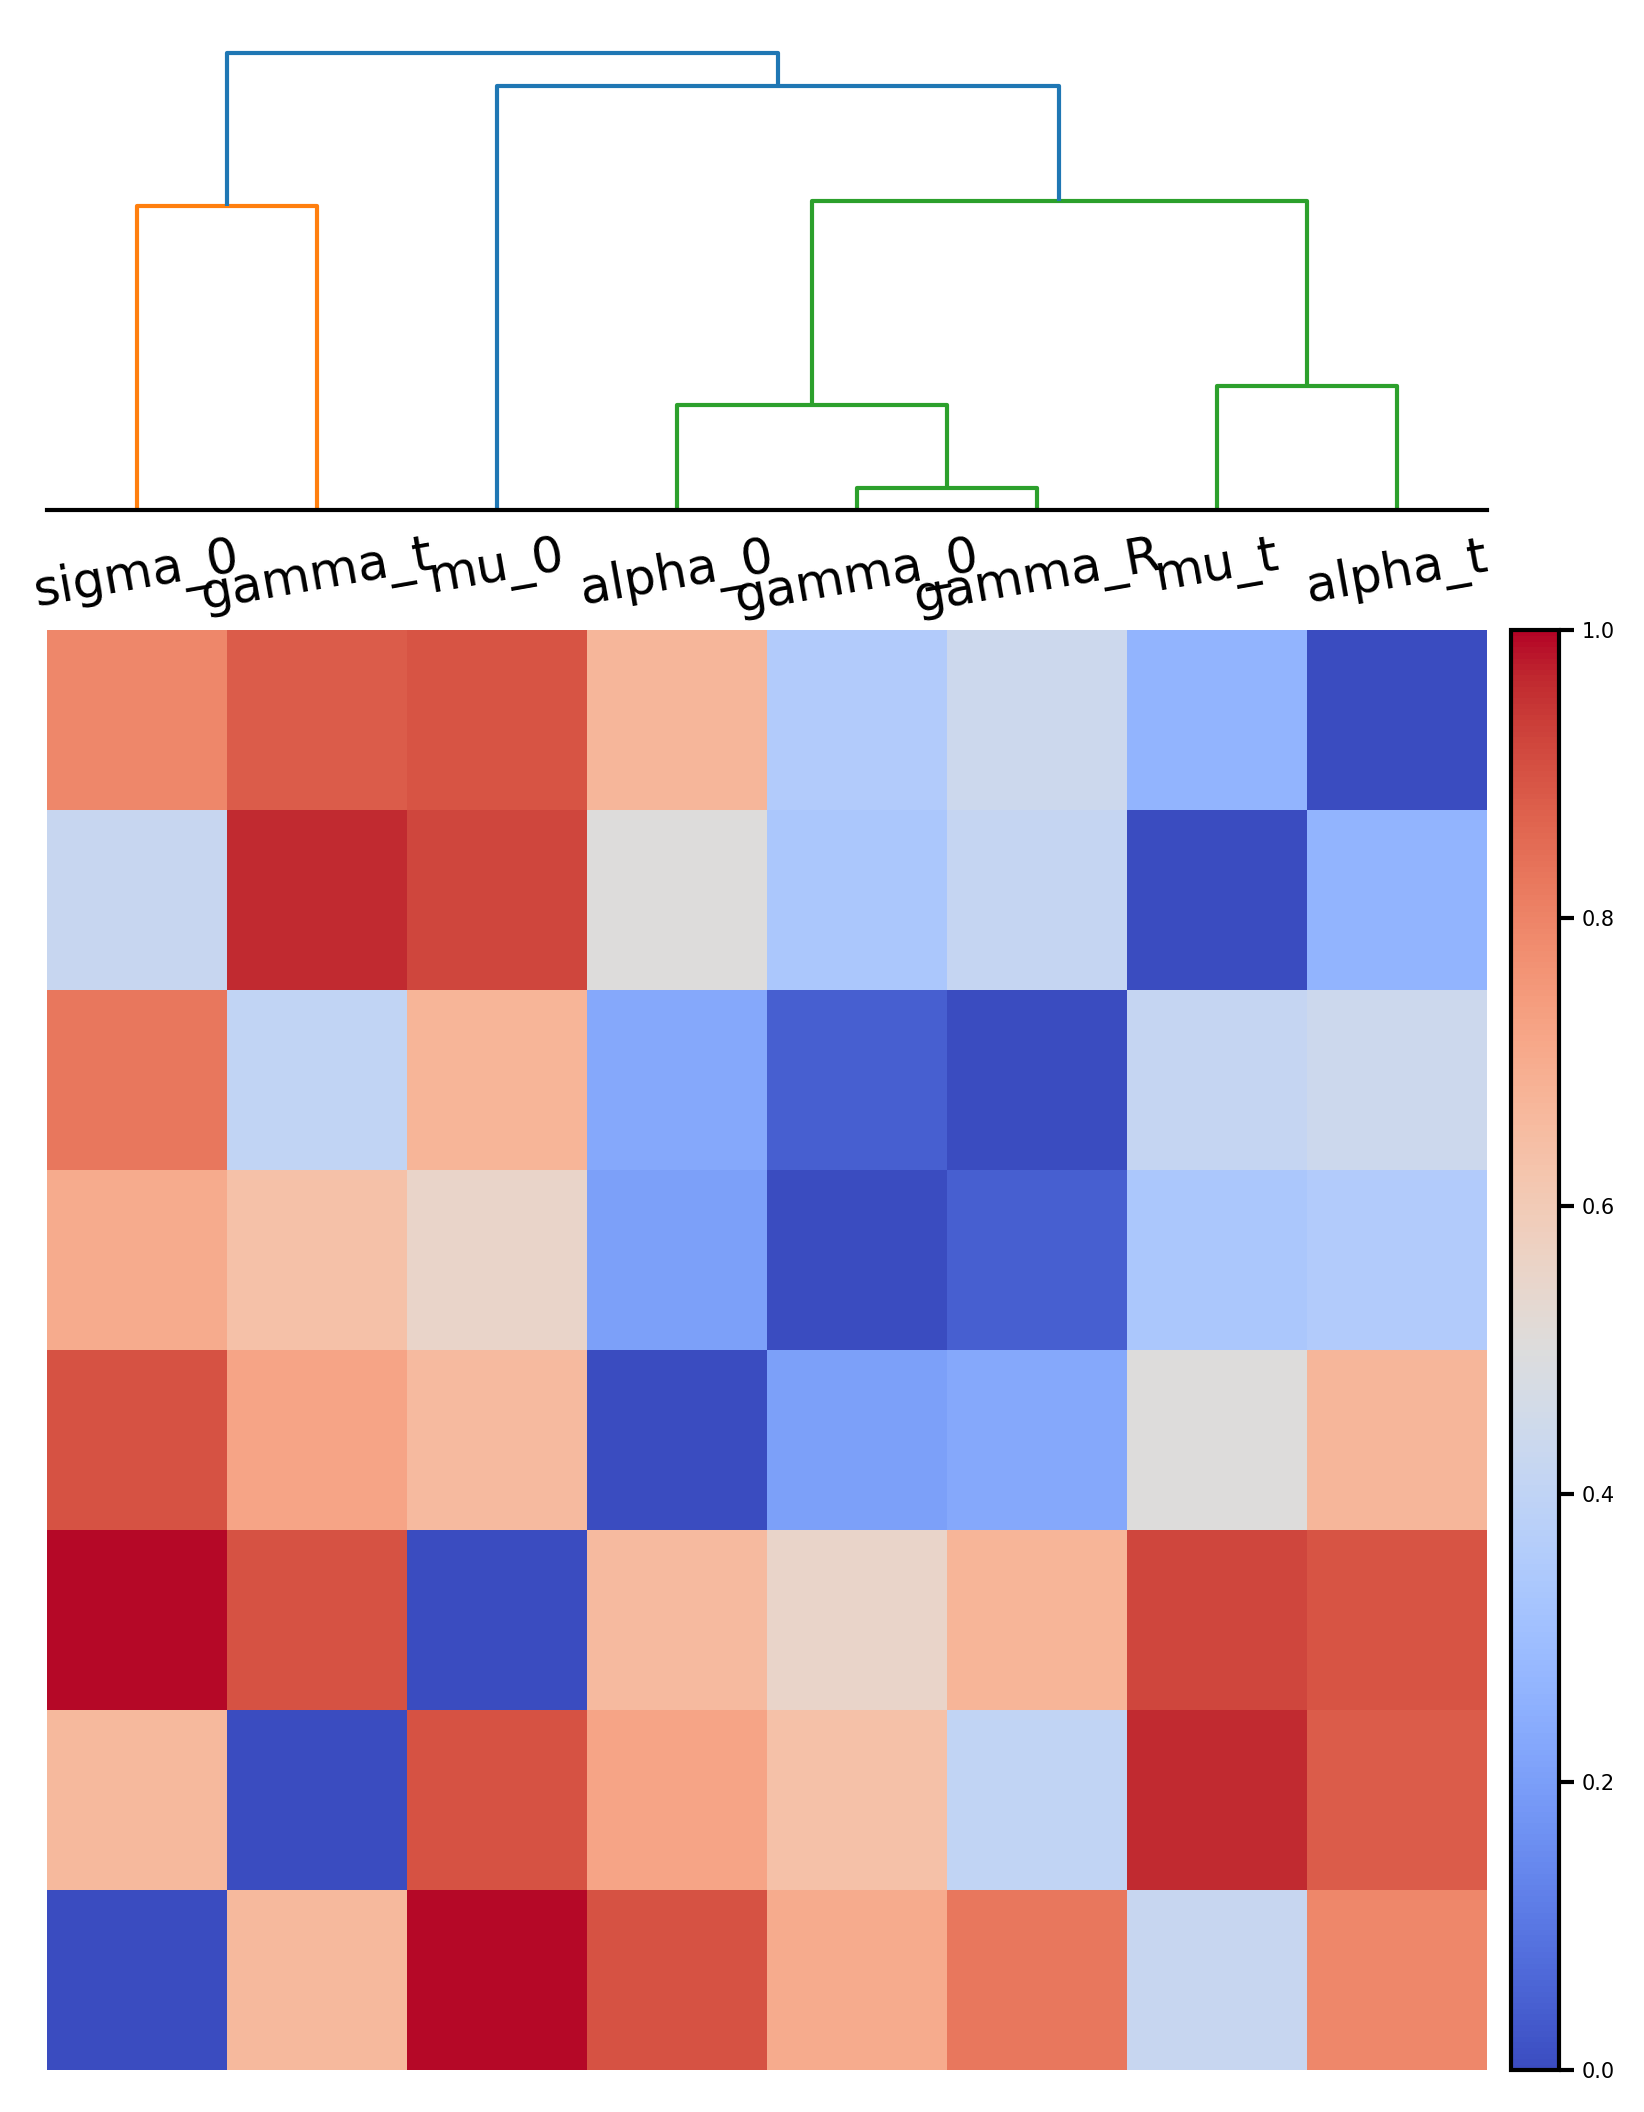

In [24]:

from scipy.spatial.distance import squareform
# Compute and plot first dendrogram.
fig = plt.figure(figsize=(8, 8))


# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3, 0.75, 0.6, 0.2])
correlations = df.corr()

dissimilarity = 1 - abs(correlations)
Y = linkage(squareform(dissimilarity), 'complete')




Z2 = dendrogram(Y, labels=df.columns, orientation='top', leaf_rotation=10)
# ax2.set_xticks([])
# ax2.spines['bottom'].set_visible(False)
ax2.set_yticks([])
ax2.spines['left'].set_visible(False)

# Plot distance matrix.
axmatrix = fig.add_axes([0.3, 0.1, 0.6, 0.6])
dissimilarity = dissimilarity.to_numpy()
dissimilarity = dissimilarity[Z2['leaves'], :]
dissimilarity = dissimilarity[:, Z2['leaves']]
im = axmatrix.matshow(dissimilarity, aspect='auto', origin='lower', cmap='coolwarm', vmin=0, vmax=1)


axmatrix.set_xticks([])
axmatrix.spines['bottom'].set_visible(False)
axmatrix.set_yticks([])
axmatrix.spines['left'].set_visible(False)

# Plot colorbar.
axcolor = fig.add_axes([0.91, 0.1, 0.02, 0.6])
plt.colorbar(im, cax=axcolor)
plt.show()


# plt.savefig('/home/david/Desktop/code/Figures/dissimilarity_matrix.png', dpi=300, transparent=True, background='auto')

# PCA

             PC0       PC1       PC2       PC3       PC4       PC5       PC6  \
RatF00 -0.401950 -0.318333 -0.450117 -0.109322 -0.023067 -0.008672 -0.031237   
RatF01 -0.223829  0.151884  0.244386 -0.017214  0.298974 -0.233908 -0.002743   
RatF02 -0.342971 -0.206994  0.095172 -0.572099 -0.355906  0.173750  0.023939   
RatM00  0.307304 -0.159616  0.200012 -0.119653 -0.310781 -0.640372 -0.347234   
RatM01  0.192327  0.041752  0.313036 -0.075420  0.195373  0.335355 -0.556299   
RatM02  0.102385  0.632816  0.131552 -0.103723 -0.292676  0.259233  0.232725   
RatF32 -0.200883 -0.004985  0.217804  0.410623 -0.403899  0.088118  0.209654   
RatF33 -0.299421  0.163695  0.097739 -0.057834  0.546731 -0.003435 -0.056094   
RatM31  0.502057 -0.140805 -0.396113 -0.213341  0.112888  0.341591  0.048215   
RatM32 -0.000997  0.454777 -0.588669  0.184720 -0.092377 -0.256142 -0.209963   
RatF42  0.010882 -0.328715  0.024825  0.605121 -0.056528  0.279032 -0.177533   
RatM40 -0.026862 -0.105311 -0.000374  0.

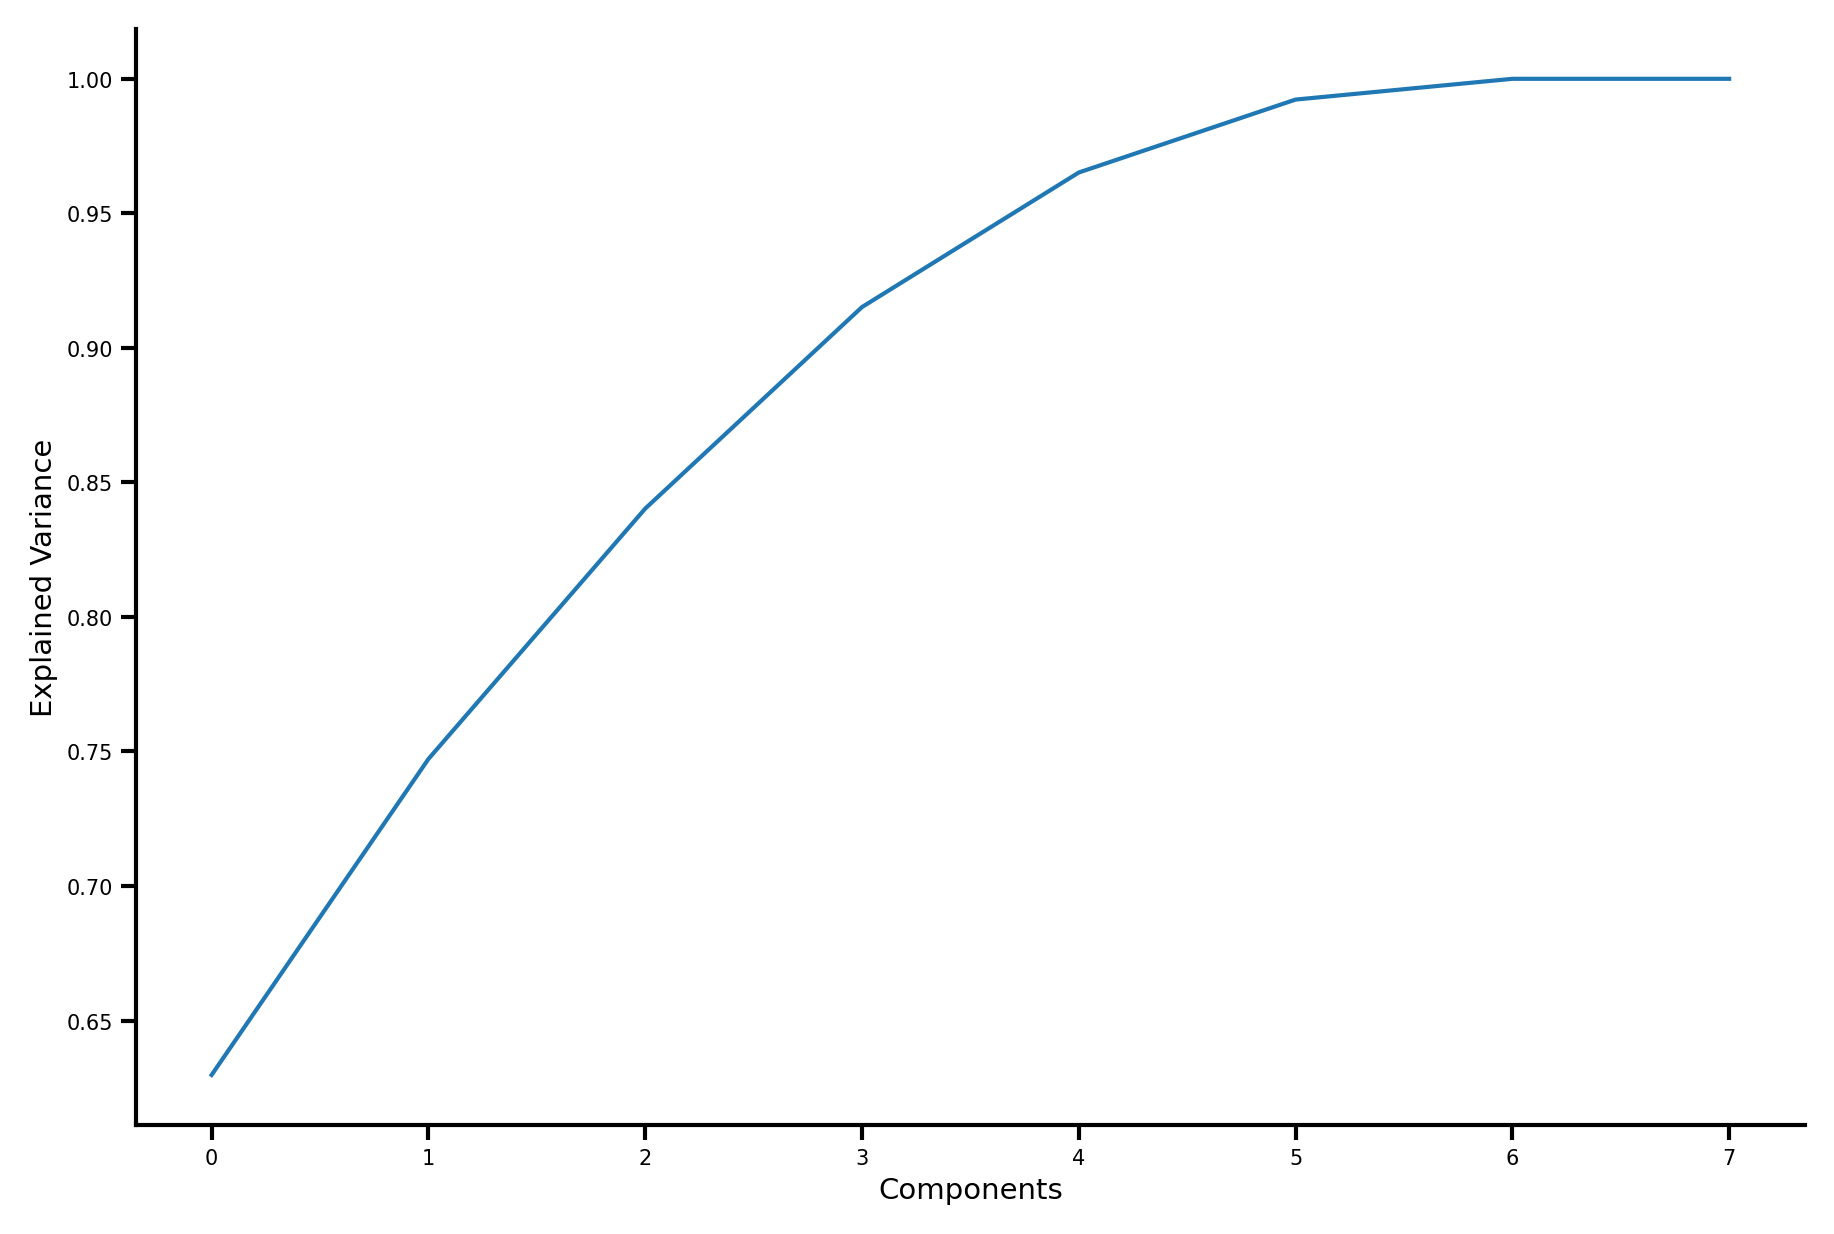

In [25]:
from sklearn.decomposition import PCA

df_normalized = df.T
pca = PCA(n_components=df_normalized.shape[0])
pca.fit(df_normalized)

# Reformat and view results
loadings = pd.DataFrame(pca.components_.T,
                            columns=['PC%s' % _ for _ in range(len(df_normalized.T.columns))],
                            index=df_normalized.columns)
print(loadings)
print(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()

Text(0, 0.5, 'PC1 (0.12)')

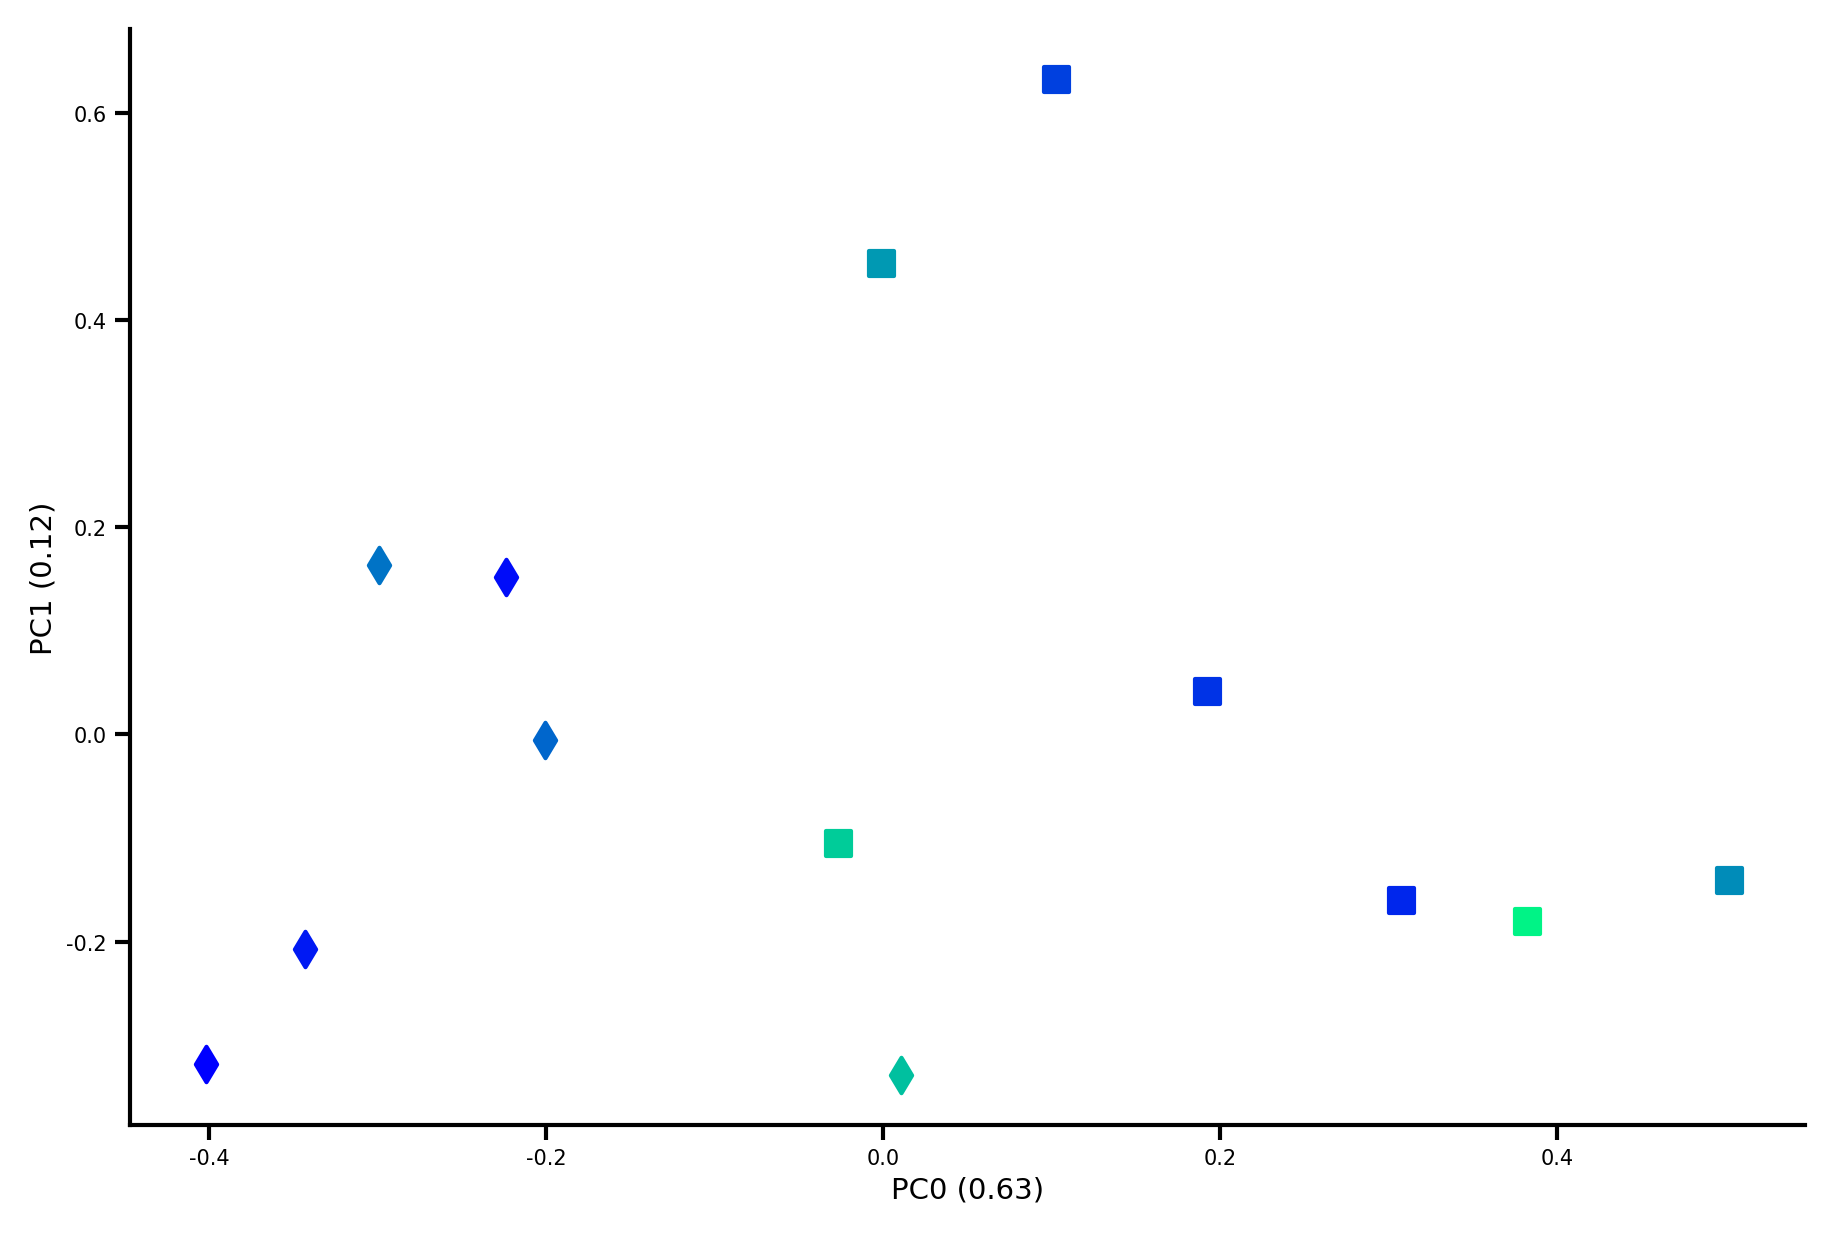

In [26]:
fig, ax = plt.subplots()
for animal in intact:
    ax.scatter(loadings.PC0[animal], loadings.PC1[animal], color=rat_markers[animal][0], marker=rat_markers[animal][1])

ax.set_xlabel(f'PC0 ({pca.explained_variance_ratio_[0]:.2f})')
ax.set_ylabel(f'PC1 ({pca.explained_variance_ratio_[1]:.2f})')

# PCA parameters

              PC0       PC1       PC2       PC3       PC4       PC5       PC6  \
mu_0     0.173129  0.400602  0.666727  0.545470 -0.076241  0.219961  0.067716   
mu_t    -0.409704  0.489615 -0.068088  0.090291  0.015708 -0.692122  0.315109   
sigma_0 -0.124702  0.408760 -0.437744  0.308979  0.507310  0.247288 -0.458642   
alpha_0  0.441292  0.330888  0.087636 -0.503141  0.529717  0.085995  0.382285   
alpha_t -0.375405  0.406189  0.269124 -0.578508 -0.293340  0.224443 -0.379245   
gamma_0  0.470181  0.111027  0.045111  0.016989 -0.109857 -0.389869 -0.335032   
gamma_t  0.123943  0.319642 -0.483018  0.077790 -0.507915  0.382927  0.428436   
gamma_R -0.463162 -0.209132  0.209212  0.068412  0.316042  0.234589  0.316221   

              PC7  
mu_0     0.093274  
mu_t     0.032536  
sigma_0 -0.037548  
alpha_0  0.028391  
alpha_t -0.082052  
gamma_0 -0.698546  
gamma_t -0.234397  
gamma_R -0.662106  


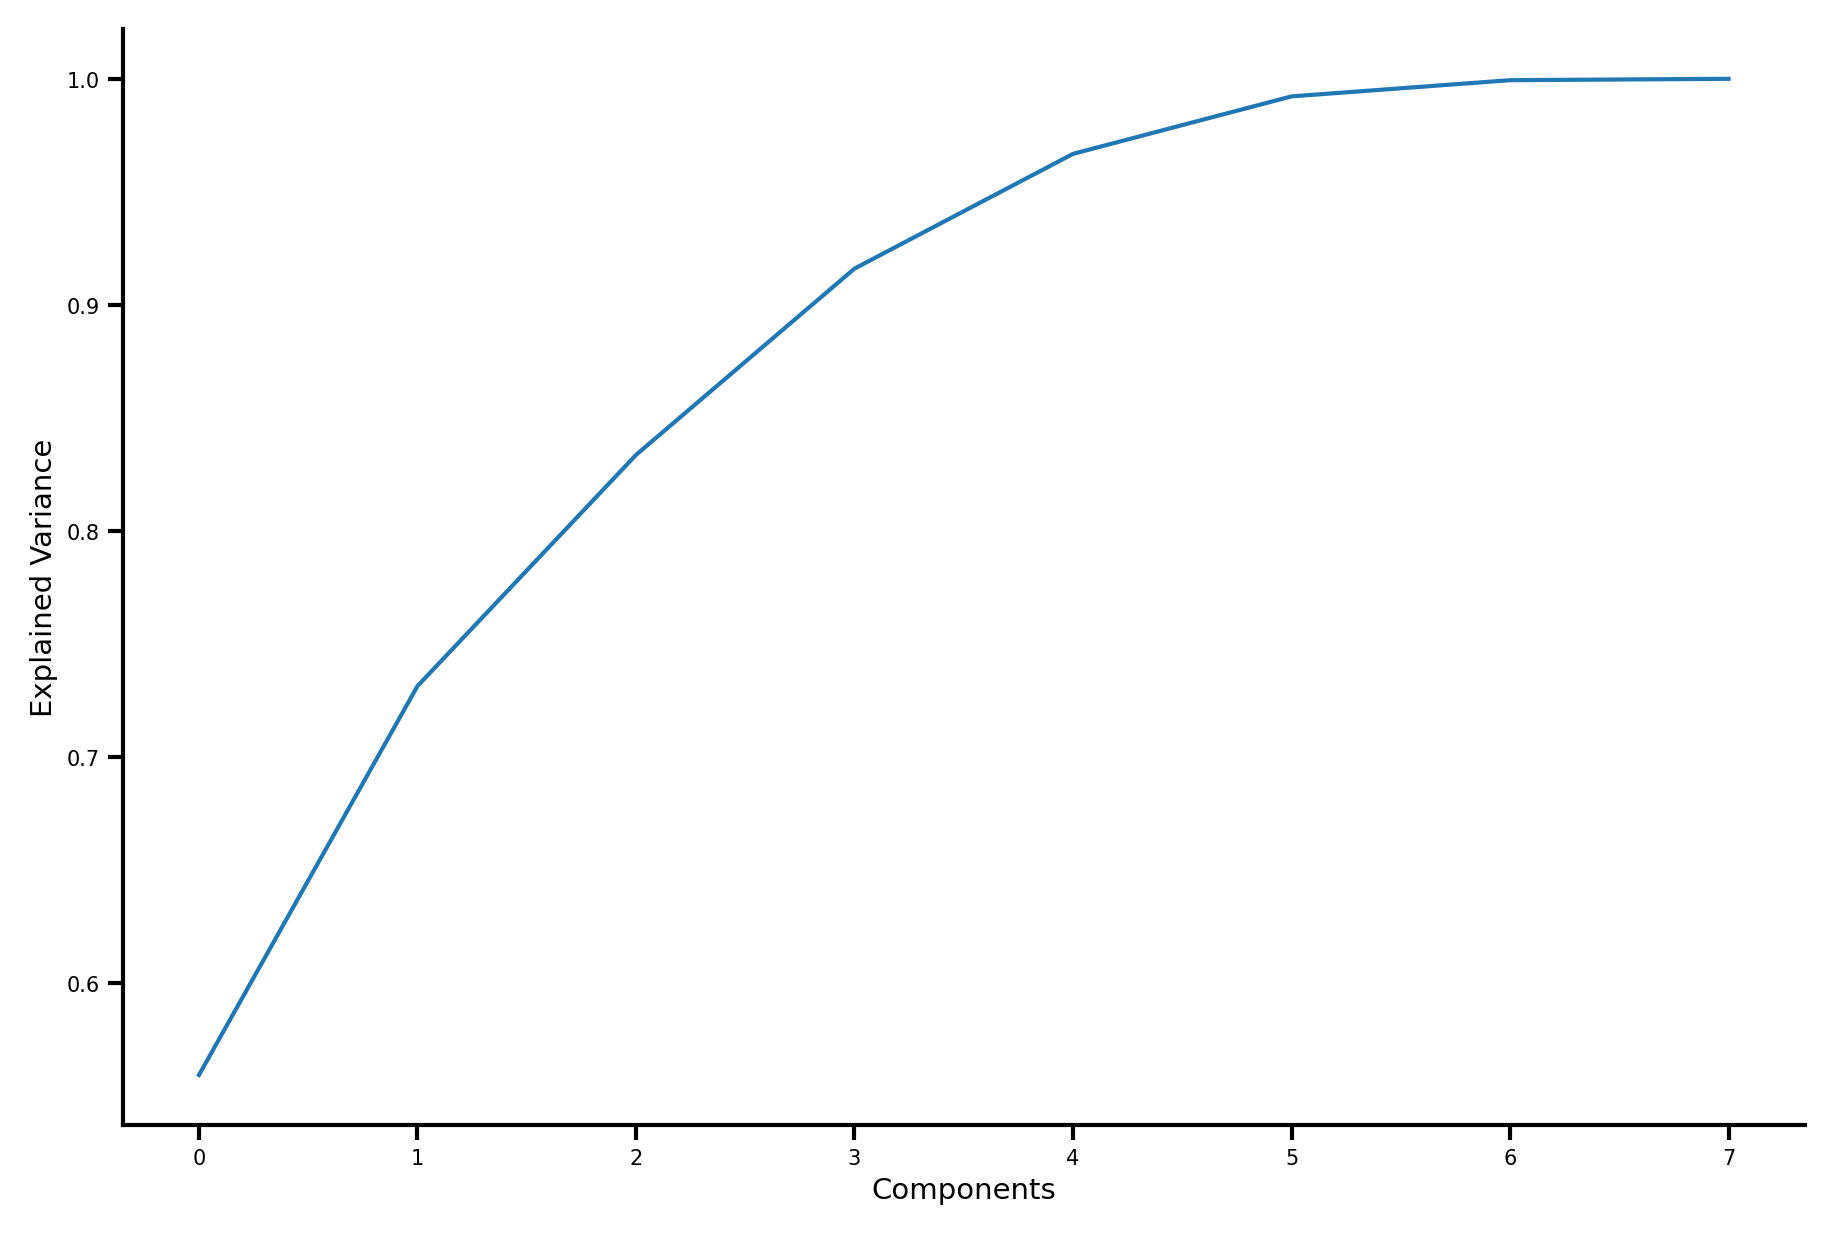

In [27]:

df_normalized = df
pca = PCA(n_components=df.shape[1])
pca.fit(df_normalized)

# Reformat and view results
loadings = pd.DataFrame(pca.components_.T,
                            columns=['PC%s' % _ for _ in range(len(df_normalized.columns))],
                            index=df.columns)
print(loadings)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()

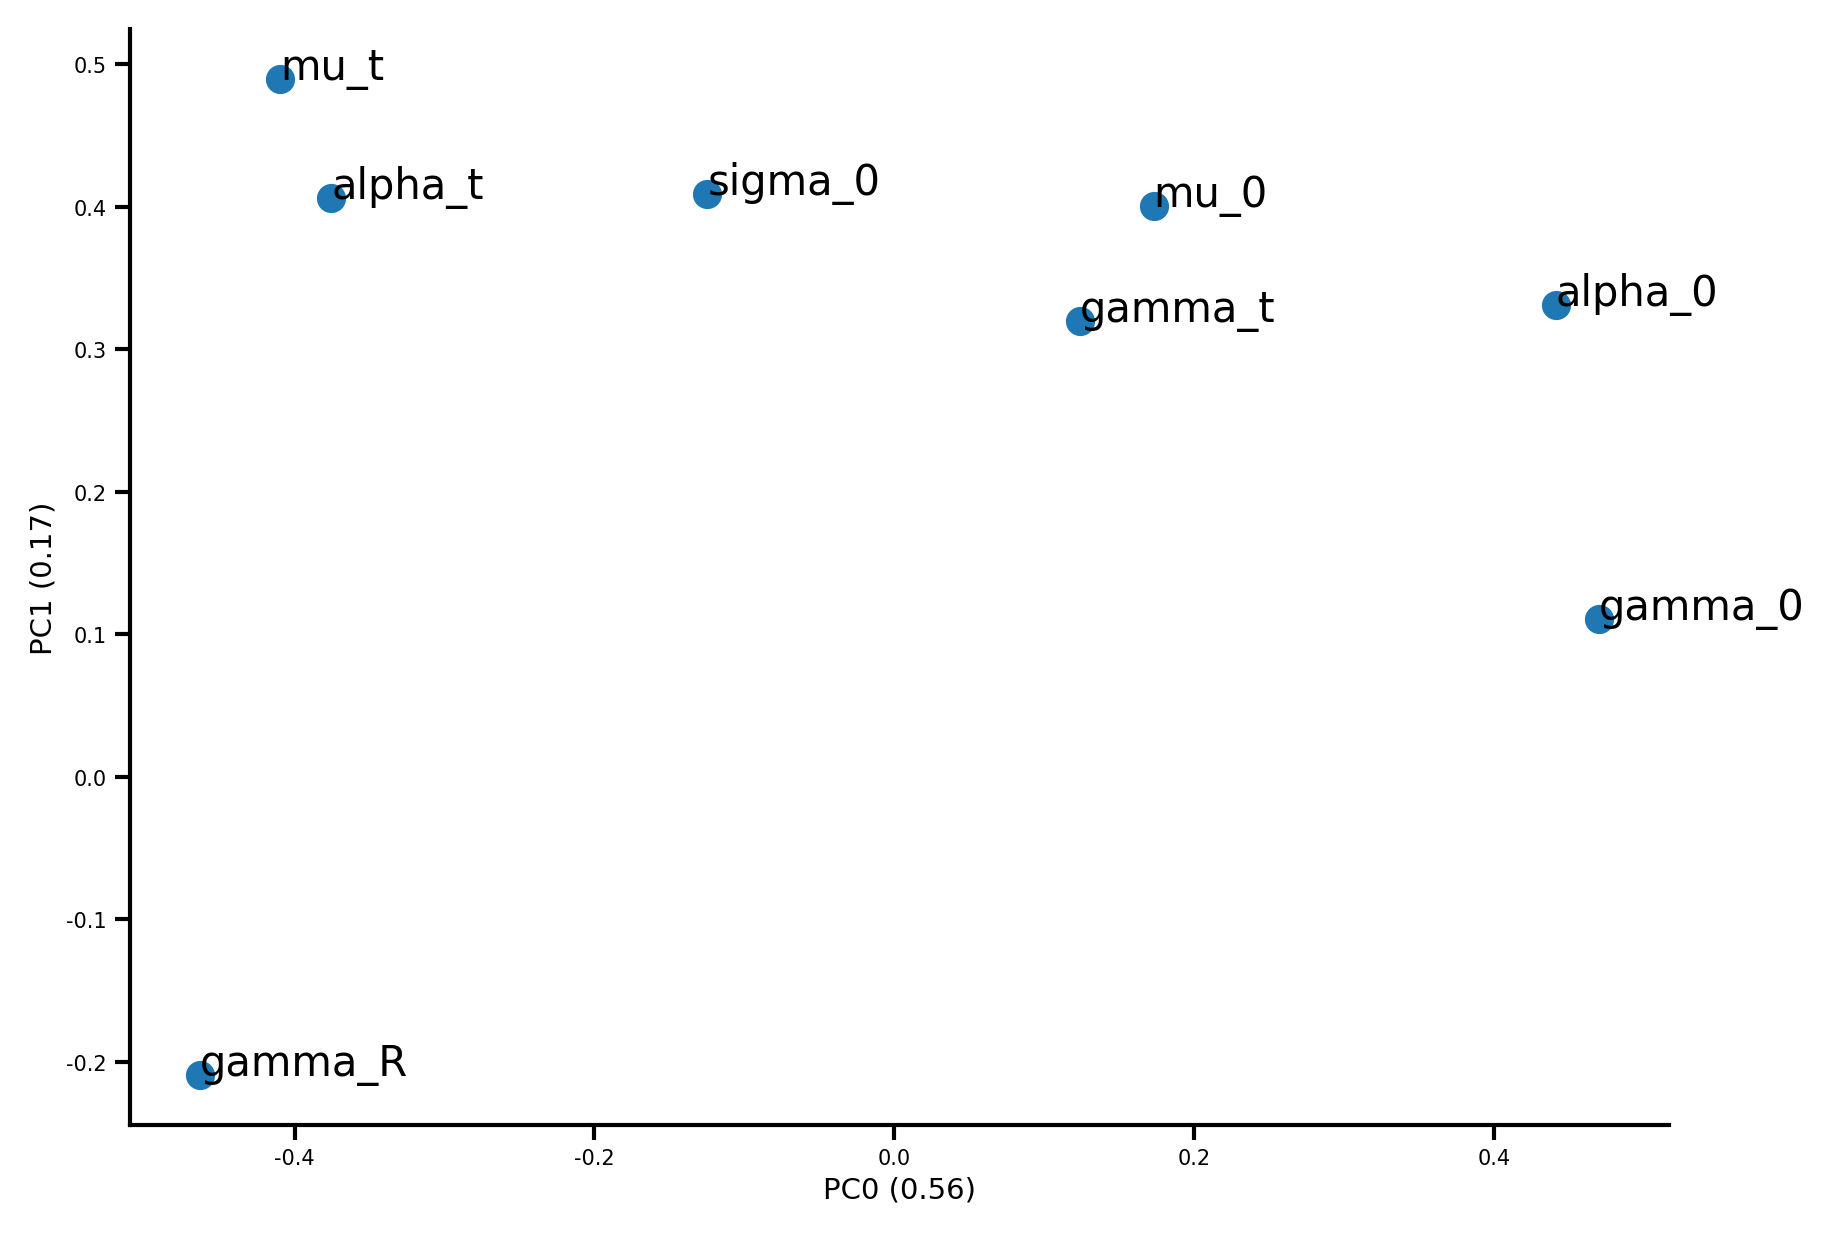

In [28]:
plt.scatter(loadings.PC0, loadings.PC1)
plt.xlabel(f'PC0 ({pca.explained_variance_ratio_[0]:.2f})')
plt.ylabel(f'PC1 ({pca.explained_variance_ratio_[1]:.2f})')
for i, txt in enumerate(loadings.index):
    plt.annotate(txt, (loadings.PC0[i], loadings.PC1[i]))
plt.show()

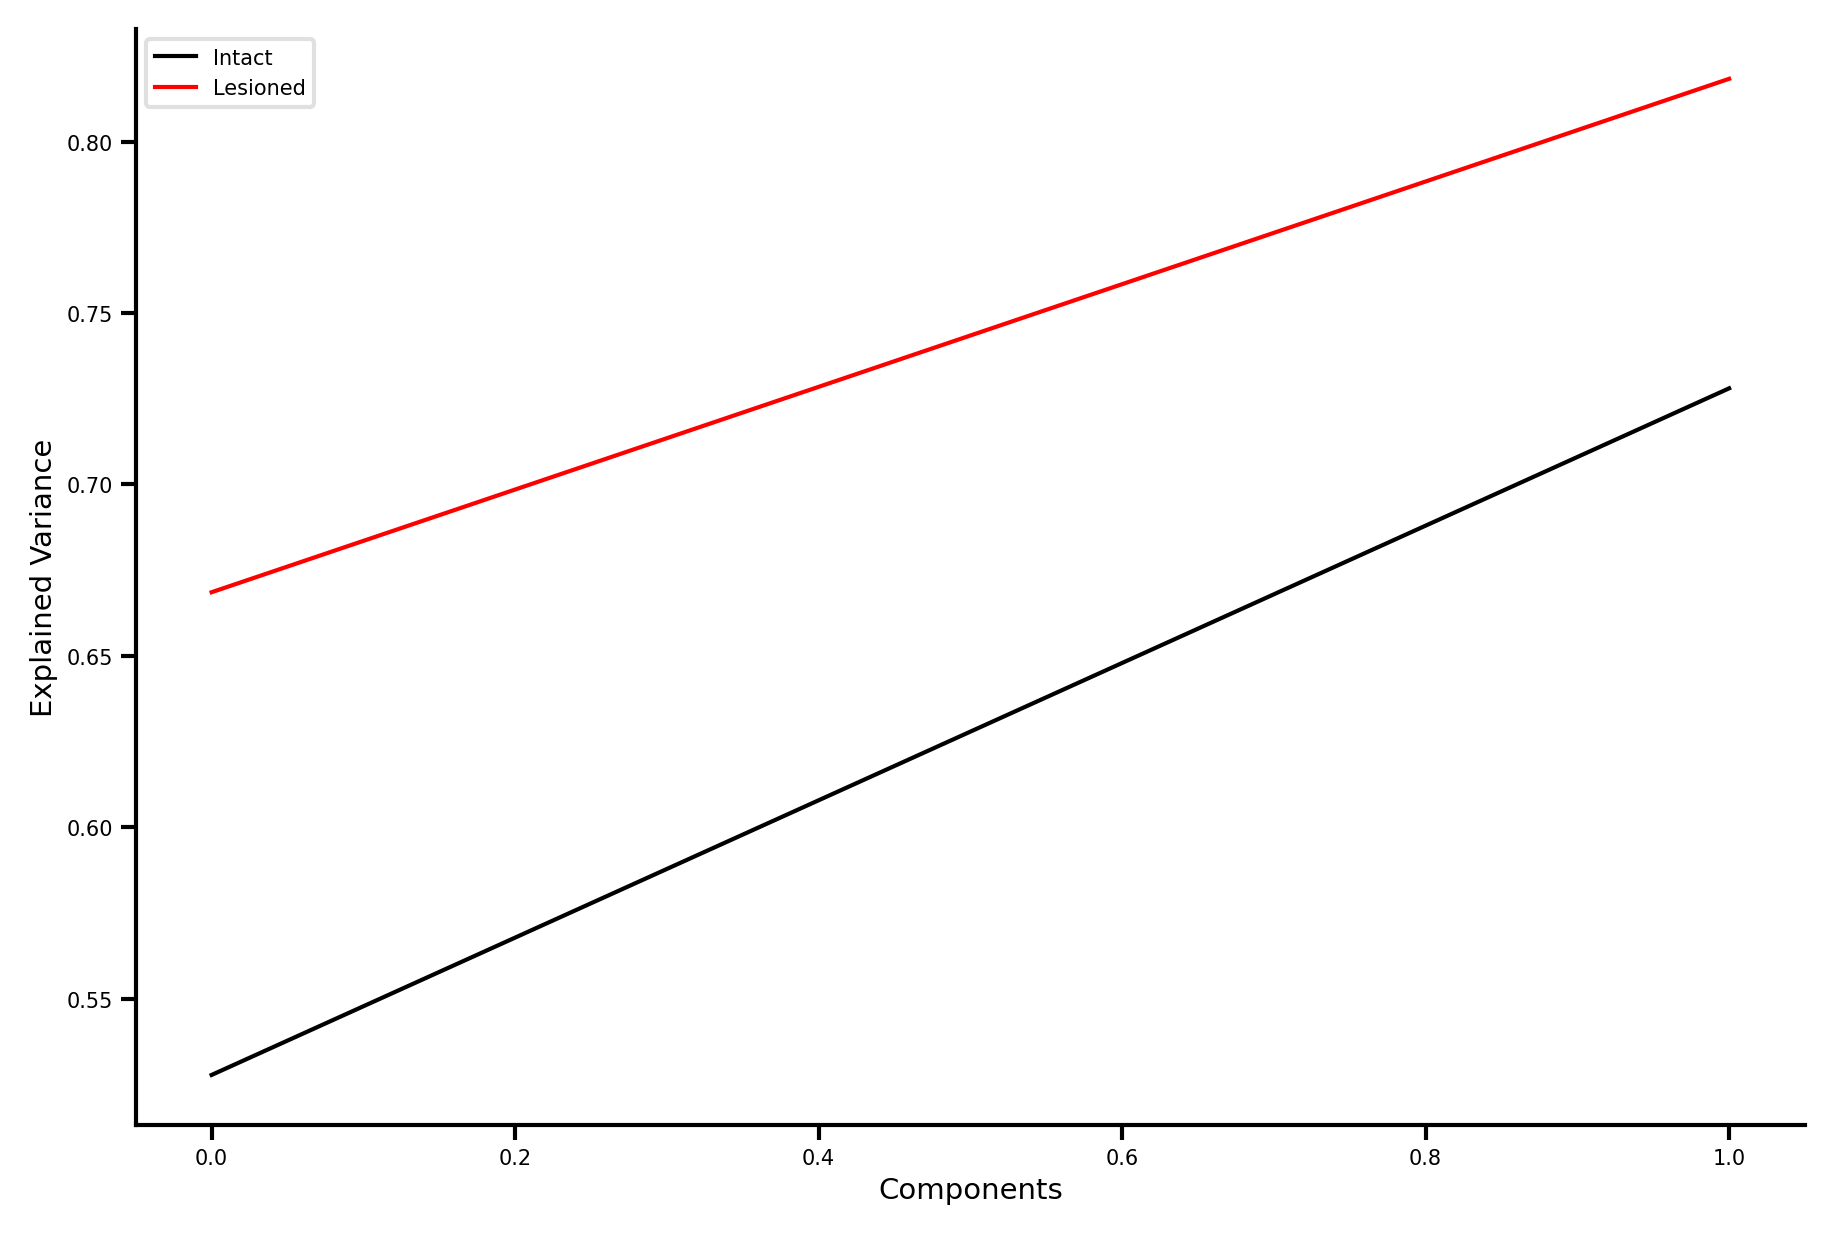

In [29]:
# PCA PARAMETERS
all_traits = { key:traitsRUN.get(key,[])+traitsIDLE.get(key,[]) for key in set(list(traitsRUN.keys())+list(traitsIDLE.keys())) }

N = 2
df_normalized_intact = pd.DataFrame(all_traits, columns=intact, index=ylabelsRUN+ylabelsIDLE).T
# pca_intact = PCA(n_components=df_normalized_intact.shape[1])
pca_intact = PCA(n_components=N)
pca_intact.fit(df_normalized_intact)

loadings_intact = pd.DataFrame(pca_intact.components_.T,
                            columns=['PC%s' % _ for _ in range(N)],
                            index=df_normalized_intact.columns)


df_normalized_lesioned = pd.DataFrame(all_traits, columns=lesion, index=ylabelsRUN+ylabelsIDLE).T
pca_lesioned = PCA(n_components=N)
pca_lesioned.fit(df_normalized_lesioned)

loadings_lesioned = pd.DataFrame(pca_lesioned.components_.T,
                            columns=['PC%s' % _ for _ in range(N)],
                            index=df_normalized_lesioned.columns)


plt.plot(np.cumsum(pca_intact.explained_variance_ratio_), color='k', label='Intact')
plt.plot(np.cumsum(pca_lesioned.explained_variance_ratio_), color='r', label='Lesioned')
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.legend()
plt.show()

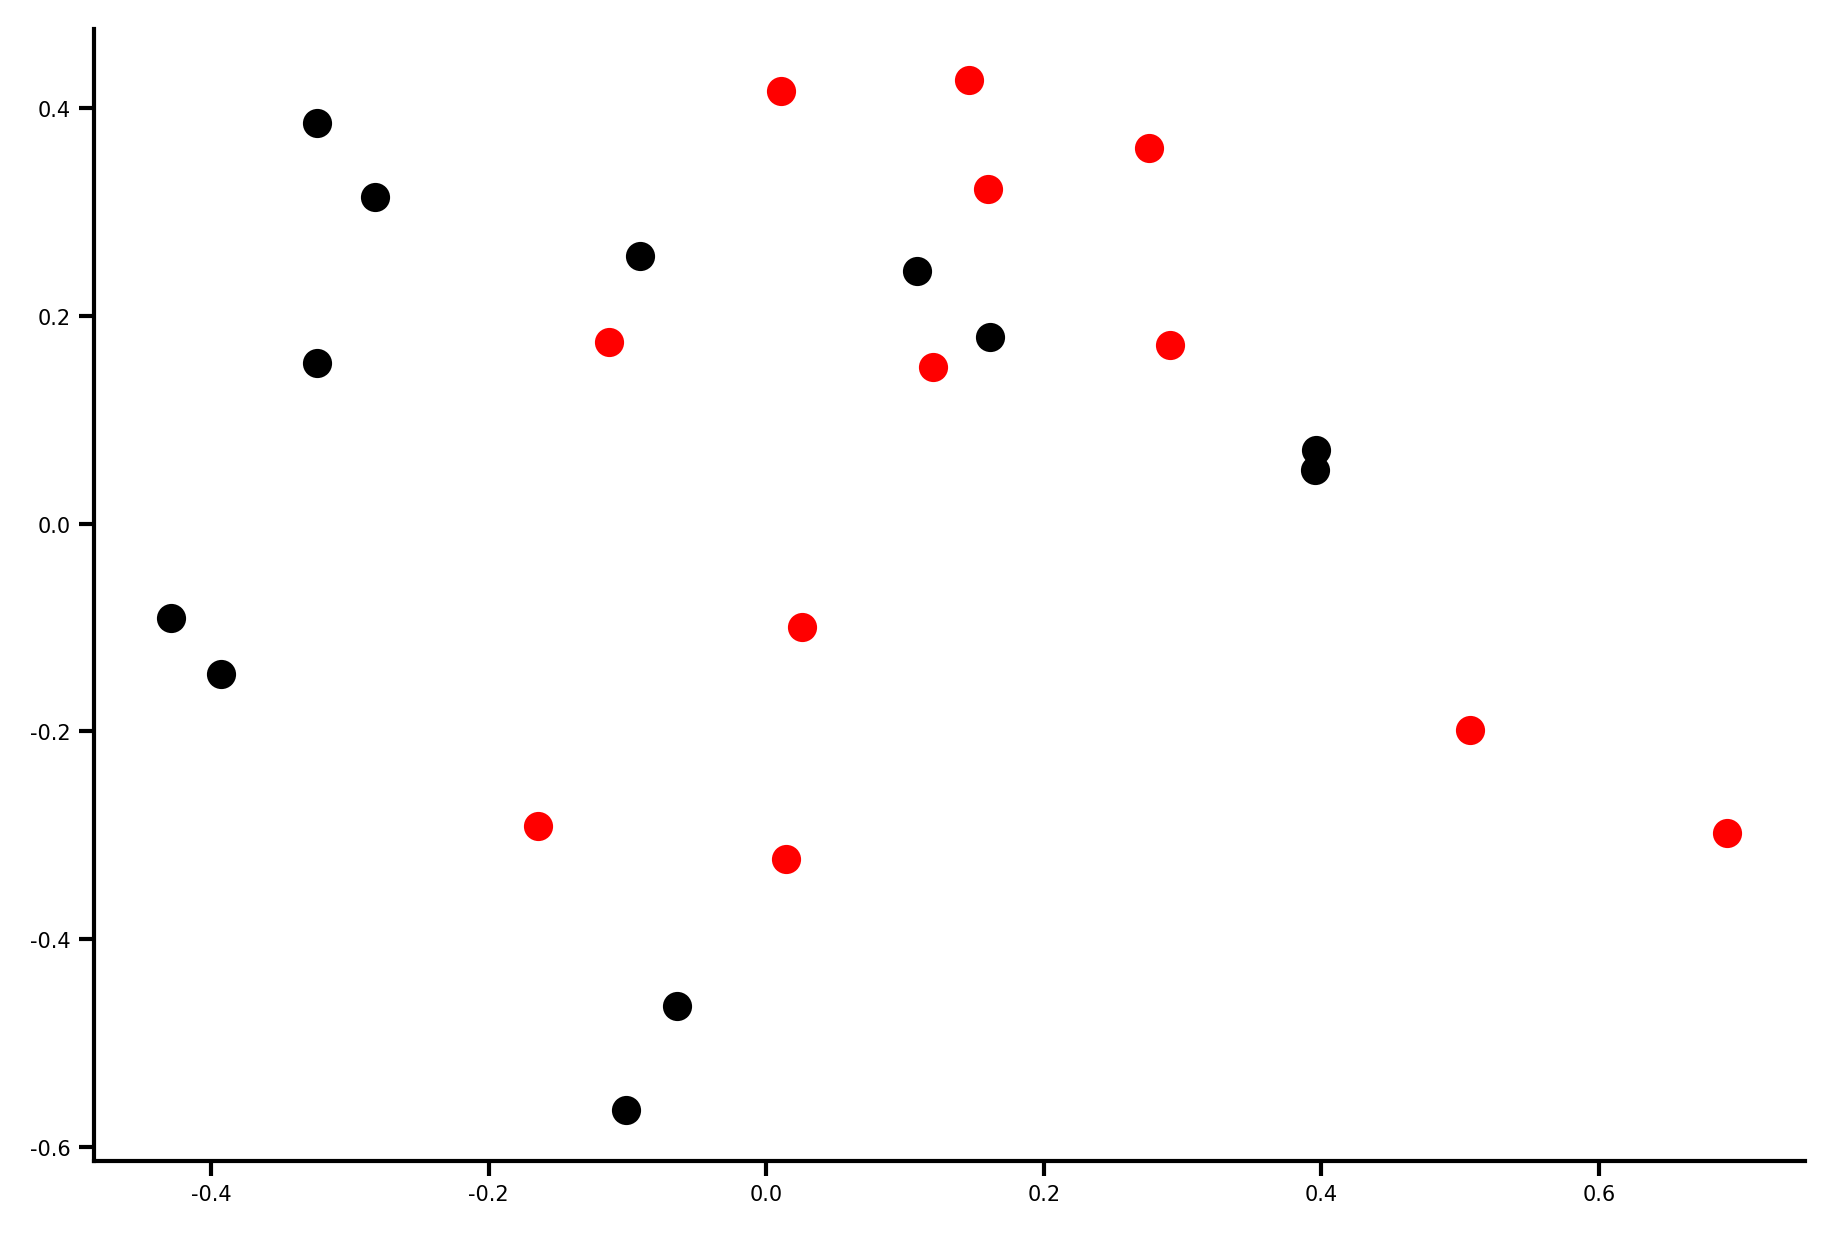

In [30]:
plt.scatter(loadings_intact.PC0, loadings_intact.PC1, color='k', label='Intact')
plt.scatter(loadings_lesioned.PC0, loadings_lesioned.PC1, color='r', label='Lesioned')
# plt.xlabel(f'PC0 ({pca.explained_variance_ratio_[0]:.2f})')
# plt.ylabel(f'PC1 ({pca.explained_variance_ratio_[1]:.2f})')
# for i, txt in enumerate(loadings.index):
#     plt.annotate(txt, (loadings.PC0[i], loadings.PC1[i]))
# plt.show()

In [31]:
loadings_intact.PC0

$\mu_0$       0.161588
$\mu_t$      -0.323463
$\mu_R$      -0.100628
$\sigma_0$   -0.091040
$\sigma_t$   -0.323704
$\sigma_R$   -0.064590
$\alpha_0$    0.395869
$\alpha_t$   -0.281676
$\alpha_R$   -0.428474
$\gamma_0$    0.395093
$\gamma_t$    0.108633
$\gamma_R$   -0.392871
Name: PC0, dtype: float64

# test no trait

In [32]:

alpha_0, alpha_t, alpha_R, gamma_0, gamma_t, gamma_R, mu_0, mu_t, mu_R, sigma_0, sigma_t, sigma_R = pickle.load(open("picklejar/intact_lesionFITS.p", "rb"))

vars = [alpha_0, alpha_t, alpha_R, gamma_0, gamma_t, gamma_R, mu_0, mu_t, mu_R, sigma_0, sigma_t, sigma_R]
names = ["alpha_0", "alpha_t", "alpha_R", "gamma_0", "gamma_t", "gamma_R", "mu_0", "mu_t", "mu_R", "sigma_0", "sigma_t", "sigma_R"]


df = pd.DataFrame()
for animal in animalList:
    for cond in ["60", "90", "120", "20", "10", "2", "rev10", "rev20"]:
        df = df.append({"animal": animal, 
                        # "cond": cond, 
                        "alpha_0": alpha_0[animal][cond],
                        "alpha_t": alpha_t[animal][cond],
                        "alpha_R": alpha_R[animal][cond],
                        "gamma_0": gamma_0[animal][cond],
                        "gamma_t": gamma_t[animal][cond],
                        "gamma_R": gamma_R[animal][cond],
                        "mu_0": mu_0[animal][cond],
                        "mu_t": mu_t[animal][cond],
                        "mu_R": mu_R[animal][cond],
                        "sigma_0": sigma_0[animal][cond],
                        "sigma_t": sigma_t[animal][cond],
                        "sigma_R": sigma_R[animal][cond]},
                        ignore_index=True)

df = df.drop(columns = [ 'sigma_t','sigma_R', 'mu_R', 'alpha_R',])
df


animal   alpha_0   alpha_t   gamma_0   gamma_t   gamma_R      mu_0  \
0    RatF00  0.590131  0.214440  0.163808 -0.014932 -0.027148  0.878290   
1    RatF00  0.630635  0.181100  0.430696 -0.040411 -0.087680  1.148026   
2    RatF00  0.736433  0.191270  0.435160 -0.035057 -0.076169  1.367477   
3    RatF00  0.912520  0.119683  0.616348 -0.069808 -0.102323  1.293160   
4    RatF00  0.847913  0.214379  0.565050 -0.080291 -0.068270  1.358646   
..      ...       ...       ...       ...       ...       ...       ...   
155  RatM43  1.631656  0.077770  1.078345 -0.072537 -0.253514  1.363545   
156  RatM43  1.479527  0.082285  0.921923 -0.077935 -0.191552  1.371459   
157  RatM43  1.358830  0.111508  0.927910 -0.073223 -0.200492  1.370147   
158  RatM43  1.569390  0.106503  0.942516 -0.044577 -0.234765  1.483496   
159  RatM43  1.772726  0.081354  1.080630 -0.052697 -0.260425  1.538566   

         mu_t   sigma_0  
0    0.057873  0.103182  
1    0.082715  0.097087  
2    0.090223  0.110631  
3    0.111246  0.111064  
4    0.099139  0.135151  
..        ...       ...  
155  0.020367  0.075073  
156  0.037015  0.069012  
157  0.040588  0.078576  
158  0.037329  0.095750  
159  0.037792  0.111496  

[160 rows x 9 columns]

In [33]:
from sklearn.preprocessing import StandardScaler
features = ["alpha_0", "alpha_t", "alpha_R", "gamma_0", "gamma_t", "gamma_R", "mu_0", "mu_t", "mu_R", "sigma_0", "sigma_t", "sigma_R"]
features = ["alpha_0", "alpha_t", "gamma_0", "gamma_t", "gamma_R", "mu_0", "mu_t", "sigma_0"]

# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['animal']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2'])

In [35]:
finalDf = pd.concat([principalDf, df[['animal']]], axis = 1)

In [36]:
finalDf

principal component 1  principal component 2  animal
0                -3.183898              -1.764372  RatF00
1                -2.492663              -0.835192  RatF00
2                -2.627366               0.057111  RatF00
3                -1.995843               0.402115  RatF00
4                -2.678081               0.693040  RatF00
..                     ...                    ...     ...
155               2.076484              -0.190733  RatM43
156               1.043539              -0.279991  RatM43
157               0.774970              -0.218735  RatM43
158               1.247374               0.463986  RatM43
159               1.879311               1.116509  RatM43

[160 rows x 3 columns]

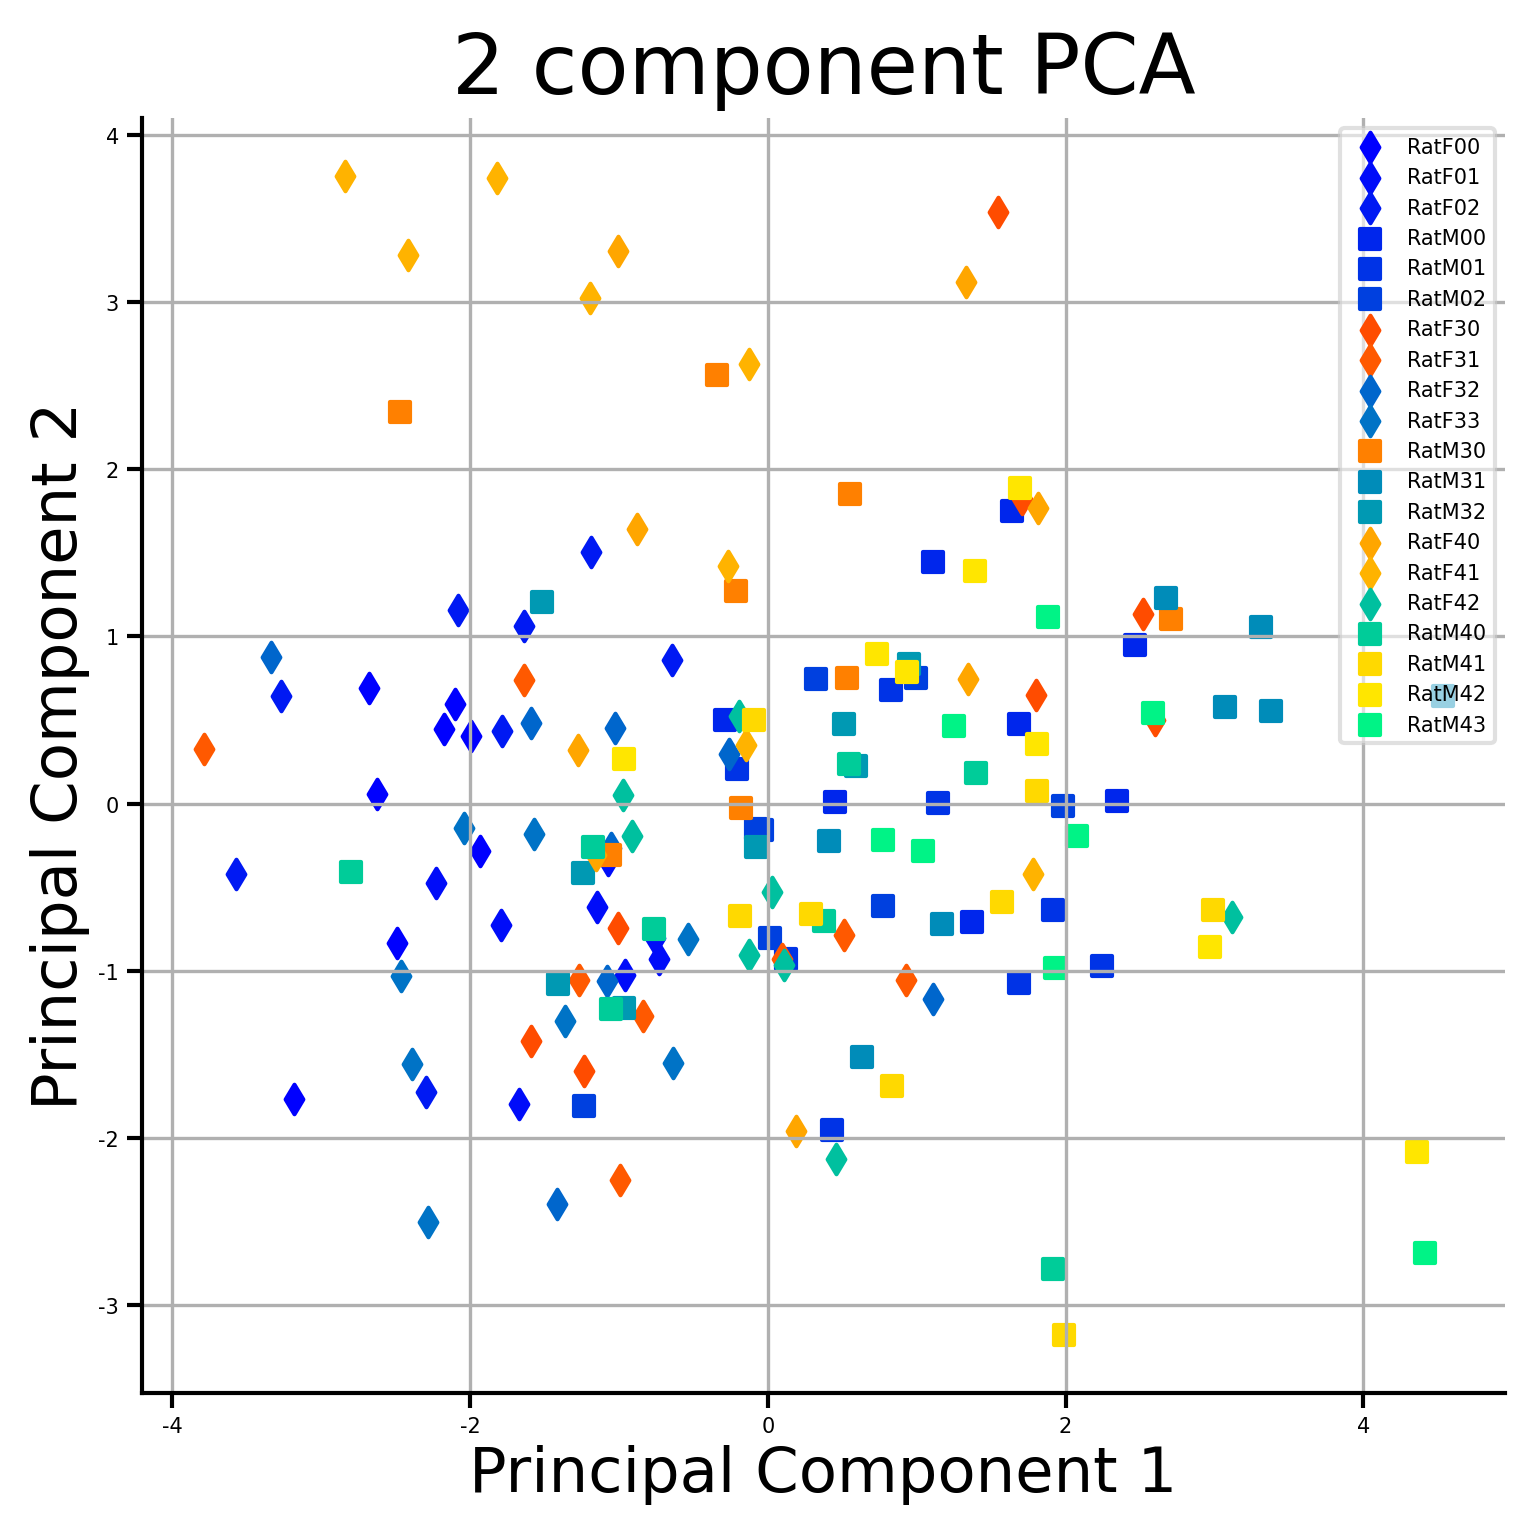

In [37]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = animalList
colors = plt.cm.rainbow(np.linspace(0, 1, len(targets)))
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['animal'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
            , color = rat_markers[target][0], marker = rat_markers[target][1]
               , s = 25)
ax.legend(targets)
ax.grid()

In [40]:
all_traits = { key:traitsRUN.get(key,[])+traitsIDLE.get(key,[]) for key in set(list(traitsRUN.keys())+list(traitsIDLE.keys())) }
indices = ['mu_0', 'mu_t', 'mu_R', 'sigma_0', 'sigma_t', 'sigma_R', 'alpha_0', 'alpha_t', 'alpha_R', 'gamma_0', 'gamma_t', 'gamma_R']
df = pd.DataFrame(all_traits, columns=animalList, index=indices).T


'remove the traits that are not in the figure'
df = df.drop(columns = [ 'sigma_t','sigma_R', 'mu_R', 'alpha_R',])


features = ["alpha_0", "alpha_t", "gamma_0", "gamma_t", "gamma_R", "mu_0", "mu_t", "sigma_0"]

# Separating out the features
x = df.loc[:, features].values

df

mu_0      mu_t   sigma_0   alpha_0   alpha_t   gamma_0   gamma_t  \
RatF00 -0.194985  1.289294  1.005045 -1.536157  0.256408 -1.124285  0.259550   
RatF01 -0.300359  0.065846 -0.392920 -0.532380  0.970217 -0.675849 -0.085422   
RatF02  0.297565  2.151373  1.060804 -0.177016  1.673750 -0.562656  0.324636   
RatM00  0.637030 -0.468898  0.602340  1.770213  0.063794  0.525760  0.801078   
RatM01 -0.223730 -0.268046 -0.938948  0.685439 -0.185844  0.531768  0.190412   
RatM02  0.879926 -0.182877 -0.761152  0.576246  0.211393  0.467791 -1.150566   
RatF30  0.997430 -0.946683  0.650562  0.983988 -1.036213  0.211850 -1.005974   
RatF31 -0.460252  0.184048 -0.346704 -0.718667  0.220973 -0.246685 -0.361266   
RatF32 -0.888769  0.255257  0.351774  0.015553  0.225211 -0.589979 -0.847570   
RatF33 -0.460363  0.168644 -0.756600 -1.306486  0.759660 -0.846209 -0.131406   
RatM30  2.202810  0.432499  1.004150  1.055382 -0.831428 -0.170561 -0.362286   
RatM31  0.895374 -0.622519 -0.099680  0.681264 -1.479751  1.653984  0.738433   
RatM32  1.211098 -0.411732 -0.046863 -0.452633 -0.798659 -0.185834 -0.560169   
RatF40  2.253658  0.153570  1.819862  0.367826 -0.510231 -0.066265  0.455358   
RatF41  4.797548  0.318997  3.122591  0.129561 -0.887143 -0.635546  0.423619   
RatF42 -1.423501 -0.404379  0.062506 -0.088384 -1.104188 -0.134605 -0.190248   
RatM40 -0.414843 -0.445293  0.007734 -0.442043 -0.028955 -0.139411  0.133405   
RatM41 -0.535697 -0.628531 -0.988809  0.390581 -0.000989  0.628172  0.785759   
RatM42  0.884594 -0.269437  0.102584  0.786193 -0.577654  1.260341 -0.193302   
RatM43 -0.014442 -1.126671 -0.094040  0.806385 -0.563037  1.079527  0.517868   

         gamma_R  
RatF00  0.812557  
RatF01  0.700687  
RatF02  0.436068  
RatM00 -0.795479  
RatM01 -0.629510  
RatM02 -0.032863  
RatF30  0.253689  
RatF31  0.345517  
RatF32  0.814835  
RatF33  0.763046  
RatM30  0.302255  
RatM31 -1.593366  
RatM32  0.684196  
RatF40 -0.133641  
RatF41  0.596715  
RatF42  0.140543  
RatM40  0.003121  
RatM41 -0.809126  
RatM42 -1.192657  
RatM43 -1.303835

In [41]:
from sklearn.decomposition import PCA
aL = {"animal": animalList}

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, pd.DataFrame(aL)], axis = 1)

In [42]:
pca.explained_variance_ratio_

array([0.44806395, 0.33321137])

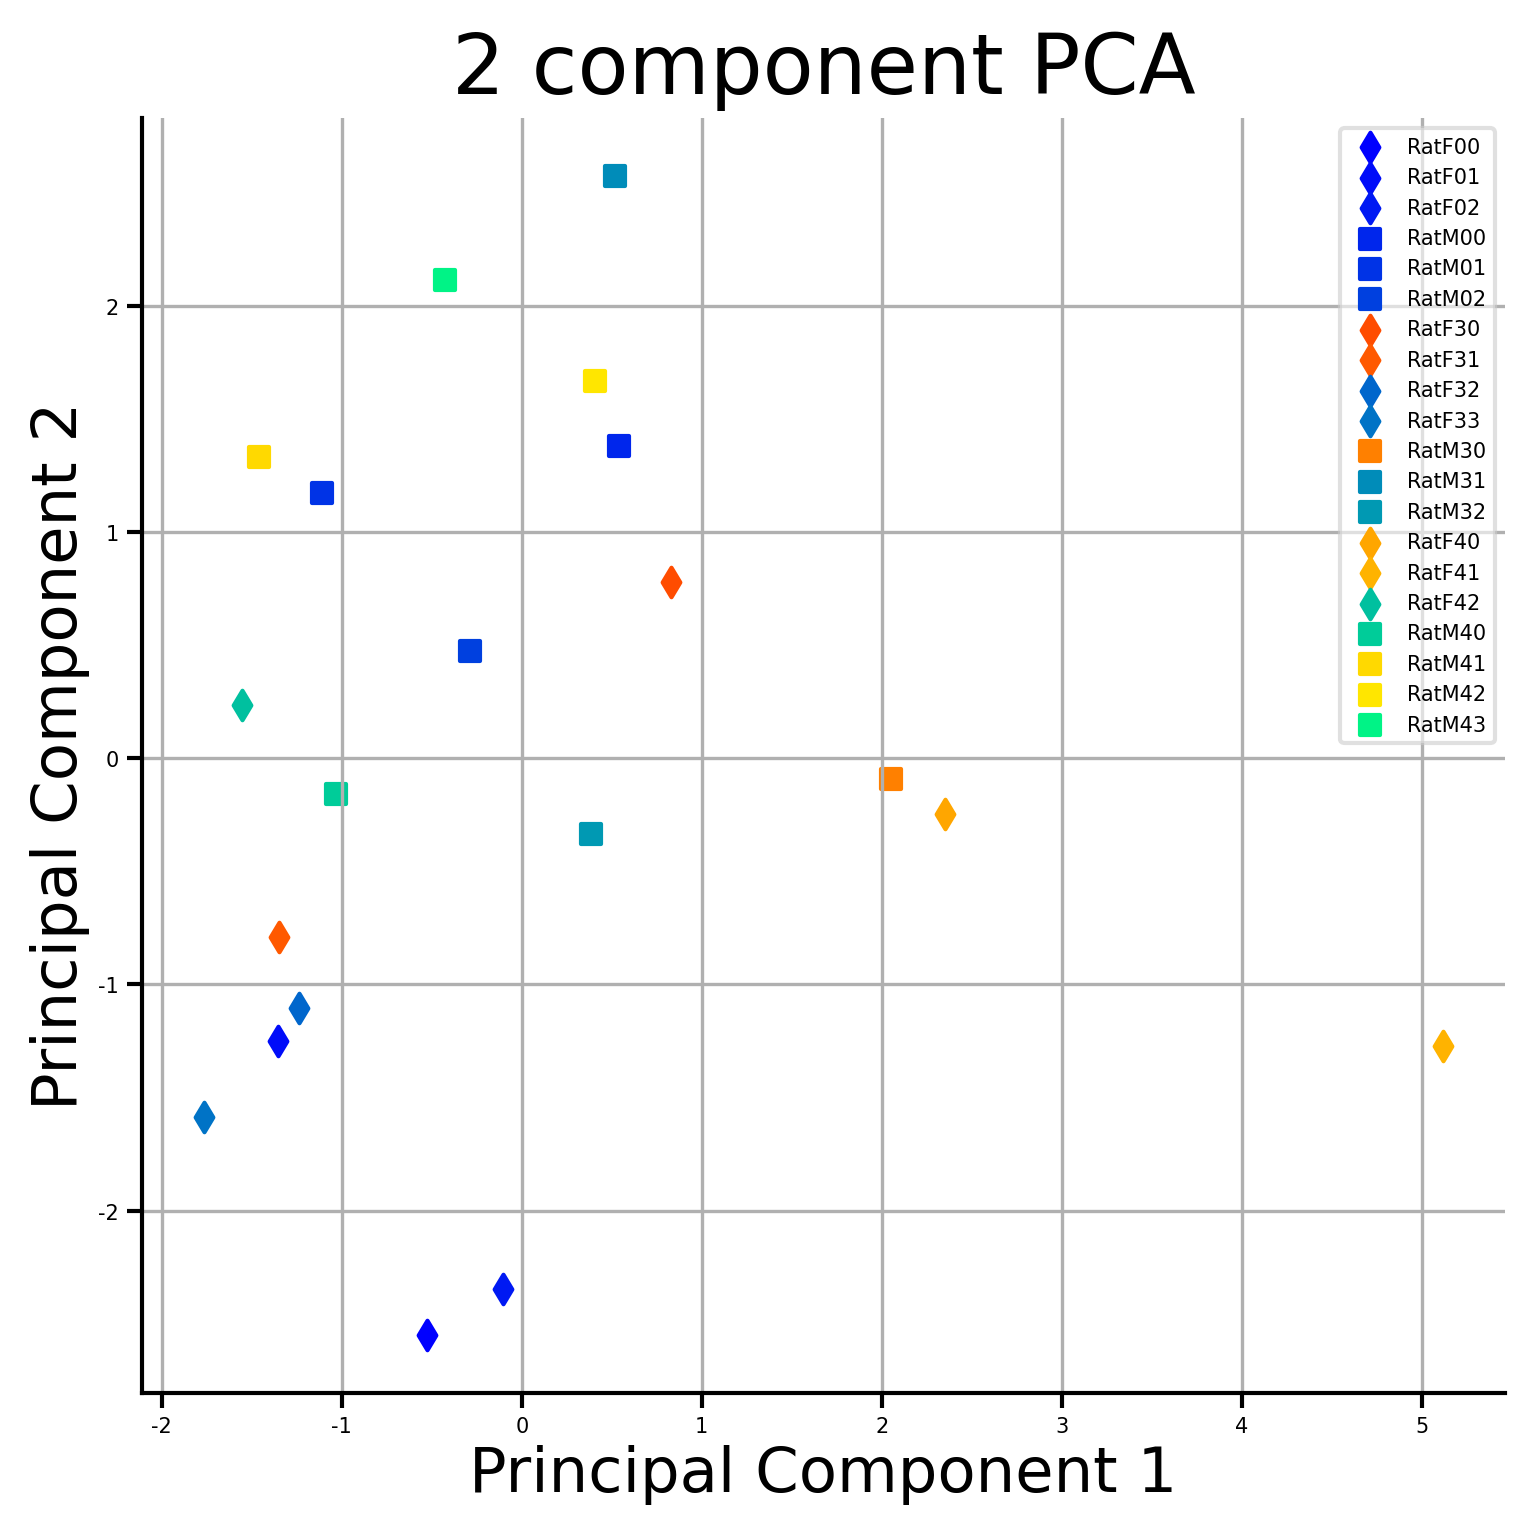

In [43]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = animalList
colors = plt.cm.rainbow(np.linspace(0, 1, len(targets)))
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['animal'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , color = rat_markers[target][0], marker = rat_markers[target][1]
               , s = 25)
ax.legend(targets)
ax.grid()

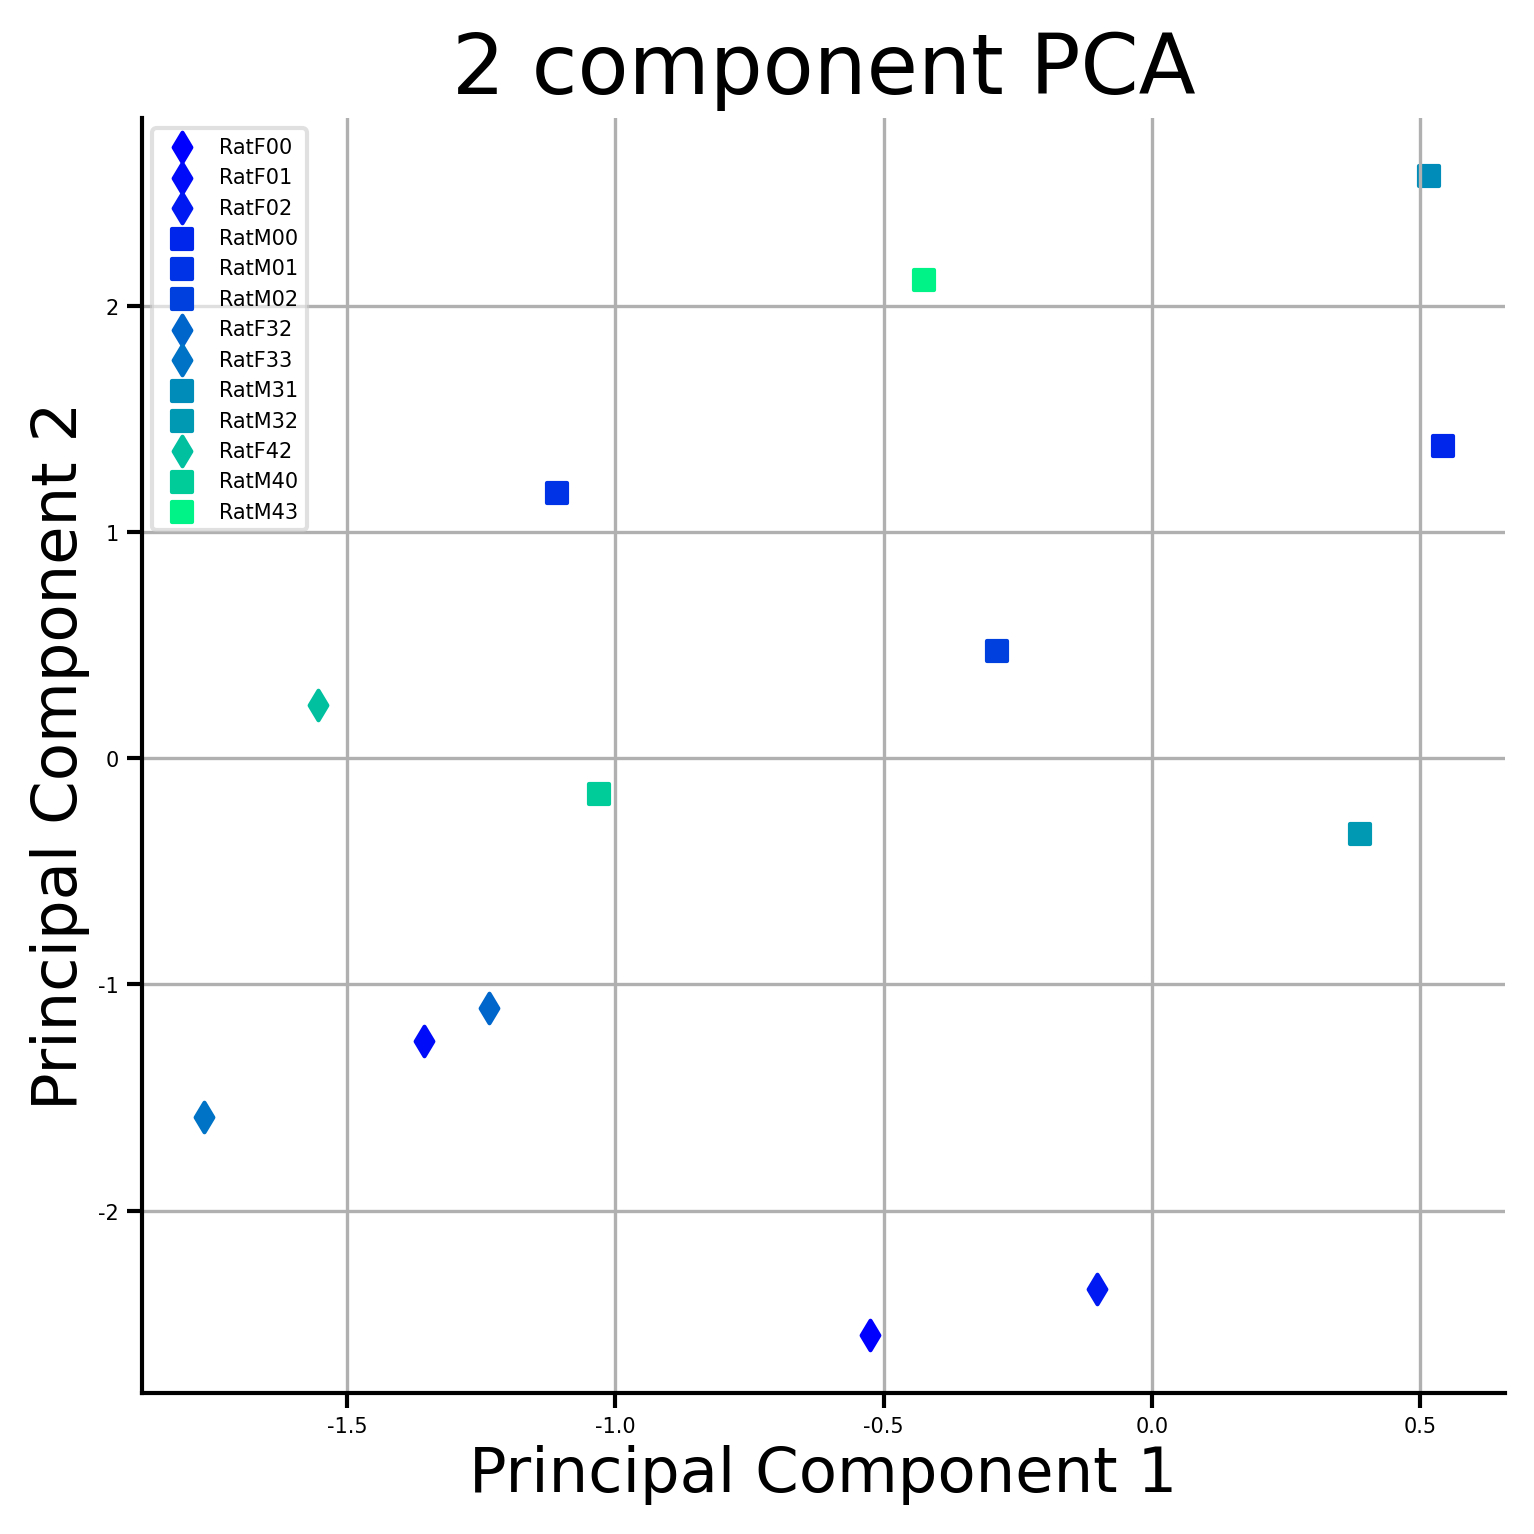

In [44]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = intact
colors = plt.cm.rainbow(np.linspace(0, 1, len(targets)))
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['animal'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , color = rat_markers[target][0], marker = rat_markers[target][1]
               , s = 25)
ax.legend(targets)
ax.grid()

             PC0       PC1       PC2       PC3       PC4       PC5       PC6  \
RatF00 -0.131371 -0.369864  0.330348  0.136272  0.059735  0.253781 -0.030048   
RatF01 -0.161066 -0.124368 -0.107850 -0.175497  0.079868 -0.326713  0.045979   
RatF02 -0.166174 -0.257512  0.239273 -0.199092 -0.583482  0.163980  0.024952   
RatM00  0.168313  0.218905  0.102943  0.096414 -0.341608 -0.503398 -0.143117   
RatM01  0.009519  0.223468 -0.043934 -0.144354 -0.044352  0.008556 -0.393517   
RatM02  0.081262  0.060432 -0.487177 -0.386392 -0.153569  0.147630  0.149983   
RatF30  0.262663  0.011540 -0.431355  0.307845 -0.036992 -0.067141  0.204659   
RatF31 -0.109860 -0.081139 -0.061003 -0.061624  0.101207  0.143249  0.126206   
RatF32 -0.123456 -0.124761 -0.251434  0.352056 -0.220178  0.012957  0.148990   
RatF33 -0.201931 -0.181223 -0.047742 -0.265918  0.285213 -0.132893 -0.025867   
RatM30  0.312097 -0.134864 -0.216373  0.022712 -0.223164  0.128259 -0.567758   
RatM31  0.295192  0.333214  0.279475 -0.

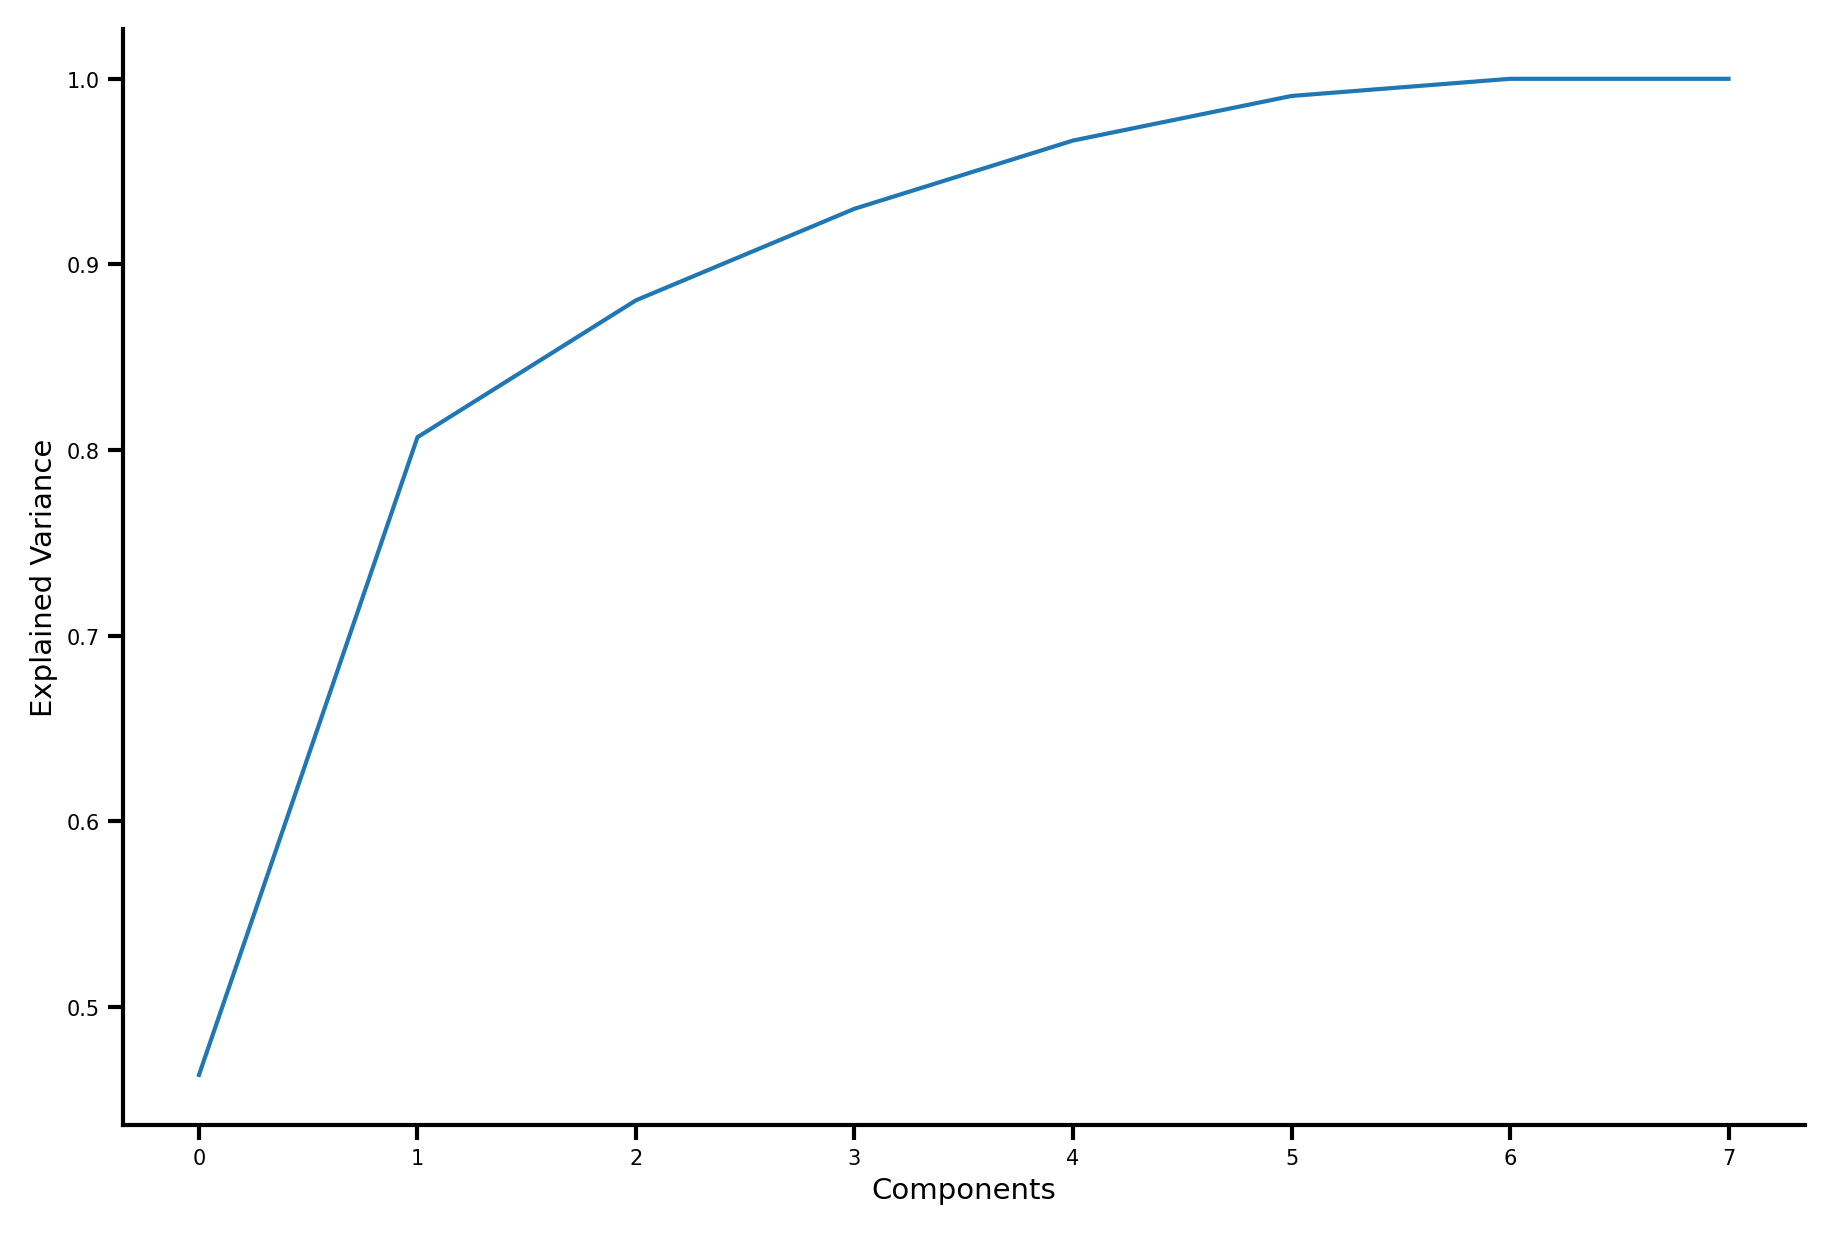

In [45]:
from sklearn.decomposition import PCA

df_normalized = df.T
pca = PCA(n_components=df_normalized.shape[0])
pca.fit(df_normalized)

# Reformat and view results
loadings = pd.DataFrame(pca.components_.T,
                            columns=['PC%s' % _ for _ in range(len(df_normalized.T.columns))],
                            index=df_normalized.columns)
print(loadings)
print(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()

# AC

In [76]:

alpha_0, alpha_t, alpha_R, gamma_0, gamma_t, gamma_R, mu_0, mu_t, mu_R, sigma_0, sigma_t, sigma_R = pickle.load(open("picklejar/intact_lesionFITS.p", "rb"))

vars = [alpha_0, alpha_t, alpha_R, gamma_0, gamma_t, gamma_R, mu_0, mu_t, mu_R, sigma_0, sigma_t, sigma_R]
names = ["alpha_0", "alpha_t", "alpha_R", "gamma_0", "gamma_t", "gamma_R", "mu_0", "mu_t", "mu_R", "sigma_0", "sigma_t", "sigma_R"]


df = pd.DataFrame()
for animal in animalList:
    for cond in ["60", "90", "120", "20", "10", "2", "rev10", "rev20"]:
        df = df.append({"animal": animal, 
                        # "cond": cond, 
                        "alpha_0": alpha_0[animal][cond],
                        "alpha_t": alpha_t[animal][cond],
                        "alpha_R": alpha_R[animal][cond],
                        "gamma_0": gamma_0[animal][cond],
                        "gamma_t": gamma_t[animal][cond],
                        "gamma_R": gamma_R[animal][cond],
                        "mu_0": mu_0[animal][cond],
                        "mu_t": mu_t[animal][cond],
                        "mu_R": mu_R[animal][cond],
                        "sigma_0": sigma_0[animal][cond],
                        "sigma_t": sigma_t[animal][cond],
                        "sigma_R": sigma_R[animal][cond]},
                        ignore_index=True)


# xtrain from dataframe
x_train = df[["alpha_0", "alpha_t", "alpha_R", "gamma_0", "gamma_t", "gamma_R", "mu_0", "mu_t", "mu_R", "sigma_0", "sigma_t", "sigma_R"]].values
y_train = df["animal"].values
x_train = df[["alpha_0", "alpha_t", "gamma_0", "gamma_t", "gamma_R", "mu_0", "mu_t", "sigma_0"]].values

# xtrain.shape

In [77]:
 df

animal   alpha_0   alpha_t   alpha_R   gamma_0   gamma_t   gamma_R  \
0    RatF00  0.590131  0.214440  0.135252  0.163808 -0.014932 -0.027148   
1    RatF00  0.630635  0.181100  0.128552  0.430696 -0.040411 -0.087680   
2    RatF00  0.736433  0.191270  0.159417  0.435160 -0.035057 -0.076169   
3    RatF00  0.912520  0.119683  0.059541  0.616348 -0.069808 -0.102323   
4    RatF00  0.847913  0.214379 -0.001463  0.565050 -0.080291 -0.068270   
..      ...       ...       ...       ...       ...       ...       ...   
155  RatM43  1.631656  0.077770 -0.127303  1.078345 -0.072537 -0.253514   
156  RatM43  1.479527  0.082285 -0.092812  0.921923 -0.077935 -0.191552   
157  RatM43  1.358830  0.111508 -0.050865  0.927910 -0.073223 -0.200492   
158  RatM43  1.569390  0.106503 -0.147033  0.942516 -0.044577 -0.234765   
159  RatM43  1.772726  0.081354 -0.223368  1.080630 -0.052697 -0.260425   

         mu_0      mu_t      mu_R   sigma_0   sigma_t   sigma_R  
0    0.878290  0.057873 -0.003275  0.103182  0.017574  0.004746  
1    1.148026  0.082715  0.024654  0.097087  0.019657  0.024614  
2    1.367477  0.090223 -0.004771  0.110631  0.023928  0.031758  
3    1.293160  0.111246  0.011061  0.111064  0.014811  0.023037  
4    1.358646  0.099139 -0.006356  0.135151  0.013912  0.029199  
..        ...       ...       ...       ...       ...       ...  
155  1.363545  0.020367 -0.010795  0.075073 -0.004731  0.012042  
156  1.371459  0.037015 -0.038833  0.069012  0.000324  0.018777  
157  1.370147  0.040588 -0.015303  0.078576 -0.002564  0.027900  
158  1.483496  0.037329 -0.019540  0.095750 -0.000781  0.026307  
159  1.538566  0.037792 -0.061530  0.111496 -0.002097  0.015651  

[160 rows x 13 columns]

In [78]:
# shuffle x_train
# x_train = np.random.permutation(x_train)

In [79]:
x_test = x_train[140:160]
x_train = x_train[:140]
y_test = y_train[140:160]
y_train = y_train[:140]

In [80]:
from sklearn import preprocessing

normalizer = preprocessing.Normalizer()
normalized_x_train = normalizer.fit_transform(x_train)
normalized_x_test = normalizer.transform(x_test)

x_train = normalized_x_train
x_test = normalized_x_test

# old

In [ ]:
import keras
from keras import layers

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import schedules

# This is the size of our encoded representations
input_dims = 8
encoding_dim = 2  #

# This is our input image
input_img = keras.Input(shape=(input_dims,))



#################################################### DEEP //2
encoded = layers.Dense(6, activation='tanh')(input_img)
encoded = layers.Dense(4, activation='tanh')(encoded)
encoded = layers.Dense(2, activation='tanh')(encoded)

decoded = layers.Dense(4, activation='tanh')(encoded)
decoded = layers.Dense(6, activation='tanh')(decoded)
decoded = layers.Dense(8, activation='tanh')(decoded)
#################################################### DEEP




# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)
optimizer = keras.optimizers.Adam(lr=0.00001)

# lr_schedule = keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=1e-3,
#     decay_steps=10000,
#     decay_rate=0.9)
# optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)
epochs = 1500
# optimizer = keras.optimizers.SGD(lr=1e-4, momentum=0.9, decay=1e-2/epochs)


autoencoder.compile(optimizer=optimizer, loss='mse')


history = autoencoder.fit(x_train, x_train,
                epochs=epochs,
                batch_size=16,
                shuffle=True,
                validation_data=(x_test, x_test))




In [ ]:
encoder = keras.models.Sequential([layers.Dense(2, input_shape=[8])])


decoder = keras.models.Sequential([layers.Dense(8, input_shape=[2])])
autoencoder = keras.models.Sequential([encoder, decoder])

autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1.5))

In [ ]:
history = autoencoder.fit(x_train, x_train, epochs=200)

In [ ]:
codings = encoder.predict(x_train)
encoded_imgs = encoder.predict(x_train)
decoded_imgs = autoencoder.predict(x_train)

5/5 [==============================] - 0s 2ms/step


In [ ]:
fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()

In [ ]:
n = 10  # How many digits we will display
fig, axs = plt.subplots(2, n, figsize=(20, 4))
for i in range(n):

    axs[0, i].imshow(x_train[i].reshape(2, 4))
    axs[0, i].get_xaxis().set_visible(False)
    axs[0, i].get_yaxis().set_visible(False)


    axs[1, i].imshow(decoded_imgs[i].reshape(2, 4))
    axs[1, i].get_xaxis().set_visible(False)
    axs[1, i].get_yaxis().set_visible(False)
    axs[1, i].set_title(f'{encoded_imgs[i][0]:.2f} - {encoded_imgs[i][1]:.2f}')

In [ ]:
import keras
from keras import layers

# This is the size of our encoded representations
input_dims = 12
encoding_dim = 3  #

# This is our input image
input_img = keras.Input(shape=(input_dims,))



#################################################### DEEP //2
encoded = layers.Dense(6, activation='relu')(input_img)
encoded = layers.Dense(6, activation='relu')(encoded)
encoded = layers.Dense(3, activation='relu')(encoded)

decoded = layers.Dense(6, activation='relu')(encoded)
decoded = layers.Dense(6, activation='relu')(decoded)
decoded = layers.Dense(12, activation='tanh')(decoded)
#################################################### DEEP




# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


history = autoencoder.fit(x_train, x_train,
                epochs=1000,
                batch_size=16,
                shuffle=True,
                validation_data=(x_train, x_train))

In [ ]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_train)
decoded_imgs = autoencoder.predict(x_train)

5/5 [==============================] - 0s 2ms/step


In [ ]:

import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.ylim(.5, 1.5)
plt.show()

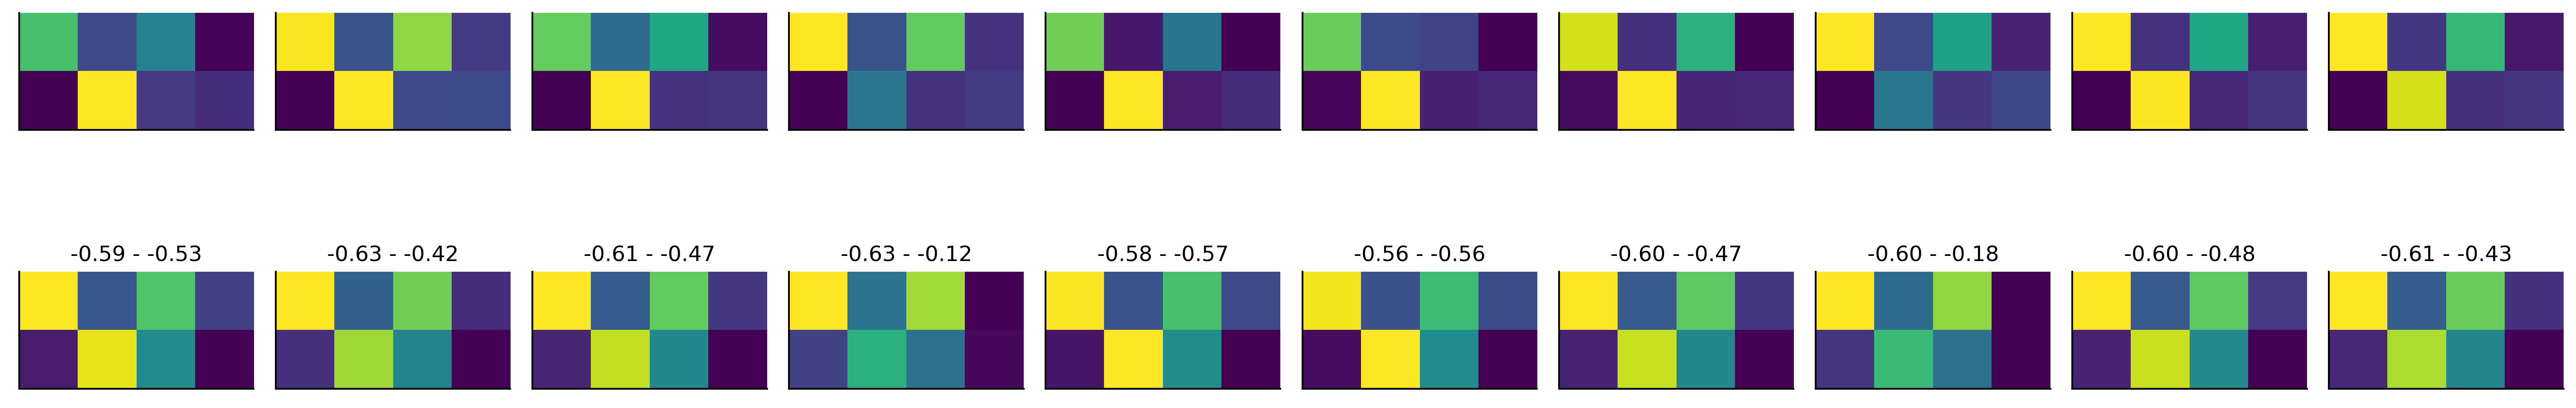

In [ ]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
fig, axs = plt.subplots(2, n, figsize=(20, 4))
for i in range(n):

    axs[0, i].imshow(x_train[i].reshape(2, 4))
    axs[0, i].get_xaxis().set_visible(False)
    axs[0, i].get_yaxis().set_visible(False)


    axs[1, i].imshow(decoded_imgs[i].reshape(2, 4))
    axs[1, i].get_xaxis().set_visible(False)
    axs[1, i].get_yaxis().set_visible(False)
    axs[1, i].set_title(f'{encoded_imgs[i][0]:.2f} - {encoded_imgs[i][1]:.2f}')


In [ ]:
x_train[i].reshape(2, 4)

array([[ 0.66329083,  0.03688944,  0.41330985, -0.03493919],
       [-0.08587503,  0.6148427 ,  0.01659449,  0.03093891]])

In [ ]:
decoded_imgs[i].reshape(2, 4)

array([[ 0.53228503,  0.06583124,  0.37956703, -0.0419273 ],
       [-0.0583857 ,  0.4502112 ,  0.16928777, -0.13450077]],
      dtype=float32)

# somehow working

In [ ]:
encoder = keras.models.Sequential([layers.Dense(2, input_shape=[8])])
decoder = keras.models.Sequential([layers.Dense(8, input_shape=[2])])
autoencoder = keras.models.Sequential([encoder, decoder])

autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1.5))
history = autoencoder.fit(x_train, x_train, epochs=200)

Epoch 1/200
5/5 [==============================] - 0s 2ms/step - loss: 0.1802
Epoch 2/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 3/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 4/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 5/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 6/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 7/200
5/5 [==============================] - 0s 1ms/step - loss: 0.0033
Epoch 8/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 9/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 10/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 11/200
5/5 [==============================] - 0s 12ms/step - loss: 0.0032
Epoch 12/200
5/5 [==============================] - 0s 5ms/step - loss: 0.0032
Epoch 13/200
5/5 [==============================] - 0s 4ms/s

5/5 [==============================] - 0s 2ms/step


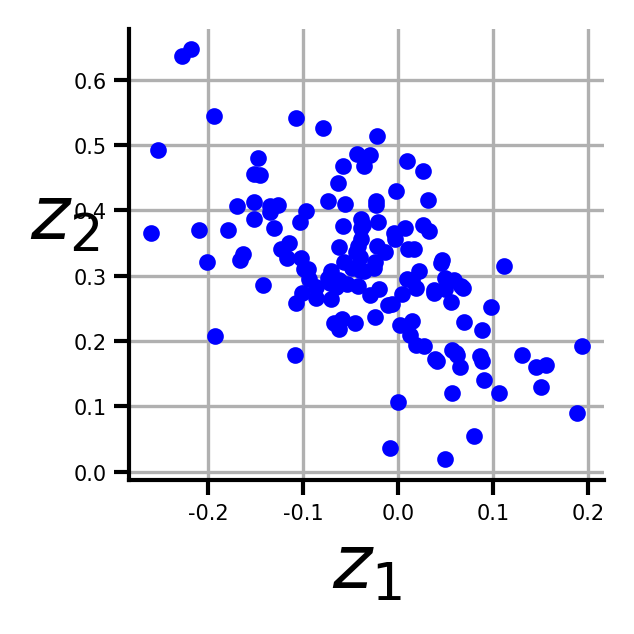

In [ ]:

codings = encoder.predict(x_train)
encoded_imgs = encoder.predict(x_train)
decoded_imgs = autoencoder.predict(x_train)
fig = plt.figure(figsize=(2, 2))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()



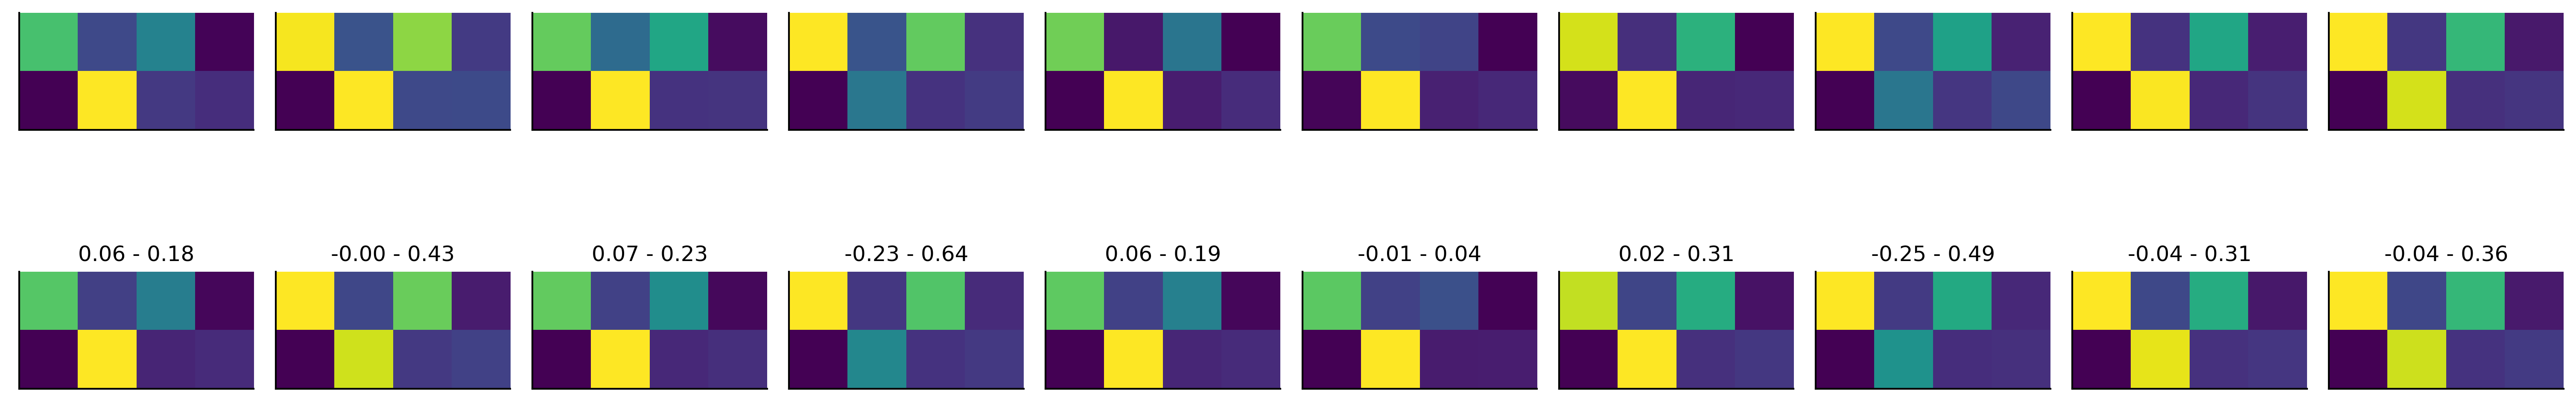

In [ ]:
n = 10  # How many digits we will display
fig, axs = plt.subplots(2, n, figsize=(20, 4))
for i in range(n):

    axs[0, i].imshow(x_train[i].reshape(2, 4))
    axs[0, i].get_xaxis().set_visible(False)
    axs[0, i].get_yaxis().set_visible(False)


    axs[1, i].imshow(decoded_imgs[i].reshape(2, 4))
    axs[1, i].get_xaxis().set_visible(False)
    axs[1, i].get_yaxis().set_visible(False)
    axs[1, i].set_title(f'{encoded_imgs[i][0]:.2f} - {encoded_imgs[i][1]:.2f}')

# same with tanh

In [97]:
import keras
from keras import layers

encoder = keras.models.Sequential([layers.Dense(2, input_shape=[8], activation="tanh")])
decoder = keras.models.Sequential([layers.Dense(8, input_shape=[2], activation="tanh")])
autoencoder = keras.models.Sequential([encoder, decoder])

autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1.5))
history = autoencoder.fit(x_train, x_train, epochs=500,

                        # batch_size=16,
                        # shuffle=True,
                        validation_data=(x_test, x_test), verbose=0)

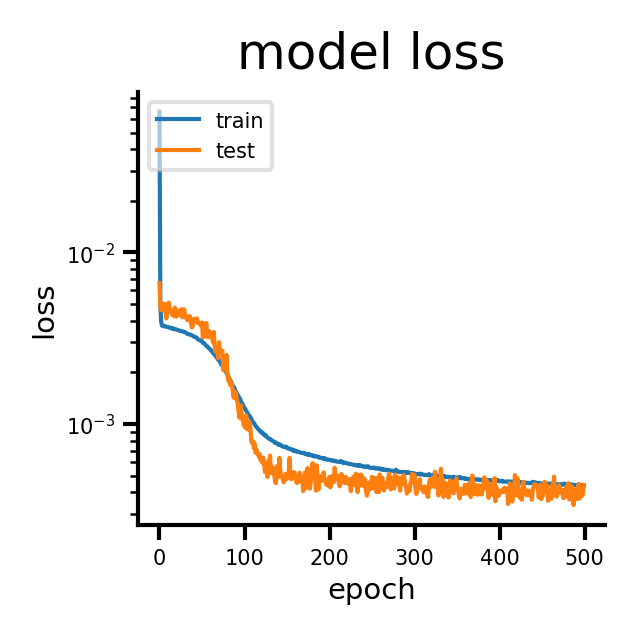

In [98]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(2, 2))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.ylim(.5, 1.5)
plt.yscale('log')
plt.show()

5/5 [==============================] - 0s 1ms/step


5/5 [==============================] - 0s 1ms/step


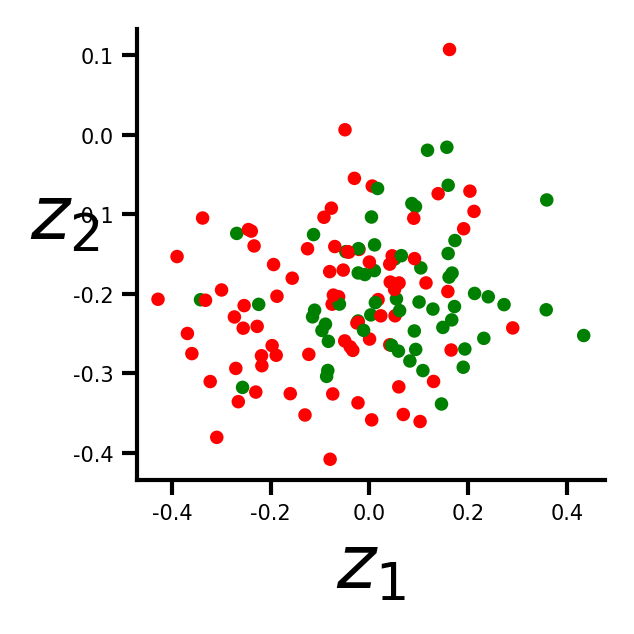

In [101]:
codings = encoder.predict(x_train)
encoded_imgs = encoder.predict(x_train)
decoded_imgs = autoencoder.predict(x_train)


colorcode = {animal: plt.get_cmap('autumn')(i/len(animalList)) for i, animal in enumerate(animalList)}
colorcode = {animal: 'g' if 'M' in animal else 'r' for i, animal in enumerate(animalList)}



fig = plt.figure(figsize=(2, 2))
plt.scatter(codings[:,0], codings[:, 1], c=[colorcode[y] for y in y_train], s=5)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.show()

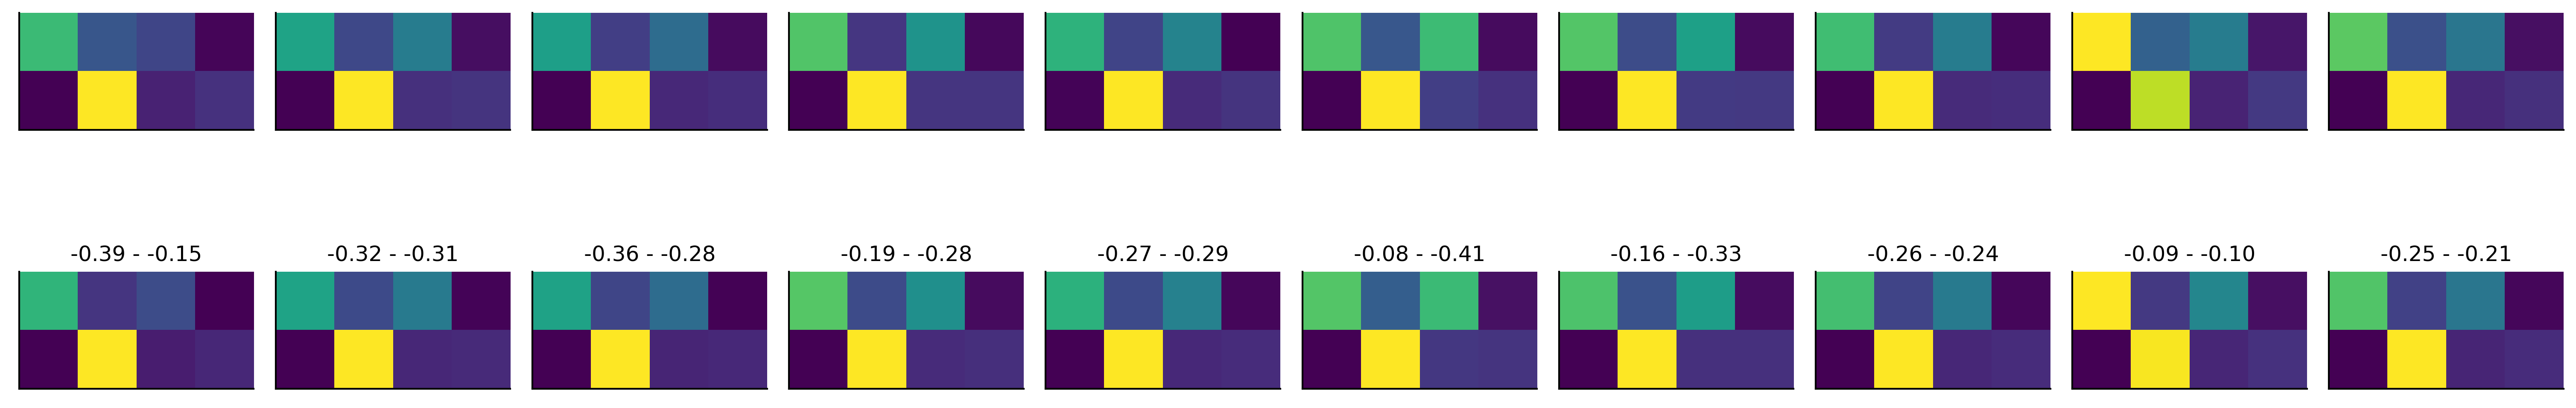

In [100]:
n = 10  # How many digits we will display
fig, axs = plt.subplots(2, n, figsize=(20, 4))
for i in range(n):

    axs[0, i].imshow(x_train[i].reshape(2, 4))
    axs[0, i].get_xaxis().set_visible(False)
    axs[0, i].get_yaxis().set_visible(False)


    axs[1, i].imshow(decoded_imgs[i].reshape(2, 4))
    axs[1, i].get_xaxis().set_visible(False)
    axs[1, i].get_yaxis().set_visible(False)
    axs[1, i].set_title(f'{encoded_imgs[i][0]:.2f} - {encoded_imgs[i][1]:.2f}')

In [102]:
alpha_0, alpha_t, alpha_R, gamma_0, gamma_t, gamma_R, mu_0, mu_t, mu_R, sigma_0, sigma_t, sigma_R = pickle.load(open("picklejar/intact_lesionFITS.p", "rb"))

vars = [alpha_0, alpha_t, alpha_R, gamma_0, gamma_t, gamma_R, mu_0, mu_t, mu_R, sigma_0, sigma_t, sigma_R]
names = ["alpha_0", "alpha_t", "alpha_R", "gamma_0", "gamma_t", "gamma_R", "mu_0", "mu_t", "mu_R", "sigma_0", "sigma_t", "sigma_R"]
conds = ["60", "90", "120", "20", "10", "2", "rev10", "rev20"]

df = pd.DataFrame()
for animal in animalList:
    df = df.append({"animal": animal, 
                        # "cond": cond, 
                        "alpha_0": np.mean([alpha_0[animal][cond] for cond in conds]),
                        "alpha_t": np.mean([alpha_t[animal][cond] for cond in conds]),
                        "alpha_R": np.mean([alpha_R[animal][cond] for cond in conds]),
                        "gamma_0": np.mean([gamma_0[animal][cond] for cond in conds]),
                        "gamma_t": np.mean([gamma_t[animal][cond] for cond in conds]),
                        "gamma_R": np.mean([gamma_R[animal][cond] for cond in conds]),
                        "mu_0": np.mean([mu_0[animal][cond] for cond in conds]),
                        "mu_t": np.mean([mu_t[animal][cond] for cond in conds]),
                        "mu_R": np.mean([mu_R[animal][cond] for cond in conds]),
                        "sigma_0": np.mean([sigma_0[animal][cond] for cond in conds]),
                        "sigma_t": np.mean([sigma_t[animal][cond] for cond in conds]),
                        "sigma_R": np.mean([sigma_R[animal][cond] for cond in conds])},
                        ignore_index=True)


# # xtrain from dataframe
# x_train = df[["alpha_0", "alpha_t", "alpha_R", "gamma_0", "gamma_t", "gamma_R", "mu_0", "mu_t", "mu_R", "sigma_0", "sigma_t", "sigma_R"]].values
y_moy = df["animal"].values
x_moy = df[["alpha_0", "alpha_t", "gamma_0", "gamma_t", "gamma_R", "mu_0", "mu_t", "sigma_0"]].values

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 33ms/step


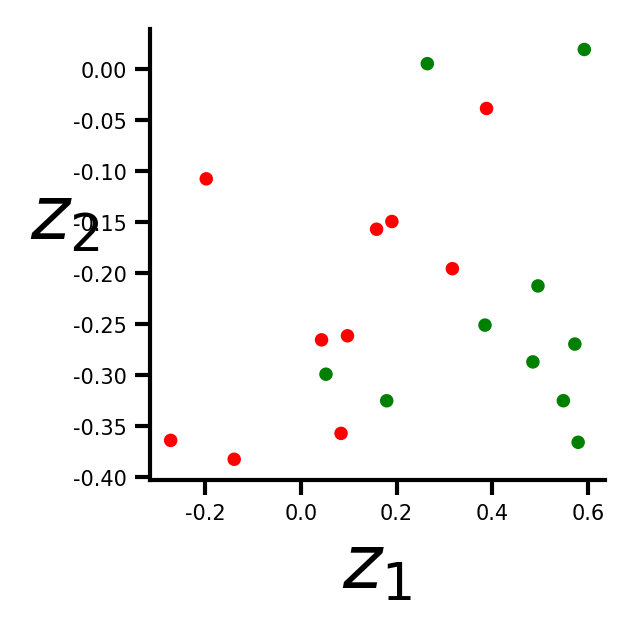

In [103]:
codings = encoder.predict(x_moy)
encoded_imgs = encoder.predict(x_moy)
decoded_imgs = autoencoder.predict(x_moy)

colorcode = {animal: plt.get_cmap('autumn')(i/len(animalList)) for i, animal in enumerate(animalList)}
colorcode = {animal: 'g' if 'M' in animal else 'r' for i, animal in enumerate(animalList)}

fig = plt.figure(figsize=(2, 2))
plt.scatter(codings[:,0], codings[:, 1], c=[colorcode[y] for y in y_moy], s=5)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.show()

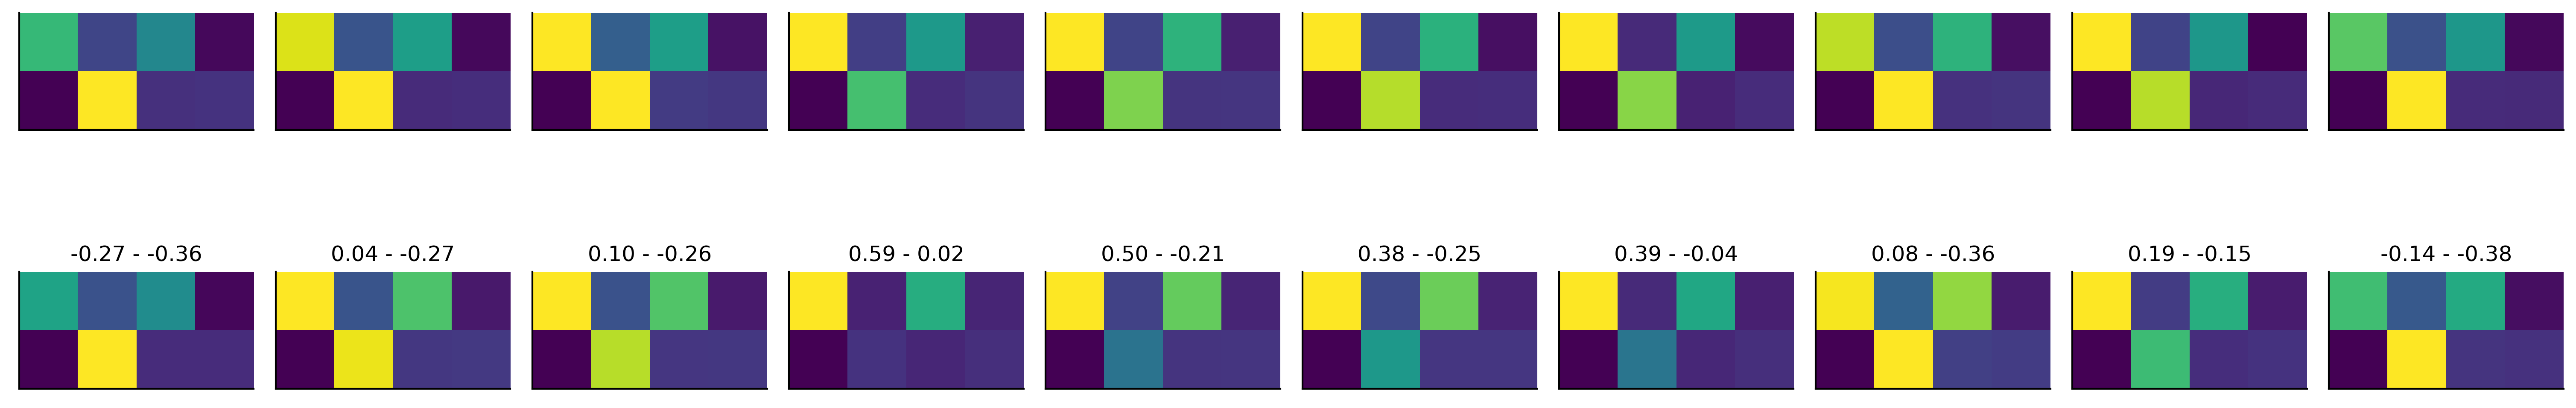

In [104]:
n = 10  # How many digits we will display
fig, axs = plt.subplots(2, n, figsize=(20, 4))
for i in range(n):

    axs[0, i].imshow(x_moy[i].reshape(2, 4))
    axs[0, i].get_xaxis().set_visible(False)
    axs[0, i].get_yaxis().set_visible(False)


    axs[1, i].imshow(decoded_imgs[i].reshape(2, 4))
    axs[1, i].get_xaxis().set_visible(False)
    axs[1, i].get_yaxis().set_visible(False)
    axs[1, i].set_title(f'{encoded_imgs[i][0]:.2f} - {encoded_imgs[i][1]:.2f}')

# tsne

In [105]:
from sklearn.manifold import TSNE

X_valid_compressed = encoder.predict(x_train)
tsne = TSNE()
X_valid_2D = tsne.fit_transform(X_valid_compressed)
# X_valid_2D = (X_valid_2D - X_valid_2D.min()) / (X_valid_2D.max() - X_valid_2D.min())

5/5 [==============================] - 0s 1ms/step


/home/david/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/david/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [106]:
colorcode = {animal: plt.get_cmap('autumn')(i/len(animalList)) for i, animal in enumerate(animalList)}
colorcode = {animal: 'g' if 'M' in animal else 'r' for i, animal in enumerate(animalList)}

colorcode

{'RatF00': 'r',
 'RatF01': 'r',
 'RatF02': 'r',
 'RatM00': 'g',
 'RatM01': 'g',
 'RatM02': 'g',
 'RatF30': 'r',
 'RatF31': 'r',
 'RatF32': 'r',
 'RatF33': 'r',
 'RatM30': 'g',
 'RatM31': 'g',
 'RatM32': 'g',
 'RatF40': 'r',
 'RatF41': 'r',
 'RatF42': 'r',
 'RatM40': 'g',
 'RatM41': 'g',
 'RatM42': 'g',
 'RatM43': 'g'}

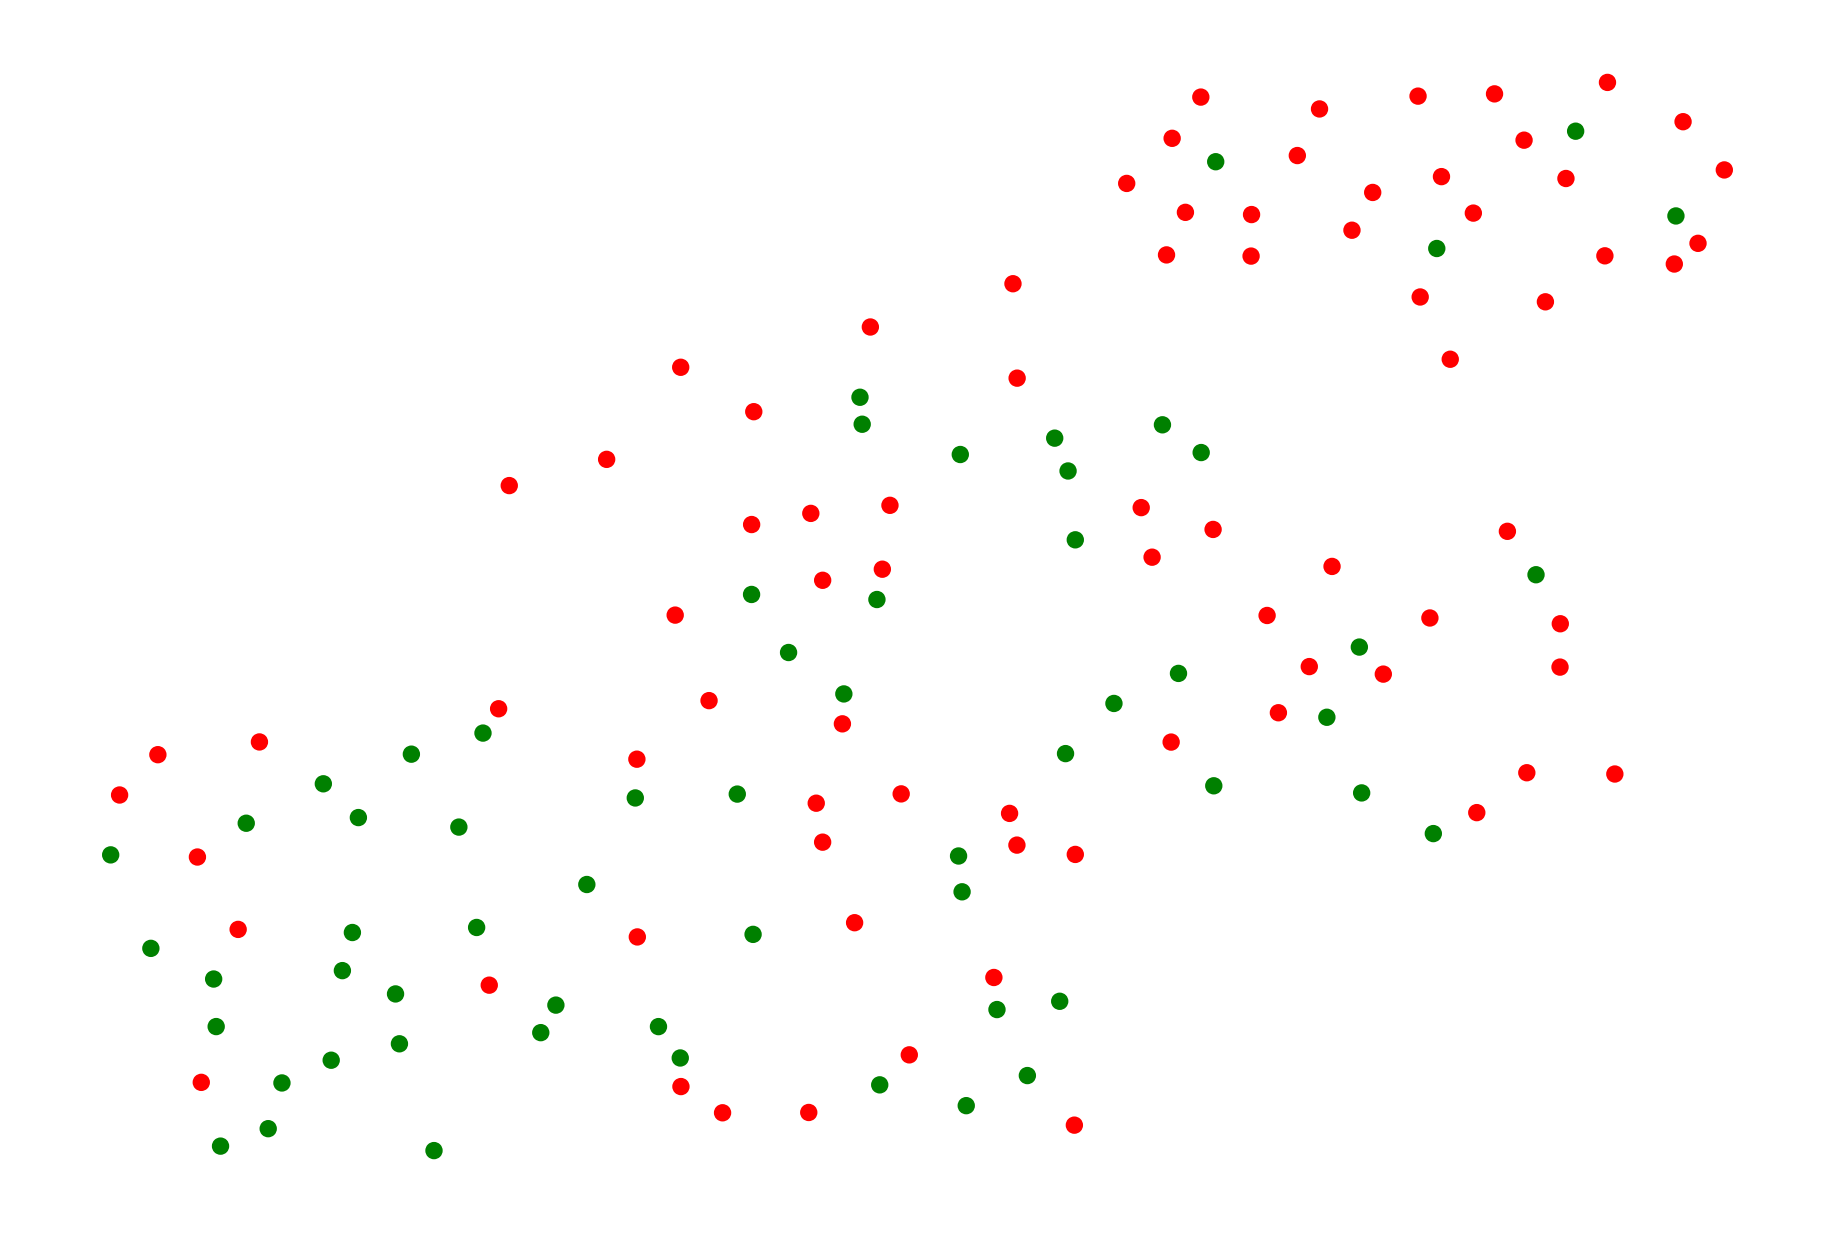

In [107]:
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], color=[colorcode[y] for y in y_train], s=10, )
plt.axis("off")
plt.show()

In [114]:
# !pip install umap-learnv
# import umap
# reducer = umap.UMAP()
# embedding = reducer.fit_transform(x_train)
# embedding.shape
# plt.scatter(    embedding[:, 0],    embedding[:, 1])

# traits

In [ ]:
Zalpha = {animal: {key: (alpha[animal][key] - np.mean([alpha[animal][key] for animal in intact]))/np.std([alpha[animal][key] for animal in intact]) for key in alpha[animal]} for animal in animalList}
Zalpha_t = {animal: {key: (alpha_t[animal][key] - np.mean([alpha_t[animal][key] for animal in intact]))/np.std([alpha_t[animal][key] for animal in intact]) for key in alpha_t[animal]} for animal in animalList}
Zalpha_R = {animal: {key: (alpha_R[animal][key] - np.mean([alpha_R[animal][key] for animal in intact]))/np.std([alpha_R[animal][key] for animal in intact]) for key in alpha_R[animal]} for animal in animalList}
Zgamma = {animal: {key: (gamma[animal][key] - np.mean([gamma[animal][key] for animal in intact]))/np.std([gamma[animal][key] for animal in intact]) for key in gamma[animal]} for animal in animalList}
Zgamma_t = {animal: {key: (gamma_t[animal][key] - np.mean([gamma_t[animal][key] for animal in intact]))/np.std([gamma_t[animal][key] for animal in intact]) for key in gamma_t[animal]} for animal in animalList}
Zgamma_R = {animal: {key: (gamma_R[animal][key] - np.mean([gamma_R[animal][key] for animal in intact]))/np.std([gamma_R[animal][key] for animal in intact]) for key in gamma_R[animal]} for animal in animalList}

traitsIDLE = {animal: [] for animal in animalList}
ZvarsIDLE = [Zalpha, Zalpha_t, Zalpha_R, Zgamma, Zgamma_t, Zgamma_R]


Zmu = {animal: {key: (mu[animal][key] - np.mean([mu[animal][key] for animal in intact]))/np.std([mu[animal][key] for animal in intact]) for key in mu[animal]} for animal in animalList}
Zmu_t = {animal: {key: (mu_t[animal][key] - np.mean([mu_t[animal][key] for animal in intact]))/np.std([mu_t[animal][key] for animal in intact]) for key in mu_t[animal]} for animal in animalList}
Zmu_R = {animal: {key: (mu_R[animal][key] - np.mean([mu_R[animal][key] for animal in intact]))/np.std([mu_R[animal][key] for animal in intact]) for key in mu_R[animal]} for animal in animalList}
Zsigma = {animal: {key: (sigma[animal][key] - np.mean([sigma[animal][key] for animal in intact]))/np.std([sigma[animal][key] for animal in intact]) for key in sigma[animal]} for animal in animalList}
Zsigma_t = {animal: {key: (sigma_t[animal][key] - np.mean([sigma_t[animal][key] for animal in intact]))/np.std([sigma_t[animal][key] for animal in intact]) for key in sigma_t[animal]} for animal in animalList}
Zsigma_R = {animal: {key: (sigma_R[animal][key] - np.mean([sigma_R[animal][key] for animal in intact]))/np.std([sigma_R[animal][key] for animal in intact]) for key in sigma_R[animal]} for animal in animalList}

traitsRUN = {animal: [] for animal in animalList}
ZvarsRUN = [Zmu, Zmu_t, Zmu_R, Zsigma, Zsigma_t, Zsigma_R]

for j, zvar in enumerate(ZvarsIDLE):
    for animal in animalList:
        zscores = [zvar[animal][cond] for cond in ["60", "90", "120", "20", "10", "2", "rev10", "rev20"]]
        traitsIDLE[animal].append(np.mean(zscores))

for j, zvar in enumerate(ZvarsRUN):
    for animal in animalList:
        zscores = [zvar[animal][cond] for cond in ["60", "90", "120", "20", "10", "2", "rev10", "rev20"]]
        traitsRUN[animal].append(np.mean(zscores))

all_traits = { key:traitsRUN.get(key,[])+traitsIDLE.get(key,[]) for key in set(list(traitsRUN.keys())+list(traitsIDLE.keys())) }
indices = ['mu_0', 'mu_t', 'mu_R', 'sigma_0', 'sigma_t', 'sigma_R', 'alpha_0', 'alpha_t', 'alpha_R', 'gamma_0', 'gamma_t', 'gamma_R']
df_traits = pd.DataFrame(all_traits, columns=intact, index=indices).T

'remove the traits that are not in the figure'
df_traits = df_traits.drop(columns = [ 'sigma_t','sigma_R', 'mu_R', 'alpha_R',])
df_traits

mu_0      mu_t   sigma_0   alpha_0   alpha_t   gamma_0   gamma_t  \
RatF00 -0.194985  1.289294  1.005045 -1.536157  0.256408 -1.124285  0.259550   
RatF01 -0.300359  0.065846 -0.392920 -0.532380  0.970217 -0.675849 -0.085422   
RatF02  0.297565  2.151373  1.060804 -0.177016  1.673750 -0.562656  0.324636   
RatM00  0.637030 -0.468898  0.602340  1.770213  0.063794  0.525760  0.801078   
RatM01 -0.223730 -0.268046 -0.938948  0.685439 -0.185844  0.531768  0.190412   
RatM02  0.879926 -0.182877 -0.761152  0.576246  0.211393  0.467791 -1.150566   
RatF32 -0.888769  0.255257  0.351774  0.015553  0.225211 -0.589979 -0.847570   
RatF33 -0.460363  0.168644 -0.756600 -1.306486  0.759660 -0.846209 -0.131406   
RatM31  0.895374 -0.622519 -0.099680  0.681264 -1.479751  1.653984  0.738433   
RatM32  1.211098 -0.411732 -0.046863 -0.452633 -0.798659 -0.185834 -0.560169   
RatF42 -1.423501 -0.404379  0.062506 -0.088384 -1.104188 -0.134605 -0.190248   
RatM40 -0.414843 -0.445293  0.007734 -0.442043 -0.028955 -0.139411  0.133405   
RatM43 -0.014442 -1.126671 -0.094040  0.806385 -0.563037  1.079527  0.517868   

         gamma_R  
RatF00  0.812557  
RatF01  0.700687  
RatF02  0.436068  
RatM00 -0.795479  
RatM01 -0.629510  
RatM02 -0.032863  
RatF32  0.814835  
RatF33  0.763046  
RatM31 -1.593366  
RatM32  0.684196  
RatF42  0.140543  
RatM40  0.003121  
RatM43 -1.303835

In [ ]:

# y_train_traits = df["animal"].values
x_train_traits = df[["alpha_0", "alpha_t", "gamma_0", "gamma_t", "gamma_R", "mu_0", "mu_t", "sigma_0"]].values
x_train_traits

array([[-1.53615711,  0.25640815, -1.12428528,  0.2595496 ,  0.81255702,
        -0.19498528,  1.28929367,  1.00504508],
       [-0.53238029,  0.97021668, -0.67584897, -0.08542177,  0.70068698,
        -0.30035929,  0.0658463 , -0.39291988],
       [-0.1770159 ,  1.67374953, -0.5626556 ,  0.32463563,  0.43606791,
         0.29756519,  2.15137255,  1.06080358],
       [ 1.77021335,  0.06379449,  0.52575986,  0.80107754, -0.79547921,
         0.63702961, -0.46889809,  0.60233954],
       [ 0.6854385 , -0.18584426,  0.53176795,  0.19041203, -0.62951027,
        -0.22372963, -0.26804554, -0.93894767],
       [ 0.57624565,  0.21139312,  0.46779081, -1.15056602, -0.03286295,
         0.87992557, -0.18287712, -0.76115233],
       [ 0.0155532 ,  0.22521144, -0.58997912, -0.84757003,  0.81483544,
        -0.88876883,  0.25525731,  0.35177393],
       [-1.30648577,  0.75966015, -0.84620902, -0.13140625,  0.76304564,
        -0.46036292,  0.16864429, -0.75659967],
       [ 0.68126381, -1.47975078

In [ ]:
encoder = keras.models.Sequential([layers.Dense(2, input_shape=[8], activation="tanh")])
decoder = keras.models.Sequential([layers.Dense(8, input_shape=[2], activation="tanh")])
autoencoder = keras.models.Sequential([encoder, decoder])

autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1.5))
history = autoencoder.fit(x_train_traits, x_train_traits, epochs=500)



Epoch 1/500
1/1 [==============================] - 0s 400ms/step - loss: 0.6320
Epoch 2/500
1/1 [==============================] - 0s 3ms/step - loss: 0.5004
Epoch 3/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4225
Epoch 4/500
1/1 [==============================] - 0s 5ms/step - loss: 0.3712
Epoch 5/500
1/1 [==============================] - 0s 4ms/step - loss: 0.3383
Epoch 6/500
1/1 [==============================] - 0s 5ms/step - loss: 0.3164
Epoch 7/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3004
Epoch 8/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2877
Epoch 9/500
1/1 [==============================] - 0s 6ms/step - loss: 0.2771
Epoch 10/500
1/1 [==============================] - 0s 3ms/step - loss: 0.2681
Epoch 11/500
1/1 [==============================] - 0s 10ms/step - loss: 0.2603
Epoch 12/500
1/1 [==============================] - 0s 4ms/step - loss: 0.2536
Epoch 13/500
1/1 [==============================] - 0s 5ms

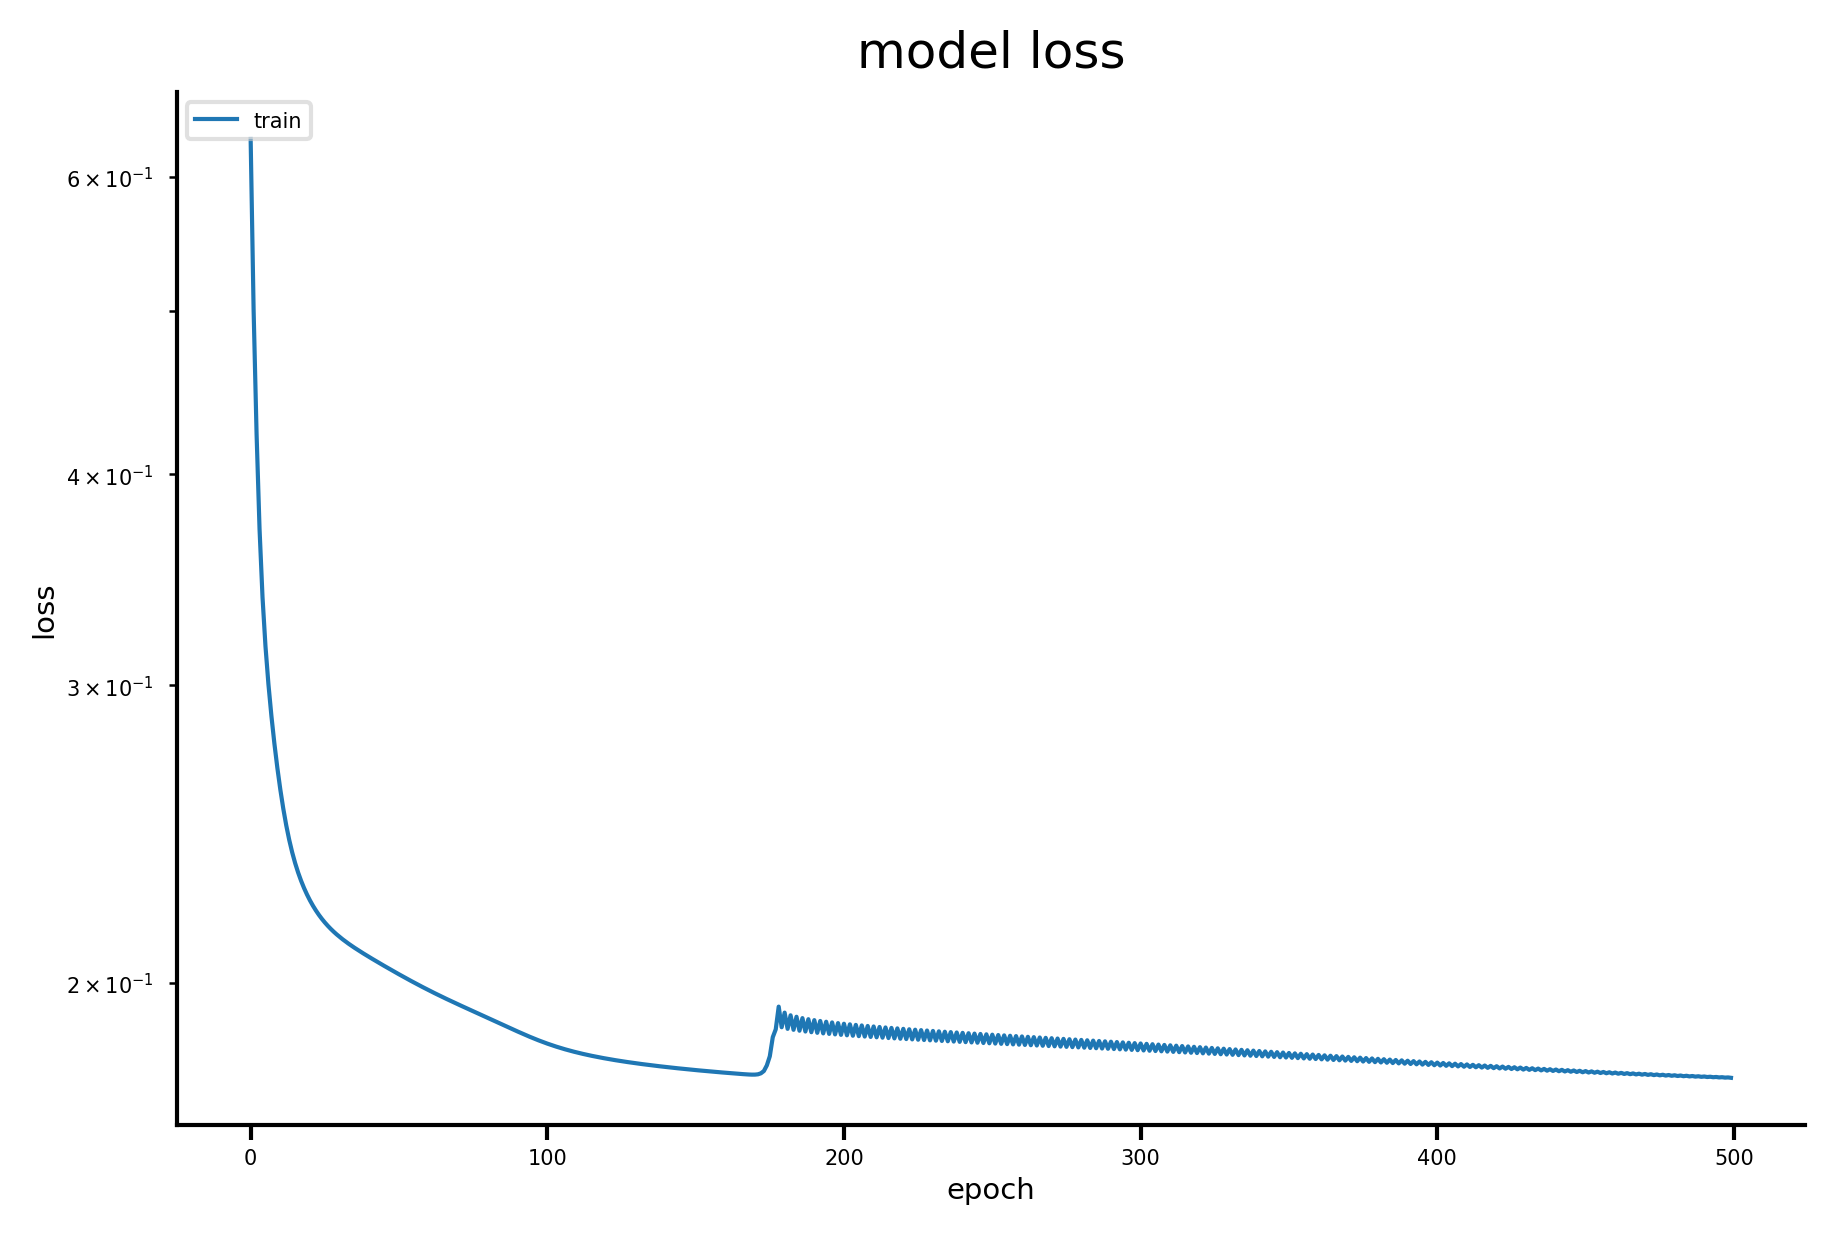

In [ ]:
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.ylim(.5, 1.5)
plt.yscale('log')
plt.show()

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 26ms/step


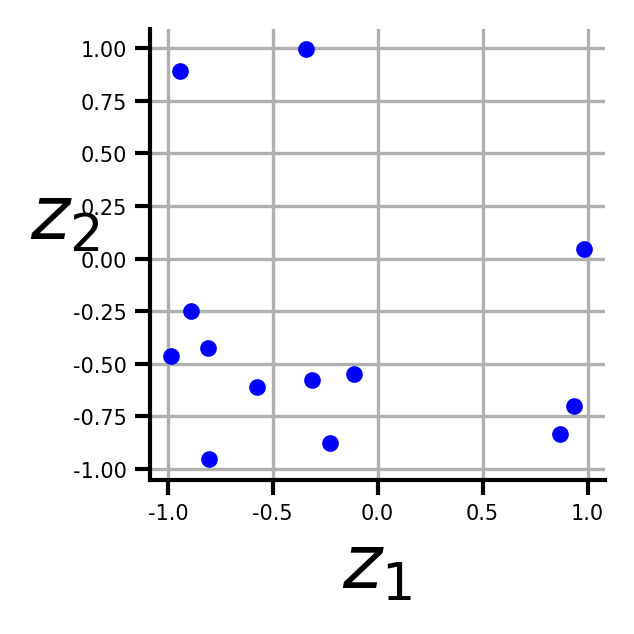

In [ ]:
codings = encoder.predict(x_train_traits)
encoded_imgs = encoder.predict(x_train_traits)
decoded_imgs = autoencoder.predict(x_train_traits)
fig = plt.figure(figsize=(2, 2))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()

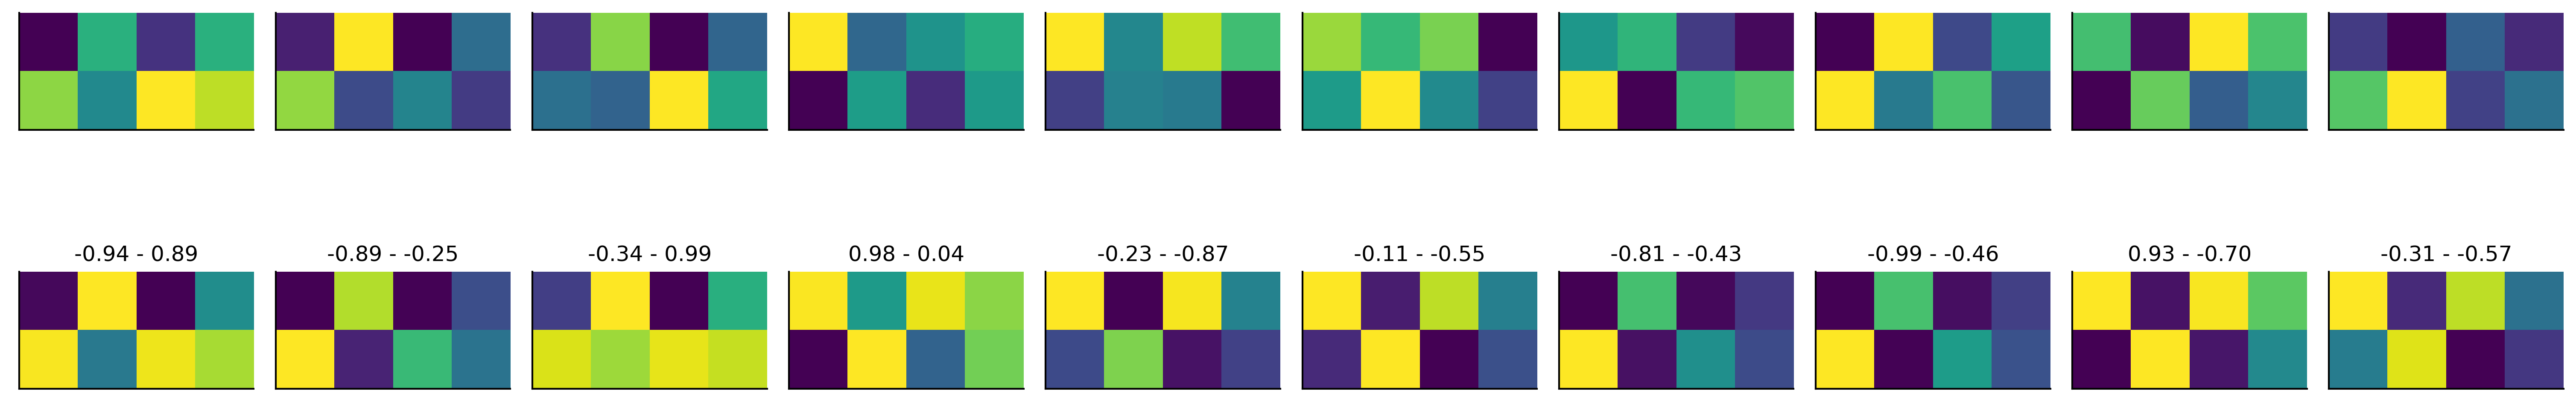

In [ ]:
n = 10  # How many digits we will display
fig, axs = plt.subplots(2, n, figsize=(20, 4))
for i in range(n):

    axs[0, i].imshow(x_train_traits[i].reshape(2, 4))
    axs[0, i].get_xaxis().set_visible(False)
    axs[0, i].get_yaxis().set_visible(False)


    axs[1, i].imshow(decoded_imgs[i].reshape(2, 4))
    axs[1, i].get_xaxis().set_visible(False)
    axs[1, i].get_yaxis().set_visible(False)
    axs[1, i].set_title(f'{encoded_imgs[i][0]:.2f} - {encoded_imgs[i][1]:.2f}')

In [ ]:
https://github.com/atmguille/archetypal-analysis